<a href="https://colab.research.google.com/github/ash-netizen/Ecommerce_case_study/blob/main/final_ecom_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

 

Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [ ]:
#using a format string for columns
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df = pd.read_csv("ConsumerElectronics.csv")

In [ ]:
df.head(10)

fsn_id           order_date  Year  Month  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10   
5  ACCCX3S5JGAJETYR  2015-10-17 12:07:24  2015     10   
6  ACCCX3S5JGAJETYR  2015-10-16 14:59:57  2015     10   
7  ACCCX3S5JGAJETYR  2015-10-15 23:41:39  2015     10   
8  ACCCX3S5JGAJETYR  2015-10-16 00:49:14  2015     10   
9  ACCCX3S5JGAJETYR  2015-10-25 22:52:34  2015     10   

                  order_id            order_item_id   gmv  units  \
0 3,419,300,926,147,000.00 3,419,300,926,147,000.00  6400      1   
1 1,420,830,839,915,200.00 1,420,830,839,915,200.00  6900      1   
2 2,421,912,925,714,800.00 2,421,912,925,714,800.00  1990      1   
3 4,416,592,101,738,400.00 4,416,592,101,738,400.00  1690      1   
4 4,419,525,153,426,400.00 4,419,525,153,426,400.00  1618      1   
5 3,419,188,825,145,600.00 3,419,188,825,145,600.00  3324      1   
6 3,418,428,515,041,500.00 3,418,428,515,041,500.00  3695      1   
7 3,417,799,002,820,700.00 3,417,799,002,820,700.00  3695      1   
8 2,417,869,738,304,300.00 2,417,869,738,304,300.00            1   
9 4,426,481,574,167,600.00 4,426,481,574,167,600.00  3695      1   

  deliverybdays deliverycdays s1_fact.order_payment_type  sla  \
0            \N            \N                        COD    5   
1            \N            \N                        COD    7   
2            \N            \N                        COD   10   
3            \N            \N                    Prepaid    4   
4            \N            \N                    Prepaid    6   
5            \N            \N                    Prepaid    5   
6            \N            \N                    Prepaid    6   
7            \N            \N                        COD    5   
8            \N            \N                    Prepaid    9   
9            \N            \N                        COD    7   

                  cust_id                 pincode  \
0  -1.01299130778588E+018  -7.79175582905735E+018   
1  -8.99032457905512E+018   7.33541149097431E+018   
2   -1.0404429420466E+018  -7.47768776228657E+018   
3  -7.60496084352714E+018  -5.83593163877661E+018   
4    2.8945572083453E+018   5.34735360997242E+017   
5  -7.64154636189174E+018  -1.91905269756031E+018   
6  -7.15614041481066E+016   6.40491320207757E+018   
7   9.17327596234152E+018  -1.60630305201981E+018   
8                                                   
9  -7.80915606896163E+018    -9.779010321304E+017   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   
5                              CE           CameraAccessory   
6                              CE           CameraAccessory   
7                              CE           CameraAccessory   
8                              CE           CameraAccessory   
9                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   
5               CameraAccessory              CameraTripod         4044   
6               CameraAccessory              CameraTripod         4044   
7               CameraAccessory              Camer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

#No Null Values
#Columns with incorrect data type deliverybdays, order_date, gmv, deliverybdays, pincode so we need to correct the datatype

In [ ]:
df.describe()

Year        Month                 order_id  \
count 1,648,824.00 1,648,824.00             1,648,824.00   
mean      2,015.52         6.59 2,842,444,674,146,328.50   
std           0.50         3.62 1,269,134,332,596,894.25   
min       2,015.00         1.00            76,331,515.00   
25%       2,015.00         3.00 1,602,588,503,969,575.00   
50%       2,016.00         6.00 2,611,824,528,743,350.00   
75%       2,016.00        10.00 3,610,613,539,366,250.00   
max       2,016.00        12.00 5,395,076,790,260,600.00   

                   order_item_id        units          sla  product_mrp  \
count               1,648,824.00 1,648,824.00 1,648,824.00 1,648,824.00   
mean   13,756,277,530,325,384.00         1.02         5.69     4,108.31   
std    55,945,981,798,631,008.00         0.25         2.98     8,510.92   
min               108,016,495.00         1.00         0.00         0.00   
25%     1,606,725,138,262,300.00         1.00         4.00       799.00   
50%     2,619,185,472,741,150.00         1.00         6.00     1,599.00   
75%     4,397,705,931,628,400.00         1.00         7.00     3,499.00   
max   300,037,347,717,704,000.00        50.00     1,006.00   299,999.00   

       product_procurement_sla  
count             1,648,824.00  
mean                      5.40  
std                      53.47  
min                      -1.00  
25%                       1.00  
50%                       2.00  
75%                       3.00  
max                   1,000.00

# Data Preparation and cleaning

In [ ]:
df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [ ]:
#lets check for null values percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

fsn_id                            0.00
order_date                        0.00
Year                              0.00
Month                             0.00
order_id                          0.00
order_item_id                     0.00
gmv                               0.00
units                             0.00
deliverybdays                     0.00
deliverycdays                     0.00
s1_fact.order_payment_type        0.00
sla                               0.00
cust_id                           0.00
pincode                           0.00
product_analytic_super_category   0.00
product_analytic_category         0.00
product_analytic_sub_category     0.00
product_analytic_vertical         0.00
product_mrp                       0.00
product_procurement_sla           0.00
dtype: float64

#lets check unique values for product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical

In [ ]:
df.product_analytic_super_category.unique()

array(['CE'], dtype=object)

In [ ]:
#removing 'product_analytic_super_category' as there is only value for this column
df.drop('product_analytic_super_category', 1, inplace=True)

In [ ]:
df.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [ ]:
df.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

#since we have to create market mix models for three product subcategories  - camera accessory, home audio and gaming accessory
#removing other subcategories

In [ ]:
df = df.loc[(df.product_analytic_sub_category=='CameraAccessory') | (df.product_analytic_sub_category=='GamingAccessory')| (df.product_analytic_sub_category=='HomeAudio')]

In [ ]:
df.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'HomeAudio'], dtype=object)

In [ ]:
df.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [ ]:
df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [ ]:
#converting data type of GMV
df.gmv = pd.to_numeric(df.gmv, errors='coerce')

In [ ]:
#Checking the minimum and maximum values of GMV
print(df.gmv.min())
print(df.gmv.max())

0.0
148050.0


#0 value can be due to coupon codes/promotional offers

checking for duplicates

In [ ]:
df[df.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]

fsn_id           order_date  Year  Month  \
76506    ACCE6YVWVHXXKCHW  2016-02-22 14:52:12  2016      2   
675305   ACCE7AV9TZHHAESC  2016-04-27 07:03:09  2016      4   
944830   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4   
944903   ACCDH7MFZJGRWJCW  2016-04-27 00:19:25  2016      4   
969493   ACCE94WYZR6GFDFP  2016-04-27 00:33:53  2016      4   
...                   ...                  ...   ...    ...   
1647201  VOREYV2HWZDUFZ9Y  2015-09-29 23:19:16  2015      9   
1647202  VOREYV2HWZDUFZ9Y  2015-09-30 22:08:55  2015      9   
1647203  VOREYV2HWZDUFZ9Y  2015-09-06 22:14:34  2015      9   
1647204  VOREYV2HWZDUFZ9Y  2015-09-11 16:11:52  2015      9   
1647205  VOREYV2HWZDUFZ9Y  2015-09-22 10:25:36  2015      9   

                        order_id              order_item_id      gmv  units  \
76506   3,417,290,135,521,600.00   3,417,290,135,521,600.00   350.00      1   
675305  2,532,857,872,757,300.00   2,532,857,872,757,300.00 4,090.00      1   
944830  3,575,842,474,884,000.00 300,037,347,717,633,984.00   287.00      1   
944903  3,575,842,474,884,000.00   3,575,842,474,884,000.00   287.00      1   
969493  1,569,690,464,156,100.00   1,569,690,464,156,100.00   190.00      1   
...                          ...                        ...      ...    ...   
1647201 4,404,040,347,013,500.00   4,404,040,347,013,500.00 5,200.00      1   
1647202 2,404,860,211,262,700.00   2,404,860,211,262,700.00 5,200.00      1   
1647203 3,381,987,673,542,980.00 300,037,347,712,641,984.00 4,299.00      1   
1647204 2,388,231,540,197,500.00 300,037,347,714,801,984.00 4,599.00      1   
1647205 1,397,525,368,627,000.00   1,397,525,368,627,000.00 5,399.00      1   

        deliverybdays deliverycdays s1_fact.order_payment_type  sla  \
76506               7             8                    Prepaid    8   
675305              2             3                    Prepaid    5   
944830              5             6                    Prepaid    5   
944903             \N            \N                    Prepaid    7   
969493             \N            \N                    Prepaid    6   
...               ...           ...                        ...  ...   
1647201            \N            \N                    Prepaid   11   
1647202            \N            \N                        COD   10   
1647203            \N            \N                        COD    7   
1647204            \N            \N                        COD    7   
1647205            \N            \N                        COD   15   

                             cust_id                       pincode  \
76506         -1.07035781735315E+018         8.45640885616433E+018   
675305    233,114,630,667,481,984.00 -4,071,447,699,433,639,936.00   
944830  8,788,006,738,130,379,776.00  2,175,163,142,166,510,080.00   
944903  8,788,006,738,130,379,776.00  2,175,163,142,166,510,080.00   
969493  6,615,160,307,439,460,352.00 -7,307,608,120,567,170,048.00   
...                              ...                           ...   
1647201        -8.7451731063629E+018          3.1115855848644E+018   
1647202       -8.90379286900787E+018        -5.60164751149697E+018   
1647203        6.09775807960118E+018        -5.15252222605545E+018   
1647204        2.83122075392855E+018         3.60782023838401E+018   
1647205        -4.4355960622754E+018        -2.10625335594417E+018   

        product_analytic_category product_analytic_sub_category  \
76506              GamingHardware               GamingAccessory   
675305             GamingHardware               GamingAccessory   
944830             GamingHardware               GamingAccessory   
944903             GamingHardware               GamingAccessory   
969493            CameraAccessory               CameraAccessory   
...                           ...                           ...   
1647201        EntertainmentSmall                     HomeAudio   
1647202        EntertainmentSmall                     HomeAudio   
1647203        E

In [ ]:
#Removing duplicated values
df = df[~df.duplicated(['fsn_id','order_date','order_id','order_item_id',
                              'gmv','cust_id','pincode',
                              'product_analytic_category','product_analytic_sub_category',
                             'product_analytic_vertical'])]

In [ ]:
df.loc[df.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [ ]:
df.shape

(528602, 19)

In [ ]:
#Checking nulls in gmv value
df.gmv.isnull().sum()

1362

In [ ]:
#removing null values
df = df.dropna()

In [ ]:
df.isnull().sum()

fsn_id                           0
order_date                       0
Year                             0
Month                            0
order_id                         0
order_item_id                    0
gmv                              0
units                            0
deliverybdays                    0
deliverycdays                    0
s1_fact.order_payment_type       0
sla                              0
cust_id                          0
pincode                          0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
dtype: int64

In [ ]:
df.deliverybdays.unique

<bound method Series.unique of 0          \N
1          \N
2          \N
3          \N
4          \N
           ..
1542374    \N
1542375    \N
1542376    \N
1542377    \N
1542378    \N
Name: deliverybdays, Length: 527240, dtype: object>

In [ ]:
df.deliverycdays.unique

<bound method Series.unique of 0          \N
1          \N
2          \N
3          \N
4          \N
           ..
1542374    \N
1542375    \N
1542376    \N
1542377    \N
1542378    \N
Name: deliverycdays, Length: 527240, dtype: object>

In [ ]:
## The columns deliverybdays and deliverycdays have \N, which should not be the case
# Let's see what all values it has
print(df.deliverybdays.value_counts().head())
print(df.deliverycdays.value_counts().head())

\N    410026
4      23535
5      23058
3      18708
6      17915
Name: deliverybdays, dtype: int64
\N    410026
5      21584
6      19605
4      18637
7      14137
Name: deliverycdays, dtype: int64


In [ ]:
#we can easily visulize that most of the values are \N so we can drop both columns

In [ ]:
df.drop(['deliverybdays', 'deliverycdays'],1, inplace = True)

In [ ]:
#order_date
#let's first correct the data type of order_date
df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:
# We also need to make sure if the dates are not outside July 2015 and June 2016.
df.loc[(df.order_date < '2015-07-01') | (df.order_date >= '2016-07-01')]

fsn_id          order_date  Year  Month  \
1071934  ACCCX3SGRHSRGTHZ 2016-07-01 01:07:36  2016      7   
1074944  ACCD6HEGVCDHXPNQ 2016-07-03 16:12:47  2016      7   
1077916  ACCDFZEJAXVJDGS7 2016-07-01 01:03:17  2016      7   
1080123  ACCDHQ8N6DGBYGKZ 2016-07-02 07:04:29  2016      7   
1082641  ACCDPYBFTPE5PRGT 2016-07-02 06:49:00  2016      7   
...                   ...                 ...   ...    ...   
1343782  TESE8HQPC9KY7EDY 2016-07-05 12:05:06  2016      7   
1348417  VORDSAYVZVHS2THQ 2016-07-01 18:58:15  2016      7   
1376093  ACCDVZ83VBHCWFFA 2015-05-19 13:42:09  2015      5   
1402659  ACCE8G8BFKZRU3MW 2015-06-26 17:33:10  2015      6   
1429828  PPRD7SGNCSGSEWDN 2015-06-26 17:27:12  2015      6   

                        order_id            order_item_id      gmv  units  \
1071934 1,611,380,362,751,500.00 1,611,380,362,751,500.00 9,999.00      1   
1074944 2,602,425,887,006,100.00 2,602,425,887,006,100.00   399.00      1   
1077916 4,611,922,526,101,700.00 4,611,922,526,101,700.00 3,699.00      1   
1080123 3,612,045,698,494,600.00 3,612,045,698,494,600.00   949.00      1   
1082641 4,609,992,565,256,700.00 4,609,992,565,256,700.00 1,050.00      1   
...                          ...                      ...      ...    ...   
1343782 1,640,574,293,935,700.00 1,640,574,293,935,700.00 2,100.00      1   
1348417 3,633,598,266,571,100.00 3,633,598,266,571,100.00 4,274.00      1   
1376093           146,499,482.00           188,485,029.00 3,149.00      1   
1402659           163,411,313.00           207,714,163.00 2,800.00      1   
1429828           163,409,423.00           207,711,935.00   350.00      1   

        s1_fact.order_payment_type  sla                       cust_id  \
1071934                        COD    6 -6,062,166,819,020,010,496.00   
1074944                        COD    6  2,872,406,203,167,170,048.00   
1077916                    Prepaid    2 -2,126,839,628,533,280,000.00   
1080123                        COD    1  1,164,936,338,609,760,000.00   
1082641                    Prepaid    1 -9,069,302,869,700,119,552.00   
...                            ...  ...                           ...   
1343782                        COD    7        -2.65648840718291E+018   
1348417                        COD    4        -3.62228587849267E+018   
1376093                        COD    6        -6.14850311678963E+018   
1402659                        COD   11         5.80459991910742E+018   
1429828                        COD    5         7.81569135848536E+018   

                              pincode product_analytic_category  \
1071934  8,011,106,654,138,590,208.00           CameraAccessory   
1074944 -7,543,985,763,413,010,432.00            GamingHardware   
1077916 -3,973,362,991,373,910,016.00        EntertainmentSmall   
1080123  2,370,358,404,467,279,872.00           CameraAccessory   
1082641  4,705,607,051,154,690,048.00            GamingHardware   
...                               ...                       ...   
1343782        -6.95142635777575E+018           CameraAccessory   
1348417         1.70212685331306E+018        EntertainmentSmall   
1376093        -3.21775258155408E+018        EntertainmentSmall   
1402659         3.91454170274896E+018        EntertainmentSmall   
1429828          5.8510313294317E+017           CameraAccessory   

        product_analytic_sub_category product_analytic_vertical  product_mrp  \
1071934               CameraAccessory                      Lens        19500   
1074944               GamingAccessory                   GamePad          449   
1077916                     HomeAudio          HomeAudioSpeaker         5290   
1080123               CameraAccessory              CameraTripod         1499   
1082641               GamingAccessory             GamingHeadset         1792   
...                               ...                       ...          ...   
1343782               CameraAccessory                 Telescope         3000   
1348417                    

In [ ]:
#Let's delete those rows

df = df.loc[(df.order_date >= '2015-07-01')]
df = df.loc[(df.order_date < '2016-07-01')]

In [ ]:
#check again
df.loc[(df.order_date < '2015-07-01') | (df.order_date >= '2016-07-01')]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [ ]:
#s1_fact.order_payment_type

#Changing the name of the column s1_fact.order_payment_type
df.rename(columns={'s1_fact.order_payment_type':'order_payment_type'}, inplace=True)

In [ ]:
df.order_payment_type.value_counts()

COD        384484
Prepaid    142556
Name: order_payment_type, dtype: int64

#COD is preferred more than Prepaid order payment type

In [ ]:
#pincode
#Converting the datatype
df['pincode'] = pd.to_numeric(df['pincode'])

In [ ]:
df.pincode.min()

-9.22183035419401e+18

In [ ]:
df.pincode.value_counts()

-9,031,043,207,091,489,792.00    4163
-977,901,032,130,400,000.00      3464
8,649,648,456,016,409,600.00     2194
6,513,330,541,343,979,520.00     2046
7,346,497,166,693,510,144.00     2020
                                 ... 
-8,758,708,643,309,939,712.00       1
7,326,430,491,616,629,760.00        1
-3,640,633,689,989,819,904.00       1
2,923,543,851,419,429,888.00        1
-7,225,648,070,760,330,240.00       1
Name: pincode, Length: 6633, dtype: int64

In [ ]:
#lets make this positive
df.pincode = df.pincode.abs()

In [ ]:
df.pincode.value_counts()

9,031,043,207,091,489,792.00    4163
977,901,032,130,400,000.00      3464
8,649,648,456,016,409,600.00    2194
6,513,330,541,343,979,520.00    2046
7,346,497,166,693,510,144.00    2020
                                ... 
8,758,708,643,309,939,712.00       1
7,326,430,491,616,629,760.00       1
3,640,633,689,989,819,904.00       1
2,923,543,851,419,429,888.00       1
7,225,648,070,760,330,240.00       1
Name: pincode, Length: 6633, dtype: int64

In [ ]:
df.cust_id.value_counts()

-2.97151680344434e+18     54
2.23947383112118e+18      52
-6.40520013965909e+18     29
-7.8550434145648e+18      29
-1.65411037921902E+018    24
                          ..
-8.95344442268757E+017     1
4.68093163758994e+18       1
7.59627824093451e+18       1
-9.0928854405097e+18       1
1.79827018238106e+18       1
Name: cust_id, Length: 451649, dtype: int64

In [ ]:
#hence we can drop both cust_id and pincode
df.drop(['cust_id','pincode'], axis = 1, inplace = True)

In [ ]:
#product_mrp
df[(df.product_mrp == 0)].head()

fsn_id          order_date  Year  Month  \
12807  ACCDGXGZQUGHFYHT 2015-10-23 19:26:01  2015     10   
15031  ACCDHHZZGFBDPJRP 2015-10-20 21:27:29  2015     10   
15032  ACCDHHZZGFBDPJRP 2015-10-28 23:49:41  2015     10   
15529  ACCDHTZ4CZCECAFF 2015-10-27 01:05:20  2015     10   
16980  ACCDK94FSKCZBJCU 2015-10-28 18:36:07  2015     10   

                      order_id            order_item_id      gmv  units  \
12807 1,424,634,732,111,000.00 1,424,634,732,111,000.00 3,500.00      1   
15031 3,422,117,911,872,300.00 3,422,117,911,872,300.00   690.00      1   
15032 2,429,116,502,765,100.00 2,429,116,502,765,100.00   690.00      1   
15529 1,427,429,193,266,100.00 1,427,429,193,266,100.00 1,050.00      1   
16980 4,428,925,467,622,000.00 4,428,925,467,622,000.00 1,099.00      1   

      order_payment_type  sla product_analytic_category  \
12807                COD    5            GamingHardware   
15031            Prepaid    6           CameraAccessory   
15032                COD    8           CameraAccessory   
15529                COD    7           CameraAccessory   
16980            Prepaid    6        EntertainmentSmall   

      product_analytic_sub_category product_analytic_vertical  product_mrp  \
12807               GamingAccessory        GamingAccessoryKit            0   
15031               CameraAccessory             CameraBattery            0   
15032               CameraAccessory             CameraBattery            0   
15529               CameraAccessory             CameraBattery            0   
16980                     HomeAudio                      Dock            0   

       product_procurement_sla  
12807                       -1  
15031                       -1  
15032                       -1  
15529                       -1  
16980                       -1

In [ ]:
len(df[(df.product_mrp == 0)])

3236

In [ ]:
#Removing values with 0 MRP, since that is not possible to have 0 MRP
df = df.loc[~(df.product_mrp==0)]

In [ ]:
df['gmv_per_unit'] = df.gmv/df.units

In [ ]:
#Replacing the values of MRP with GMV per unit where the values of GMV/unit is greater than MRP
df['product_mrp'].loc[df.gmv_per_unit>df.product_mrp] = df['gmv_per_unit']

In [ ]:
df.loc[df.gmv_per_unit>df.product_mrp]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, order_payment_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla, gmv_per_unit]
Index: []

In [ ]:
df.drop(['gmv_per_unit'],1,inplace=True)

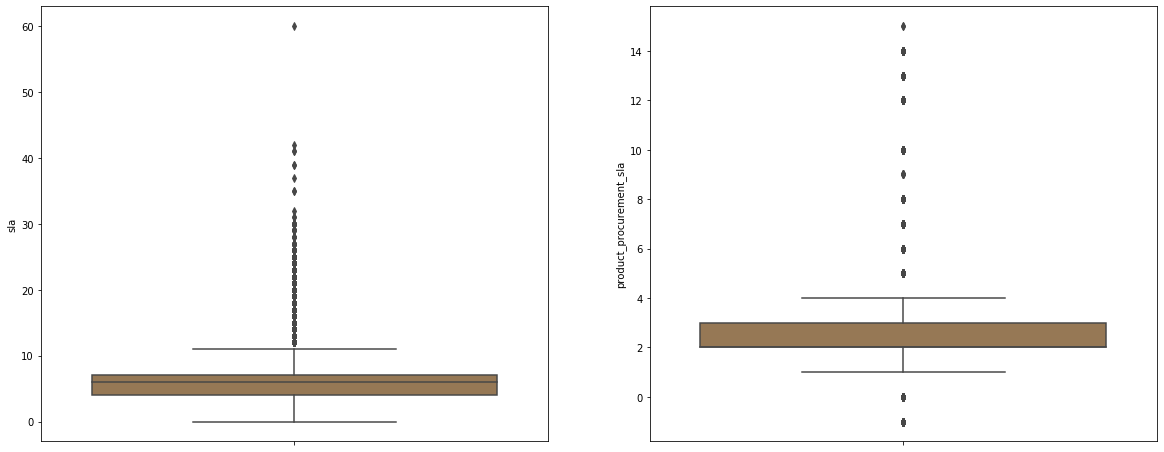

In [ ]:
#sla and product_procurement_sla
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(y=df.sla, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(y=df.product_procurement_sla, palette=("cubehelix"))

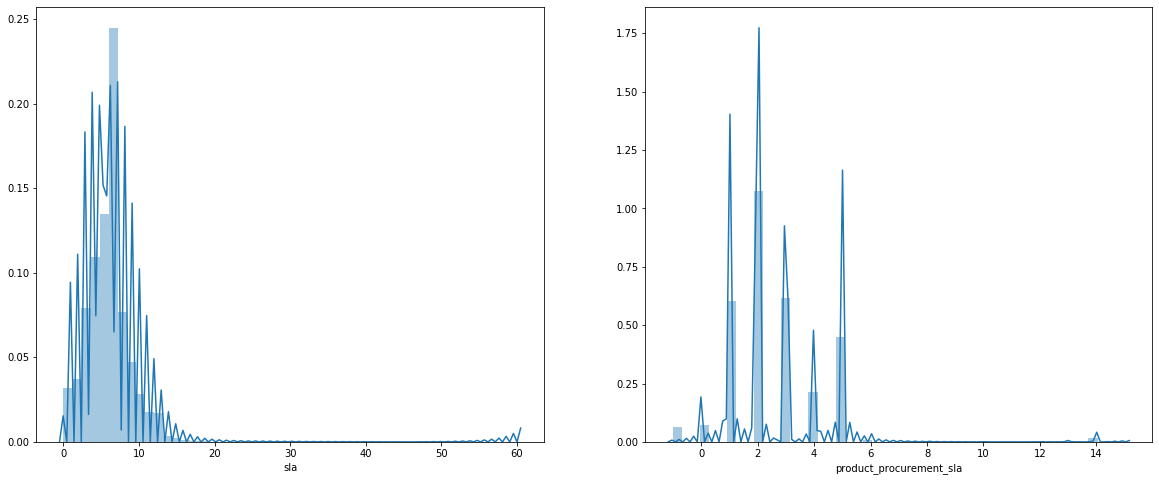

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df.sla)

plt.subplot(1,2,2)
sns.distplot(df.product_procurement_sla)

In [ ]:
df.product_procurement_sla.value_counts()

 2     180196
 3     103459
 1     101052
 5      75066
 4      35692
 0      11878
-1      10901
 14      2986
 6       1623
 13       485
 8        207
 7        124
 10        68
 12        58
 9          7
 15         2
Name: product_procurement_sla, dtype: int64

In [ ]:
#Converting negative values to the positive
df.product_procurement_sla = df.product_procurement_sla.abs()

In [ ]:
len(df.loc[df.product_procurement_sla<0])

0

#outliers treatment

In [ ]:
# We can see that there are some outliers present so we can treat these outliers before proceeding further

percentiles = df['sla'].quantile([0.05,0.95]).values
df['sla'][df['sla'] <= percentiles[0]] = percentiles[0]
df['sla'][df['sla'] >= percentiles[1]] = percentiles[1]

In [ ]:
#also for product_procurement_sla

percentiles = df['product_procurement_sla'].quantile([0.05,0.95]).values
df['product_procurement_sla'][df['product_procurement_sla'] <= percentiles[0]] = percentiles[0]
df['product_procurement_sla'][df['product_procurement_sla'] >= percentiles[1]] = percentiles[1]

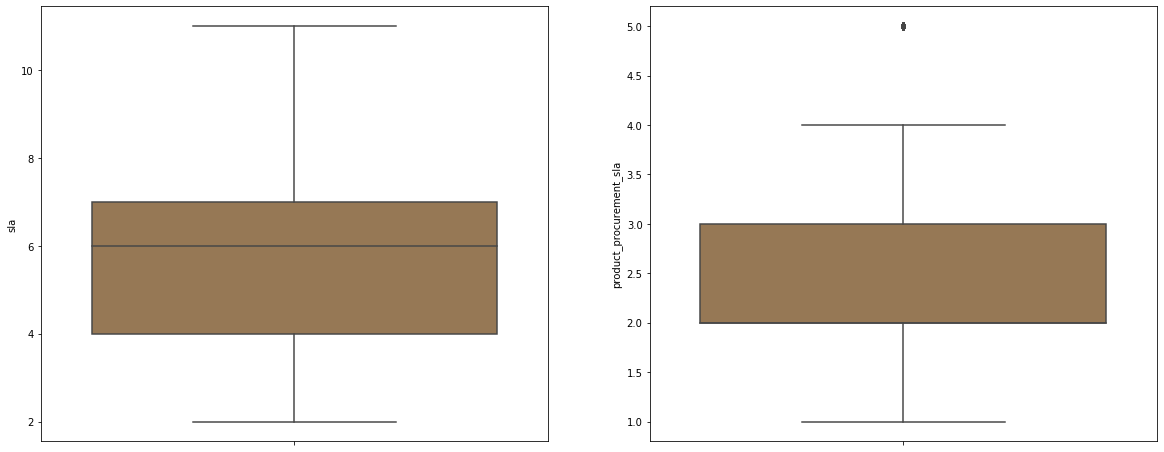

In [ ]:
#sla and product_procurement_sla
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(y=df.sla, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(y=df.product_procurement_sla, palette=("cubehelix"))

In [ ]:
#check for duplicates
df.loc[df.duplicated()]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, order_payment_type, sla, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [ ]:
len(df[df.duplicated(['order_id','order_item_id'])])

12587

In [ ]:
#since 2 products cant have same order_id
df = df[~df.duplicated(['order_id','order_item_id'])]

In [ ]:
len(df[df.duplicated(['order_id','order_item_id'])])

0

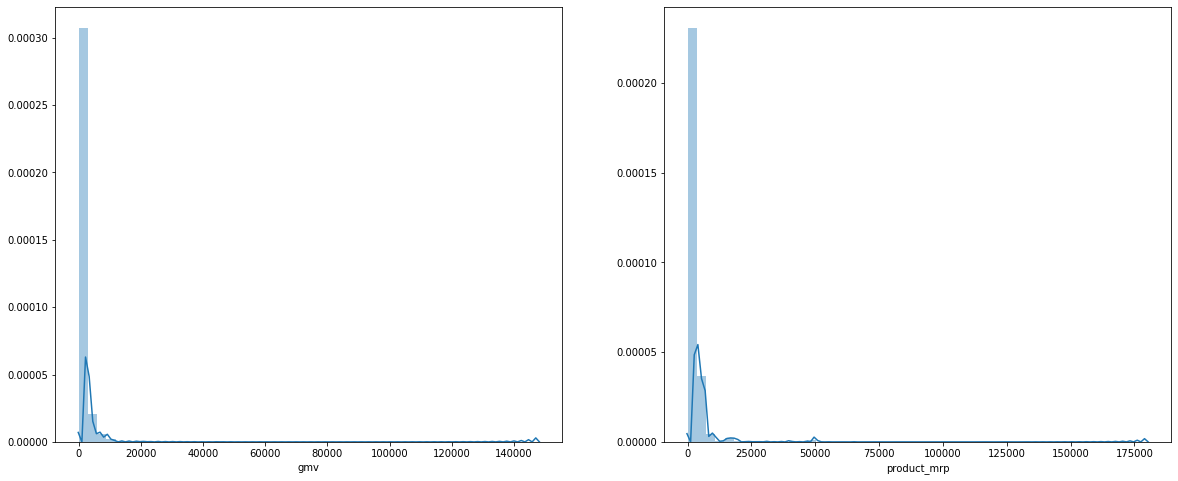

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df.gmv)

plt.subplot(1,2,2)
sns.distplot(df.product_mrp)

plt.show()



# Feature Engineering

#Pricing KPI

#gmv (Gross Merchendising Value - The cost price at which the item is sold multiplied by number of units)

In [ ]:
# Let's derive listing price, which is nothing but gmv/units

df['listing_price'] = round((df.gmv/df.units),2)

In [ ]:
#Let's check if there are any rows with listing price > MRP

len(df.loc[df.listing_price>df.product_mrp])

0

In [ ]:
df.head()

fsn_id          order_date  Year  Month                 order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3,419,300,926,147,000.00   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1,420,830,839,915,200.00   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10 2,421,912,925,714,800.00   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10 4,416,592,101,738,400.00   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10 4,419,525,153,426,400.00   

             order_item_id      gmv  units order_payment_type  sla  \
0 3,419,300,926,147,000.00 6,400.00      1                COD    5   
1 1,420,830,839,915,200.00 6,900.00      1                COD    7   
2 2,421,912,925,714,800.00 1,990.00      1                COD   10   
3 4,416,592,101,738,400.00 1,690.00      1            Prepaid    4   
4 4,419,525,153,426,400.00 1,618.00      1            Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod     7,190.00                        1   
1              CameraTripod     7,190.00                        1   
2              CameraTripod     2,099.00                        3   
3              CameraTripod     2,099.00                        3   
4              CameraTripod     2,099.00                        3   

   listing_price  
0       6,400.00  
1       6,900.00  
2       1,990.00  
3       1,690.00  
4       1,618.00

#Discount

In [ ]:
# Let's now calculate the discount %, which is nothing but (mrp-list price)/mrp
df['discount'] = round(((df.product_mrp - df.listing_price)/(df.product_mrp)),2)

In [ ]:
df['discount'].describe()

count   511,217.00
mean          0.45
std           0.24
min           0.00
25%           0.26
50%           0.46
75%           0.63
max           1.00
Name: discount, dtype: float64

#Total Price

In [ ]:
df['Order_Item_Value'] = df['product_mrp'] * df['units']

#Mapping Week into the Data

In [ ]:
# We can create the week number
df['week'] = np.where(df.Year == 2015, (df.order_date.dt.week - pd.to_datetime('2015-07-01').week + 1), df.order_date.dt.week+27)

# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
df.week.values[(df.Year == 2016) & (df.week == 80)] = 27

In [ ]:
df.head()

fsn_id          order_date  Year  Month                 order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3,419,300,926,147,000.00   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1,420,830,839,915,200.00   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10 2,421,912,925,714,800.00   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10 4,416,592,101,738,400.00   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10 4,419,525,153,426,400.00   

             order_item_id      gmv  units order_payment_type  sla  \
0 3,419,300,926,147,000.00 6,400.00      1                COD    5   
1 1,420,830,839,915,200.00 6,900.00      1                COD    7   
2 2,421,912,925,714,800.00 1,990.00      1                COD   10   
3 4,416,592,101,738,400.00 1,690.00      1            Prepaid    4   
4 4,419,525,153,426,400.00 1,618.00      1            Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod     7,190.00                        1   
1              CameraTripod     7,190.00                        1   
2              CameraTripod     2,099.00                        3   
3              CameraTripod     2,099.00                        3   
4              CameraTripod     2,099.00                        3   

   listing_price  discount  Order_Item_Value  week  
0       6,400.00      0.11          7,190.00    16  
1       6,900.00      0.04          7,190.00    17  
2       1,990.00      0.05          2,099.00    17  
3       1,690.00      0.19          2,099.00    16  
4       1,618.00      0.23          2,099.00    16

#Payment type

In [ ]:
# Prepaid = '1' or COD = '0'
df['order_payment_type'] = np.where(df['order_payment_type'] == "Prepaid",1,0)

#Calendar

In [ ]:
## Creating Calendar for the period
calendar = pd.DataFrame(pd.date_range('2015-07-01','2016-06-30').tolist(), columns = ['Date'])

In [ ]:
### Mapping week in the calendar
calendar['week'] = calendar.Date.dt.week
### Jan 2016 should be week 54 ,not week 1.
calendar['week'] = np.where((calendar['week'] <= 26) & (calendar.Date.dt.year == 2016), calendar['week']+53, calendar['week'])

In [ ]:
### Special Sales List

In [ ]:
special_sales_list = ["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29",
                      "2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09",
                      "2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                      "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02",
                      "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02","2016-02-14",
                      "2016-02-15","2016-02-20","2016-02-21","2016-03-07","2016-03-08","2016-03-09","2016-05-25",
                      "2016-05-26","2016-05-27"]

ss_list = pd.DataFrame(special_sales_list,columns = ['Date'])
ss_list['Date'] = pd.to_datetime(ss_list['Date'])
ss_list['Special_sales'] = True

In [ ]:
calendar = calendar.merge(ss_list, 'left')
calendar.fillna(False, inplace = True)

In [ ]:
calendar['Special_sales'] = calendar['Special_sales'].astype(int)

In [ ]:
calendar.head()

Date  week  Special_sales
0 2015-07-01    27              0
1 2015-07-02    27              0
2 2015-07-03    27              0
3 2015-07-04    27              0
4 2015-07-05    27              0

#Create separate columns if Pay date (if 1st or 15th of the month) and holidays by creating a flag as a 0 or 1. For eg. if Holiday is there, the value will be 1.

In [ ]:
#Payday

calendar['Payday'] = ((calendar['Date'].dt.day == 1) | (calendar['Date'].dt.day == 15)).astype(int)

# Climate Data


In [ ]:
# Ontario Climate data of year 2015-2016 
ontario_climate_2015 = pd.DataFrame(pd.read_csv('ONTARIO-2015.csv',encoding="ISO-8859-1",skiprows=24))
ontario_climate_2016 = pd.DataFrame(pd.read_csv('ONTARIO-2016.csv',encoding="ISO-8859-1",skiprows=24))

In [ ]:
## Merging Calendar with dataset on week

ontario_climate = ontario_climate_2015.append(ontario_climate_2016)
ontario_climate = ontario_climate.reset_index()
ontario_climate.head()

index   Date/Time  Year  Month  Day Data Quality  Max Temp (Â°C)  \
0      0  2015-01-01  2015      1    1          â             0.00   
1      1  2015-01-02  2015      1    2          â             3.00   
2      2  2015-01-03  2015      1    3          â             2.50   
3      3  2015-01-04  2015      1    4          â             2.50   
4      4  2015-01-05  2015      1    5          â           -10.00   

  Max Temp Flag  Min Temp (Â°C) Min Temp Flag  ...  Total Snow (cm)  \
0           NaN           -8.50           NaN  ...             0.00   
1           NaN           -3.00           NaN  ...             0.00   
2           NaN           -4.00           NaN  ...             0.00   
3           NaN            0.00           NaN  ...             1.00   
4           NaN          -13.50           NaN  ...             3.00   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN               0.00               NaN               0.00   
1             NaN               0.00               NaN               0.00   
2             NaN              24.00               NaN               0.00   
3             NaN               1.00               NaN               0.00   
4             NaN               3.00               NaN               1.00   

  Snow on Grnd Flag  Dir of Max Gust (10s deg) Dir of Max Gust Flag  \
0               NaN                        nan                  nan   
1               NaN                        nan                  nan   
2               NaN                        nan                  nan   
3               NaN                        nan                  nan   
4               NaN                        nan                  nan   

   Spd of Max Gust (km/h) Spd of Max Gust Flag  
0                     nan                  nan  
1                     nan                  nan  
2                     nan                  nan  
3                     nan                  nan  
4                     nan                  nan  

[5 rows x 28 columns]

In [ ]:
### Checking for any nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

index                         0.00
Date/Time                     0.00
Year                          0.00
Month                         0.00
Day                           0.00
Data Quality                 37.62
Max Temp (Â°C)               39.53
Max Temp Flag                98.08
Min Temp (Â°C)               44.05
Min Temp Flag                93.57
Mean Temp (Â°C)              44.05
Mean Temp Flag               93.57
Heat Deg Days (Â°C)          44.05
Heat Deg Days Flag           93.57
Cool Deg Days (Â°C)          44.05
Cool Deg Days Flag           93.57
Total Rain (mm)              37.62
Total Rain Flag              98.63
Total Snow (cm)              37.62
Total Snow Flag              97.81
Total Precip (mm)            37.62
Total Precip Flag            97.40
Snow on Grnd (cm)            37.62
Snow on Grnd Flag            98.91
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [ ]:
## Dropping columns we do not require in the analysis.
ontario_climate.drop(['index','Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                      'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Total Snow Flag',
                      'Total Precip Flag','Snow on Grnd Flag','Dir of Max Gust (10s deg)','Dir of Max Gust Flag',
                      'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], axis = 1, inplace = True)

In [ ]:
ontario_climate.columns = ['Date','Year','Month','Day','max_temp_C','min_temp_C','mean_temp_C','heat_deg_days','cool_deg_days','total_rain_mm','total_snow_cm','total_precip_mm','snow_on_grnd_cm']

In [ ]:
ontario_climate['Date'] = ontario_climate['Date'].apply(pd.to_datetime)

In [ ]:
### Keeping Climate data from July 15 to June 16

ontario_climate=ontario_climate[(ontario_climate['Month'] >= 7) & (ontario_climate['Year'] == 2015) 
                               |(ontario_climate['Month'] <= 6) & (ontario_climate['Year'] == 2016)]

In [ ]:
### Mapping week in the Climate data
ontario_climate['week'] = ontario_climate.Date.dt.week

### Jan 2016 should be week 54 ,not week 1.
ontario_climate['week'] = np.where((ontario_climate['week'] <= 26) & (ontario_climate['Year'] == 2016), ontario_climate['week']+53, ontario_climate['week'])

ontario_climate = ontario_climate.reset_index()
ontario_climate.drop('index',axis=1,inplace=True)
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  \
0 2015-07-01  2015      7    1       24.50       17.00        20.80   
1 2015-07-02  2015      7    2       24.00       14.00        19.00   
2 2015-07-03  2015      7    3       25.00       10.00        17.50   
3 2015-07-04  2015      7    4       26.00       11.00        18.50   
4 2015-07-05  2015      7    5       28.00       14.00        21.00   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           2.80           0.00           0.00   
1           0.00           1.00           0.00           0.00   
2           0.50           0.00           0.00           0.00   
3           0.00           0.50           0.00           0.00   
4           0.00           3.00           0.00           0.00   

   total_precip_mm  snow_on_grnd_cm  week  
0             0.00             0.00    27  
1             0.00             0.00    27  
2             0.00             0.00    27  
3             0.00             0.00    27  
4             0.00             0.00    27

In [ ]:
### Checking for any nan values

round((ontario_climate.isnull().sum()/len(ontario_climate.index))*100,2)

Date               0.00
Year               0.00
Month              0.00
Day                0.00
max_temp_C        43.17
min_temp_C        47.81
mean_temp_C       47.81
heat_deg_days     47.81
cool_deg_days     47.81
total_rain_mm     41.26
total_snow_cm     41.26
total_precip_mm   41.26
snow_on_grnd_cm   41.26
week               0.00
dtype: float64

In [ ]:
### Replacing Nan with mean value
ontario_climate['max_temp_C'] = ontario_climate['max_temp_C'].fillna(ontario_climate['max_temp_C'].mean())
ontario_climate['min_temp_C'] = ontario_climate['min_temp_C'].fillna(ontario_climate['min_temp_C'].mean())
ontario_climate['mean_temp_C'] = ontario_climate['mean_temp_C'].fillna(ontario_climate['mean_temp_C'].mean())
ontario_climate['heat_deg_days'] = ontario_climate['heat_deg_days'].fillna(ontario_climate['heat_deg_days'].mean())
ontario_climate['cool_deg_days'] = ontario_climate['cool_deg_days'].fillna(ontario_climate['cool_deg_days'].mean())
ontario_climate['total_rain_mm'] = ontario_climate['total_rain_mm'].fillna(ontario_climate['total_rain_mm'].mean())
ontario_climate['total_snow_cm'] = ontario_climate['total_snow_cm'].fillna(ontario_climate['total_snow_cm'].mean())
ontario_climate['total_precip_mm'] = ontario_climate['total_precip_mm'].fillna(ontario_climate['total_precip_mm'].mean())
ontario_climate['snow_on_grnd_cm'] = ontario_climate['snow_on_grnd_cm'].fillna(ontario_climate['snow_on_grnd_cm'].mean())

In [ ]:
ontario_climate.head()

Date  Year  Month  Day  max_temp_C  min_temp_C  mean_temp_C  \
0 2015-07-01  2015      7    1       24.50       17.00        20.80   
1 2015-07-02  2015      7    2       24.00       14.00        19.00   
2 2015-07-03  2015      7    3       25.00       10.00        17.50   
3 2015-07-04  2015      7    4       26.00       11.00        18.50   
4 2015-07-05  2015      7    5       28.00       14.00        21.00   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           2.80           0.00           0.00   
1           0.00           1.00           0.00           0.00   
2           0.50           0.00           0.00           0.00   
3           0.00           0.50           0.00           0.00   
4           0.00           3.00           0.00           0.00   

   total_precip_mm  snow_on_grnd_cm  week  
0             0.00             0.00    27  
1             0.00             0.00    27  
2             0.00             0.00    27  
3             0.00             0.00    27  
4             0.00             0.00    27

#Other KPI

In [ ]:
#Net Promoters Score & Stock_Index

nps_score = pd.read_excel("Media data and other information.xlsx", sheet_name='Monthly NPS Score', skiprows=1)

In [ ]:
### Transforming NPS and Stock_index

nps_score = nps_score.T.reset_index(drop=True)
nps_score.columns = ['NPS','Stock_Index']
nps_score = nps_score.drop(nps_score.index[[0]]).reset_index(drop=True)

In [ ]:
### Adding Month and Year

nps_score['Month'] = pd.Series([7,8,9,10,11,12,1,2,3,4,5,6])

nps_score['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016])

In [ ]:
nps_score['NPS'] = nps_score['NPS'].astype(float)

nps_score['Stock_Index'] = nps_score['Stock_Index'].astype(float)

In [ ]:
nps_score.head()

NPS  Stock_Index  Month  Year
0 54.60     1,177.00      7  2015
1 59.99     1,206.00      8  2015
2 46.93     1,101.00      9  2015
3 44.40     1,210.00     10  2015
4 47.00     1,233.00     11  2015

#Mapping KPI on Calendar

In [ ]:
calendar = calendar.merge(ontario_climate, 'left')

In [ ]:
calendar = calendar.merge(nps_score, 'left')

In [ ]:
# lets create the week number
calendar['week'] = np.where(calendar.Date.dt.year == 2015, (calendar.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), calendar.Date.dt.week+27)

In [ ]:
# Dates like 2016-01-01 will be 53rd week as per ISO standard, hence the week value would be 53+27=80.
# We can make those values as week 27
calendar.week.values[(calendar.Date.dt.year == 2016) & (calendar.week == 80)] = 27

In [ ]:
calendar.head()

Date  week  Special_sales  Payday  Year  Month  Day  max_temp_C  \
0 2015-07-01     1              0       1  2015      7    1       24.50   
1 2015-07-02     1              0       0  2015      7    2       24.00   
2 2015-07-03     1              0       0  2015      7    3       25.00   
3 2015-07-04     1              0       0  2015      7    4       26.00   
4 2015-07-05     1              0       0  2015      7    5       28.00   

   min_temp_C  mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  \
0       17.00        20.80           0.00           2.80           0.00   
1       14.00        19.00           0.00           1.00           0.00   
2       10.00        17.50           0.50           0.00           0.00   
3       11.00        18.50           0.00           0.50           0.00   
4       14.00        21.00           0.00           3.00           0.00   

   total_snow_cm  total_precip_mm  snow_on_grnd_cm   NPS  Stock_Index  
0           0.00             0.00             0.00 54.60     1,177.00  
1           0.00             0.00             0.00 54.60     1,177.00  
2           0.00             0.00             0.00 54.60     1,177.00  
3           0.00             0.00             0.00 54.60     1,177.00  
4           0.00             0.00             0.00 54.60     1,177.00

In [ ]:
calendar = pd.DataFrame(calendar.groupby('week').agg({'NPS':'mean','Stock_Index':'mean',
                                                             'Special_sales':'mean','Payday':'mean',
                                                             'max_temp_C':'mean','min_temp_C':'mean',
                                                             'mean_temp_C':'mean','heat_deg_days':'mean',
                                                             'cool_deg_days':'mean','total_rain_mm':'mean',
                                                             'total_snow_cm':'mean','total_precip_mm':'mean',
                                                             'snow_on_grnd_cm':'mean'}))

In [ ]:
calendar.reset_index(inplace = True)

In [ ]:
calendar.head()

week   NPS  Stock_Index  Special_sales  Payday  max_temp_C  min_temp_C  \
0     1 54.60     1,177.00           0.00    0.20       25.50       13.20   
1     2 54.60     1,177.00           0.00    0.00       24.03       14.39   
2     3 54.60     1,177.00           0.29    0.14       27.38       16.31   
3     4 54.60     1,177.00           0.00    0.00       28.24       14.34   
4     5 56.14     1,185.29           0.00    0.14       29.81       16.24   

   mean_temp_C  heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0        19.36           0.10           1.46           0.00           0.00   
1        19.26           1.06           2.32           4.15           0.03   
2        21.91           0.82           4.72           1.57           0.03   
3        20.54           1.63           4.17           1.14           0.03   
4        23.09           0.82           5.91           4.34           0.03   

   total_precip_mm  snow_on_grnd_cm  
0             0.00             0.00  
1             4.18             0.04  
2             1.60             0.04  
3             1.17             0.04  
4             4.37             0.04

#Advertisement Related KPI

#Marketing

In [ ]:
### Marketing Investment Data
marketing = pd.read_excel("Media data and other information.xlsx", sheet_name='Media Investment', skipfooter = 4, skiprows=2)

In [ ]:
marketing.head()

Unnamed: 0  Year  Month  Total Investment   TV  Digital  Sponsorship  \
0         nan  2015      7             17.06 0.22     2.53         7.41   
1         nan  2015      8              5.06 0.01     1.28         1.06   
2         nan  2015      9             96.25 3.88     1.36        62.79   
3         nan  2015     10            170.16 6.14    12.62        84.67   
4         nan  2015     11             51.22 4.22     1.28        14.17   

   Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
0               0.00              1.33         0.55  5.02    nan    nan  
1               0.00              0.13         0.07  2.51    nan    nan  
2               0.61             16.38         5.04  6.20    nan    nan  
3               3.44             24.37         6.97 31.93    nan    nan  
4               0.17             19.56         6.60  5.22    nan    nan

In [ ]:
marketing.drop('Unnamed: 0', axis = 1, inplace = True)
marketing.replace(np.nan,0,inplace = True)
marketing['Date'] = pd.to_datetime(marketing[['Year', 'Month']].assign(DAY=1))
marketing.set_index('Date', inplace = True)
marketing

Year  Month  Total Investment   TV  Digital  Sponsorship  \
Date                                                                   
2015-07-01  2015      7             17.06 0.22     2.53         7.41   
2015-08-01  2015      8              5.06 0.01     1.28         1.06   
2015-09-01  2015      9             96.25 3.88     1.36        62.79   
2015-10-01  2015     10            170.16 6.14    12.62        84.67   
2015-11-01  2015     11             51.22 4.22     1.28        14.17   
2015-12-01  2015     12            106.75 5.40     3.06        56.71   
2016-01-01  2016      1             74.20 4.38     0.46         4.20   
2016-02-01  2016      2             48.05 2.59     1.91        11.73   
2016-03-01  2016      3            100.02 9.30     2.10        41.59   
2016-04-01  2016      4             56.85 5.21     0.87        24.31   
2016-05-01  2016      5             78.06 1.37     0.77        31.68   
2016-06-01  2016      6             42.83 1.66     1.42        25.05   

            Content Marketing  Online marketing   Affiliates   SEM  Radio  \
Date                                                                        
2015-07-01               0.00              1.33         0.55  5.02   0.00   
2015-08-01               0.00              0.13         0.07  2.51   0.00   
2015-09-01               0.61             16.38         5.04  6.20   0.00   
2015-10-01               3.44             24.37         6.97 31.93   0.00   
2015-11-01               0.17             19.56         6.60  5.22   0.00   
2015-12-01               1.07             22.50         6.83 11.18   0.00   
2016-01-01               0.90             22.90         7.37  4.20   2.70   
2016-02-01               0.60             19.89         6.47  4.87   0.00   
2016-03-01               0.37             18.44         6.22  5.19   0.87   
2016-04-01               0.03             16.51         5.69  4.22   0.00   
2016-05-01               0.79             23.65         6.80  6.91   1.10   
2016-06-01               0.05              7.97         2.77  3.74   0.00   

            Other  
Date               
2015-07-01   0.00  
2015-08-01   0.00  
2015-09-01   0.00  
2015-10-01   0.00  
2015-11-01   0.00  
2015-12-01   0.00  
2016-01-01  27.09  
2016-02-01   0.00  
2016-03-01  15.95  
2016-04-01   0.00  
2016-05-01   4.99  
2016-06-01   0.00

In [ ]:
##Renaming the columns
marketing.columns = ['Year','Month','Total_Investment','TV','Digital','Sponsorship','Content_marketing',
                     'Online_marketing','Affiliates','SEM','Radio','Other']

In [ ]:
## convert to datetimeindex
marketing.index = pd.to_datetime(marketing.index)

In [ ]:
marketing

Year  Month  Total_Investment   TV  Digital  Sponsorship  \
Date                                                                   
2015-07-01  2015      7             17.06 0.22     2.53         7.41   
2015-08-01  2015      8              5.06 0.01     1.28         1.06   
2015-09-01  2015      9             96.25 3.88     1.36        62.79   
2015-10-01  2015     10            170.16 6.14    12.62        84.67   
2015-11-01  2015     11             51.22 4.22     1.28        14.17   
2015-12-01  2015     12            106.75 5.40     3.06        56.71   
2016-01-01  2016      1             74.20 4.38     0.46         4.20   
2016-02-01  2016      2             48.05 2.59     1.91        11.73   
2016-03-01  2016      3            100.02 9.30     2.10        41.59   
2016-04-01  2016      4             56.85 5.21     0.87        24.31   
2016-05-01  2016      5             78.06 1.37     0.77        31.68   
2016-06-01  2016      6             42.83 1.66     1.42        25.05   

            Content_marketing  Online_marketing  Affiliates   SEM  Radio  \
Date                                                                       
2015-07-01               0.00              1.33        0.55  5.02   0.00   
2015-08-01               0.00              0.13        0.07  2.51   0.00   
2015-09-01               0.61             16.38        5.04  6.20   0.00   
2015-10-01               3.44             24.37        6.97 31.93   0.00   
2015-11-01               0.17             19.56        6.60  5.22   0.00   
2015-12-01               1.07             22.50        6.83 11.18   0.00   
2016-01-01               0.90             22.90        7.37  4.20   2.70   
2016-02-01               0.60             19.89        6.47  4.87   0.00   
2016-03-01               0.37             18.44        6.22  5.19   0.87   
2016-04-01               0.03             16.51        5.69  4.22   0.00   
2016-05-01               0.79             23.65        6.80  6.91   1.10   
2016-06-01               0.05              7.97        2.77  3.74   0.00   

            Other  
Date               
2015-07-01   0.00  
2015-08-01   0.00  
2015-09-01   0.00  
2015-10-01   0.00  
2015-11-01   0.00  
2015-12-01   0.00  
2016-01-01  27.09  
2016-02-01   0.00  
2016-03-01  15.95  
2016-04-01   0.00  
2016-05-01   4.99  
2016-06-01   0.00

In [ ]:
## add new next month for correct resample
idx = marketing.index[-1] + pd.offsets.MonthBegin(1)
idx

Timestamp('2016-07-01 00:00:00')

In [ ]:
marketing = marketing.append(marketing.iloc[[-1]].rename({marketing.index[-1]: idx}))
marketing

Year  Month  Total_Investment   TV  Digital  Sponsorship  \
Date                                                                   
2015-07-01  2015      7             17.06 0.22     2.53         7.41   
2015-08-01  2015      8              5.06 0.01     1.28         1.06   
2015-09-01  2015      9             96.25 3.88     1.36        62.79   
2015-10-01  2015     10            170.16 6.14    12.62        84.67   
2015-11-01  2015     11             51.22 4.22     1.28        14.17   
2015-12-01  2015     12            106.75 5.40     3.06        56.71   
2016-01-01  2016      1             74.20 4.38     0.46         4.20   
2016-02-01  2016      2             48.05 2.59     1.91        11.73   
2016-03-01  2016      3            100.02 9.30     2.10        41.59   
2016-04-01  2016      4             56.85 5.21     0.87        24.31   
2016-05-01  2016      5             78.06 1.37     0.77        31.68   
2016-06-01  2016      6             42.83 1.66     1.42        25.05   
2016-07-01  2016      6             42.83 1.66     1.42        25.05   

            Content_marketing  Online_marketing  Affiliates   SEM  Radio  \
Date                                                                       
2015-07-01               0.00              1.33        0.55  5.02   0.00   
2015-08-01               0.00              0.13        0.07  2.51   0.00   
2015-09-01               0.61             16.38        5.04  6.20   0.00   
2015-10-01               3.44             24.37        6.97 31.93   0.00   
2015-11-01               0.17             19.56        6.60  5.22   0.00   
2015-12-01               1.07             22.50        6.83 11.18   0.00   
2016-01-01               0.90             22.90        7.37  4.20   2.70   
2016-02-01               0.60             19.89        6.47  4.87   0.00   
2016-03-01               0.37             18.44        6.22  5.19   0.87   
2016-04-01               0.03             16.51        5.69  4.22   0.00   
2016-05-01               0.79             23.65        6.80  6.91   1.10   
2016-06-01               0.05              7.97        2.77  3.74   0.00   
2016-07-01               0.05              7.97        2.77  3.74   0.00   

            Other  
Date               
2015-07-01   0.00  
2015-08-01   0.00  
2015-09-01   0.00  
2015-10-01   0.00  
2015-11-01   0.00  
2015-12-01   0.00  
2016-01-01  27.09  
2016-02-01   0.00  
2016-03-01  15.95  
2016-04-01   0.00  
2016-05-01   4.99  
2016-06-01   0.00  
2016-07-01   0.00

In [ ]:
#Resampling the data on weekly frequency
marketing = marketing.resample('W').ffill().iloc[:-1]
marketing

Year  Month  Total_Investment   TV  Digital  Sponsorship  \
Date                                                                   
2015-07-05  2015      7             17.06 0.22     2.53         7.41   
2015-07-12  2015      7             17.06 0.22     2.53         7.41   
2015-07-19  2015      7             17.06 0.22     2.53         7.41   
2015-07-26  2015      7             17.06 0.22     2.53         7.41   
2015-08-02  2015      8              5.06 0.01     1.28         1.06   
2015-08-09  2015      8              5.06 0.01     1.28         1.06   
2015-08-16  2015      8              5.06 0.01     1.28         1.06   
2015-08-23  2015      8              5.06 0.01     1.28         1.06   
2015-08-30  2015      8              5.06 0.01     1.28         1.06   
2015-09-06  2015      9             96.25 3.88     1.36        62.79   
2015-09-13  2015      9             96.25 3.88     1.36        62.79   
2015-09-20  2015      9             96.25 3.88     1.36        62.79   
2015-09-27  2015      9             96.25 3.88     1.36        62.79   
2015-10-04  2015     10            170.16 6.14    12.62        84.67   
2015-10-11  2015     10            170.16 6.14    12.62        84.67   
2015-10-18  2015     10            170.16 6.14    12.62        84.67   
2015-10-25  2015     10            170.16 6.14    12.62        84.67   
2015-11-01  2015     11             51.22 4.22     1.28        14.17   
2015-11-08  2015     11             51.22 4.22     1.28        14.17   
2015-11-15  2015     11             51.22 4.22     1.28        14.17   
2015-11-22  2015     11             51.22 4.22     1.28        14.17   
2015-11-29  2015     11             51.22 4.22     1.28        14.17   
2015-12-06  2015     12            106.75 5.40     3.06        56.71   
2015-12-13  2015     12            106.75 5.40     3.06        56.71   
2015-12-20  2015     12            106.75 5.40     3.06        56.71   
2015-12-27  2015     12            106.75 5.40     3.06        56.71   
2016-01-03  2016      1             74.20 4.38     0.46         4.20   
2016-01-10  2016      1             74.20 4.38     0.46         4.20   
2016-01-17  2016      1             74.20 4.38     0.46         4.20   
2016-01-24  2016      1             74.20 4.38     0.46         4.20   
2016-01-31  2016      1             74.20 4.38     0.46         4.20   
2016-02-07  2016      2             48.05 2.59     1.91        11.73   
2016-02-14  2016      2             48.05 2.59     1.91        11.73   
2016-02-21  2016      2             48.05 2.59     1.91        11.73   
2016-02-28  2016      2             48.05 2.59     1.91        11.73   
2016-03-06  2016      3            100.02 9.30     2.10        41.59   
2016-03-13  2016      3            100.02 9.30     2.10        41.59   
2016-03-20  2016      3            100.02 9.30     2.10        41.59   
2016-03-27  2016      3            100.02 9.30     2.10        41.59   
2016-04-03  2016      4             56.85 5.21     0.87        24.31   
2016-04-10  2016      4             56.85 5.21     0.87        24.31   
2016-04-17  2016      4             56.85 5.21     0.87        24.31   
2016-04-24  2016      4             56.85 5.21     0.87        24.31   
2016-05-01  2016      5             78.06 1.37     0.77        31.68   
2016-05-08  2016      5             78.06 1.37     0.77        31.68   
2016-05-15  2016      5             78.06 1.37     0.77        31.68   
2016-05-22  2016      5             78.06 1.37     0.77        31.68   
2016-05-29  2016      5             78.06 1.37     0.77        31.68   
2016-06-05  2016      6             42.83 1.66     1.42        25.05   
2016-06-12  2016      6             42.83 1.66     1.42        25.05   
2016-06-19  2016      6             42.83 1.66     1.42        25.05   
2016-06-26  2016      6             42.83 1.66     1.42        25.05   

            Content_marketing  Online_marketing  Affiliates   SEM  Radio  \
Date                                           

In [ ]:
### divide by size of months
marketing['Total_Investment'] /= marketing.resample('MS')['Total_Investment'].transform('size')
marketing['TV'] /= marketing.resample('MS')['TV'].transform('size')
marketing['Digital'] /= marketing.resample('MS')['Digital'].transform('size')
marketing['Sponsorship'] /= marketing.resample('MS')['Sponsorship'].transform('size')
marketing['Content_marketing'] /= marketing.resample('MS')['Content_marketing'].transform('size')
marketing['Online_marketing'] /= marketing.resample('MS')['Online_marketing'].transform('size')
marketing['Affiliates'] /= marketing.resample('MS')['Affiliates'].transform('size')
marketing['SEM'] /= marketing.resample('MS')['SEM'].transform('size')
marketing['Radio'] /= marketing.resample('MS')['Radio'].transform('size')
marketing['Other'] /= marketing.resample('MS')['Other'].transform('size')

In [ ]:
marketing.head()

Year  Month  Total_Investment   TV  Digital  Sponsorship  \
Date                                                                   
2015-07-05  2015      7              4.27 0.05     0.63         1.85   
2015-07-12  2015      7              4.27 0.05     0.63         1.85   
2015-07-19  2015      7              4.27 0.05     0.63         1.85   
2015-07-26  2015      7              4.27 0.05     0.63         1.85   
2015-08-02  2015      8              1.01 0.00     0.26         0.21   

            Content_marketing  Online_marketing  Affiliates  SEM  Radio  Other  
Date                                                                            
2015-07-05               0.00              0.33        0.14 1.26   0.00   0.00  
2015-07-12               0.00              0.33        0.14 1.26   0.00   0.00  
2015-07-19               0.00              0.33        0.14 1.26   0.00   0.00  
2015-07-26               0.00              0.33        0.14 1.26   0.00   0.00  
2015-08-02               0.00              0.03        0.01 0.50   0.00   0.00

In [ ]:
marketing.reset_index(inplace = True)

###  Mapping week in the marketing

marketing['Date'] = pd.to_datetime(marketing['Date'])
# We can create the week number
marketing['week'] = np.where(marketing.Date.dt.year == 2015, (marketing.Date.dt.week - pd.to_datetime('2015-07-01').week + 1), marketing.Date.dt.week+27)

marketing.week.values[(marketing.Date.dt.year == 2016) & (marketing.week == 80)] = 27
marketing.sort_values('week', inplace = True)

In [ ]:
marketing.head()

Date  Year  Month  Total_Investment   TV  Digital  Sponsorship  \
0 2015-07-05  2015      7              4.27 0.05     0.63         1.85   
1 2015-07-12  2015      7              4.27 0.05     0.63         1.85   
2 2015-07-19  2015      7              4.27 0.05     0.63         1.85   
3 2015-07-26  2015      7              4.27 0.05     0.63         1.85   
4 2015-08-02  2015      8              1.01 0.00     0.26         0.21   

   Content_marketing  Online_marketing  Affiliates  SEM  Radio  Other  week  
0               0.00              0.33        0.14 1.26   0.00   0.00     1  
1               0.00              0.33        0.14 1.26   0.00   0.00     2  
2               0.00              0.33        0.14 1.26   0.00   0.00     3  
3               0.00              0.33        0.14 1.26   0.00   0.00     4  
4               0.00              0.03        0.01 0.50   0.00   0.00     5

#Adstock

In [ ]:
def adstocked_advertising(adstock_rate=0.5, advertising = marketing):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising.iloc[i])
        else:
            adstocked_advertising.append(advertising.iloc[i] + adstock_rate * advertising.iloc[i-1])            
    return adstocked_advertising

In [ ]:
adstock = pd.DataFrame()

In [ ]:
adstock['TV_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['TV'])

adstock['Digital_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Digital'])

adstock['Sponsorship_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Sponsorship'])

adstock['Content_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Content_marketing'])

adstock['Online_marketing_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Online_marketing'])

adstock['Affiliates_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Affiliates'])

adstock['SEM_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['SEM'])

adstock['Radio_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Radio'])

adstock['Other_ads'] = adstocked_advertising(adstock_rate=0.5, advertising = marketing['Other'])

In [ ]:
adstock.head()

TV_ads  Digital_ads  Sponsorship_ads  Content_marketing_ads  \
0    0.05         0.63             1.85                   0.00   
1    0.08         0.95             2.78                   0.00   
2    0.08         0.95             2.78                   0.00   
3    0.08         0.95             2.78                   0.00   
4    0.03         0.57             1.14                   0.00   

   Online_marketing_ads  Affiliates_ads  SEM_ads  Radio_ads  Other_ads  
0                  0.33            0.14     1.26       0.00       0.00  
1                  0.50            0.21     1.88       0.00       0.00  
2                  0.50            0.21     1.88       0.00       0.00  
3                  0.50            0.21     1.88       0.00       0.00  
4                  0.19            0.08     1.13       0.00       0.00

#Mapping marketing and adstock


In [ ]:
marketing = pd.concat([marketing,adstock] ,axis=1)

In [ ]:
marketing.head()

Date  Year  Month  Total_Investment   TV  Digital  Sponsorship  \
0 2015-07-05  2015      7              4.27 0.05     0.63         1.85   
1 2015-07-12  2015      7              4.27 0.05     0.63         1.85   
2 2015-07-19  2015      7              4.27 0.05     0.63         1.85   
3 2015-07-26  2015      7              4.27 0.05     0.63         1.85   
4 2015-08-02  2015      8              1.01 0.00     0.26         0.21   

   Content_marketing  Online_marketing  Affiliates  ...  week  TV_ads  \
0               0.00              0.33        0.14  ...     1    0.05   
1               0.00              0.33        0.14  ...     2    0.08   
2               0.00              0.33        0.14  ...     3    0.08   
3               0.00              0.33        0.14  ...     4    0.08   
4               0.00              0.03        0.01  ...     5    0.03   

   Digital_ads  Sponsorship_ads  Content_marketing_ads  Online_marketing_ads  \
0         0.63             1.85                   0.00                  0.33   
1         0.95             2.78                   0.00                  0.50   
2         0.95             2.78                   0.00                  0.50   
3         0.95             2.78                   0.00                  0.50   
4         0.57             1.14                   0.00                  0.19   

   Affiliates_ads  SEM_ads  Radio_ads  Other_ads  
0            0.14     1.26       0.00       0.00  
1            0.21     1.88       0.00       0.00  
2            0.21     1.88       0.00       0.00  
3            0.21     1.88       0.00       0.00  
4            0.08     1.13       0.00       0.00  

[5 rows x 23 columns]

#Product premium-ness

In [ ]:
# The premium-ness of the product depends on the MRP. Higher the MRP, more premium is the product.
# Let's check the percentiles of MRP in the dataset.

df.product_mrp.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count   511,217.00
mean      2,500.78
std       4,699.53
min          79.00
25%         766.00
50%       1,200.00
75%       2,800.00
80%       3,150.00
90%       5,399.00
95%       6,990.00
99%      18,999.00
max     180,000.00
Name: product_mrp, dtype: float64

In [ ]:
# lets suppose products with MRP greater than 90 percentile to be premium products.
# Create a dataframe with mrp, number of units sold and gmv against each product vertical to analyse better.
prod_cat = pd.DataFrame(pd.pivot_table(df, values = ['units','product_mrp', 'gmv'], index = ['product_analytic_vertical'], 
               aggfunc={'units':np.sum, 'product_mrp':np.mean, 'gmv':np.sum}).to_records())

In [ ]:
# Tagging Marking products with MRP greater than 90th percentile with 1 and rest with 0
prod_cat['premium_product'] = np.where((prod_cat.product_mrp>df.product_mrp.quantile(0.9)),1,0)

In [ ]:
prod_cat.loc[prod_cat.premium_product==1]

product_analytic_vertical          gmv  product_mrp  units  premium_product
10            CameraLEDLight    20,215.00     6,738.33      3                1
16              DJController 2,335,536.00    17,692.87    191                1
39             KaraokePlayer    23,500.00    12,000.00      2                1
41          MotionController 4,134,009.00     5,841.38   1057                1
43                  SlingBox    20,495.00     7,999.00      5                1
45                SoundMixer   638,073.00    12,271.38     69                1
48             Teleconverter    15,299.00    20,490.00      1                1

#Teleconverter, SoundMixer, SlingBox, MotionController, KaraokePlayer, DJController are premium products. All other #products are mass products.
#Let's visualise how the premium products contribute towards the GMV

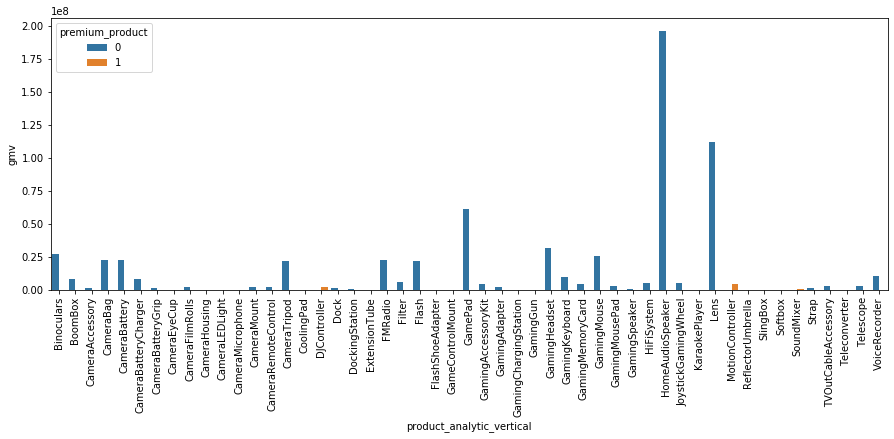

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = prod_cat.product_analytic_vertical, y=prod_cat.gmv, hue=prod_cat.premium_product)
plt.xticks(rotation=90)
plt.show()

We can clearly see that, maximum revenue is generated through mass producs like HomeAudioSpeaker, Lens, GamingPad, etc and not premium products that contibute quite less towards revenue.
The company hence should focus more on mass products than premium products.


In [ ]:
df = df.merge(prod_cat[['product_analytic_vertical', 'premium_product']] , left_on='product_analytic_vertical', 
            right_on='product_analytic_vertical',
                   how = 'inner')

In [ ]:
sales = df.copy()

In [ ]:
df.drop(['product_analytic_vertical'],1,inplace=True)

In [ ]:
df.head(5)

fsn_id          order_date  Year  Month                 order_id  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10 3,419,300,926,147,000.00   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10 1,420,830,839,915,200.00   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10 2,421,912,925,714,800.00   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10 4,416,592,101,738,400.00   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10 4,419,525,153,426,400.00   

             order_item_id      gmv  units  order_payment_type  sla  \
0 3,419,300,926,147,000.00 6,400.00      1                   0    5   
1 1,420,830,839,915,200.00 6,900.00      1                   0    7   
2 2,421,912,925,714,800.00 1,990.00      1                   0   10   
3 4,416,592,101,738,400.00 1,690.00      1                   1    4   
4 4,419,525,153,426,400.00 1,618.00      1                   1    6   

  product_analytic_category product_analytic_sub_category  product_mrp  \
0           CameraAccessory               CameraAccessory     7,190.00   
1           CameraAccessory               CameraAccessory     7,190.00   
2           CameraAccessory               CameraAccessory     2,099.00   
3           CameraAccessory               CameraAccessory     2,099.00   
4           CameraAccessory               CameraAccessory     2,099.00   

   product_procurement_sla  listing_price  discount  Order_Item_Value  week  \
0                        1       6,400.00      0.11          7,190.00    16   
1                        1       6,900.00      0.04          7,190.00    17   
2                        3       1,990.00      0.05          2,099.00    17   
3                        3       1,690.00      0.19          2,099.00    16   
4                        3       1,618.00      0.23          2,099.00    16   

   premium_product  
0                0  
1                0  
2                0  
3                0  
4                0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511217 entries, 0 to 511216
Data columns (total 19 columns):
fsn_id                           511217 non-null object
order_date                       511217 non-null datetime64[ns]
Year                             511217 non-null int64
Month                            511217 non-null int64
order_id                         511217 non-null float64
order_item_id                    511217 non-null float64
gmv                              511217 non-null float64
units                            511217 non-null int64
order_payment_type               511217 non-null int32
sla                              511217 non-null int64
product_analytic_category        511217 non-null object
product_analytic_sub_category    511217 non-null object
product_mrp                      511217 non-null float64
product_procurement_sla          511217 non-null int64
listing_price                    511217 non-null float64
discount                         511217 no

There are no null values in the dataset!
Columns like order_date, gmv, deliverybdays, deliverycdays, pincode have incorrect data types and need to be changed.



In [ ]:
#statistical info of the dataset
df.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99, 0.999])

Year      Month                 order_id  \
count 511,217.00 511,217.00               511,217.00   
mean    2,015.58       6.23 2,835,122,101,205,675.50   
std         0.49       3.67 1,290,983,206,428,332.50   
min     2,015.00       1.00           162,957,597.00   
25%     2,015.00       3.00 1,595,735,407,225,200.00   
50%     2,016.00       6.00 2,609,704,882,795,000.00   
75%     2,016.00      10.00 3,615,581,804,522,700.00   
90%     2,016.00      11.00 4,530,224,120,192,240.00   
99%     2,016.00      12.00 4,626,936,384,877,332.00   
99.9%   2,016.00      12.00 4,639,861,583,689,390.00   
max     2,016.00      12.00 4,641,664,595,370,500.00   

                   order_item_id        gmv      units  order_payment_type  \
count                 511,217.00 511,217.00 511,217.00          511,217.00   
mean    9,390,790,484,550,526.00   1,290.69       1.02                0.27   
std    43,696,556,291,618,992.00   2,438.47       0.24                0.44   
min               207,200,079.00       0.00       1.00                0.00   
25%     1,598,206,083,624,100.00     299.00       1.00                0.00   
50%     2,613,097,725,117,400.00     550.00       1.00                0.00   
75%     4,388,978,807,078,500.00   1,500.00       1.00                1.00   
90%     4,550,786,512,618,200.00   2,799.00       1.00                1.00   
99%   300,037,347,713,806,976.00   9,440.00       2.00                1.00   
99.9% 300,037,347,717,612,032.00  33,485.00       4.00                1.00   
max   300,037,347,717,704,000.00 148,050.00      39.00                1.00   

             sla  product_mrp  product_procurement_sla  listing_price  \
count 511,217.00   511,217.00               511,217.00     511,217.00   
mean        5.84     2,500.78                     2.56       1,274.89   
std         2.40     4,699.53                     1.34       2,422.09   
min         2.00        79.00                     1.00           0.00   
25%         4.00       766.00                     2.00         295.00   
50%         6.00     1,200.00                     2.00         549.00   
75%         7.00     2,800.00                     3.00       1,499.00   
90%         9.00     5,399.00                     5.00       2,790.00   
99%        11.00    18,999.00                     5.00       9,290.00   
99.9%      11.00    50,000.00                     5.00      33,315.60   
max        11.00   180,000.00                     5.00     148,050.00   

        discount  Order_Item_Value       week  premium_product  
count 511,217.00        511,217.00 511,217.00       511,217.00  
mean        0.45          2,534.21      29.84             0.00  
std         0.24          4,760.25      13.54             0.05  
min         0.00             79.00       1.00             0.00  
25%         0.26            790.00      19.00             0.00  
50%         0.46          1,261.00      30.00             0.00  
75%         0.63          2,895.00      41.00             0.00  
90%         0.79          5,399.00      48.00             0.00  
99%         0.92         19,500.00      52.00             0.00  
99.9%       0.98         50,000.00      53.00             1.00  
max         1.00        250,000.00      53.00             1.00



    All the numeric columns are almost normally distributed!
    We need to cap the SLAs to max and min values.



# Aggregation

#Camera Sub Category

In [ ]:
camera_df = df[df['product_analytic_sub_category'] == 'CameraAccessory']

#we need to remove outliers

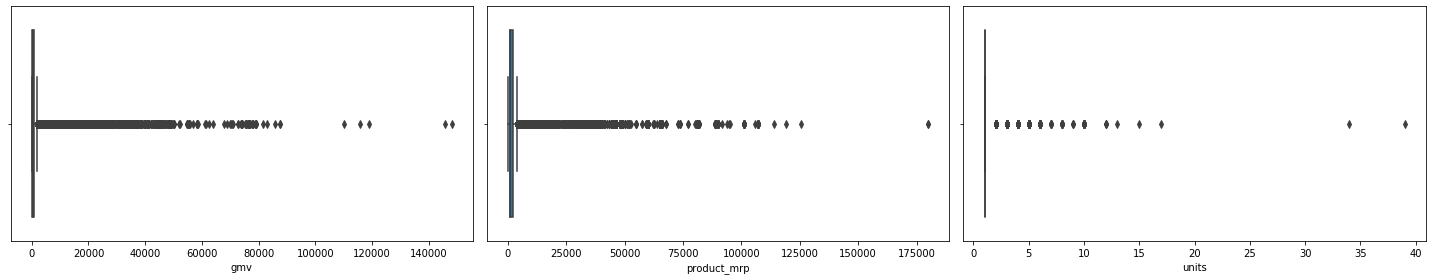

In [ ]:

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()


In [ ]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = camera_df.gmv.quantile(0.25)
Q3 = camera_df.gmv.quantile(0.75)
IQR = Q3 - Q1
camera_df = camera_df[(camera_df.gmv >= Q1 - 1.5*IQR) & (camera_df.gmv <= Q3 + 1.5*IQR)]
Q1 = camera_df.product_mrp.quantile(0.25)
Q3 = camera_df.product_mrp.quantile(0.75)
IQR = Q3 - Q1
camera_df = camera_df[(camera_df.product_mrp >= Q1 - 1.5*IQR) & (camera_df.product_mrp <= Q3 + 1.5*IQR)]

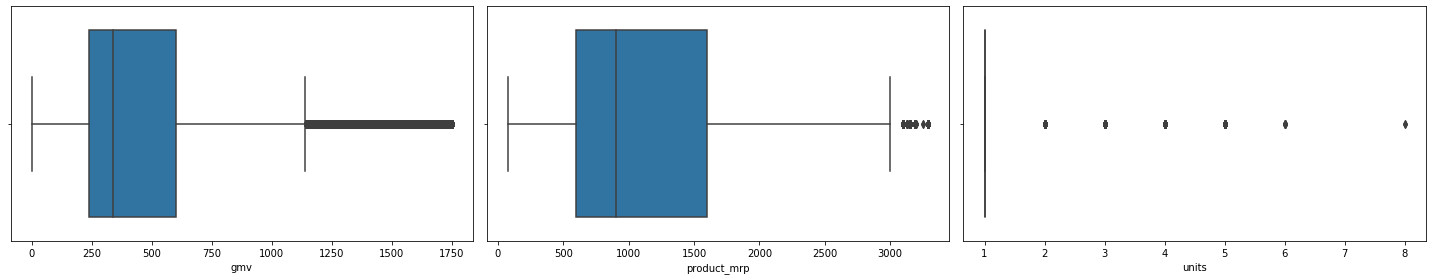

In [ ]:
#Plotting again

fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(camera_df['gmv'], ax = axs[0])
plt2 = sns.boxplot(camera_df['units'], ax = axs[2])
plt4 = sns.boxplot(camera_df['product_mrp'], ax = axs[1])
plt.tight_layout()

In [ ]:
camera_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [ ]:
camera_df.head()

fsn_id          order_date  Year  Month  \
3   ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10   
4   ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10   
16  ACCD38YG3UDFDG6D 2015-10-06 00:45:01  2015     10   
17  ACCD38YG3UDFDG6D 2015-10-12 23:38:46  2015     10   
18  ACCD38YG3UDFDG6D 2015-10-14 10:09:46  2015     10   

                   order_id            order_item_id      gmv  units  \
3  4,416,592,101,738,400.00 4,416,592,101,738,400.00 1,690.00      1   
4  4,419,525,153,426,400.00 4,419,525,153,426,400.00 1,618.00      1   
16 2,409,274,855,504,000.00 2,409,274,855,504,000.00 1,495.00      1   
17 4,415,284,052,002,400.00 4,415,284,052,002,400.00 1,440.00      1   
18 1,416,516,698,047,300.00 1,416,516,698,047,300.00 1,440.00      1   

    order_payment_type  sla product_analytic_category  \
3                    1    4           CameraAccessory   
4                    1    6           CameraAccessory   
16                   0    5           CameraAccessory   
17                   0    5           CameraAccessory   
18                   0    4           CameraAccessory   

   product_analytic_sub_category  product_mrp  product_procurement_sla  \
3                CameraAccessory     2,099.00                        3   
4                CameraAccessory     2,099.00                        3   
16               CameraAccessory     2,750.00                        1   
17               CameraAccessory     2,750.00                        1   
18               CameraAccessory     2,750.00                        1   

    listing_price  discount  Order_Item_Value  week  premium_product  
3        1,690.00      0.19          2,099.00    16                0  
4        1,618.00      0.23          2,099.00    16                0  
16       1,495.00      0.46          2,750.00    15                0  
17       1,440.00      0.48          2,750.00    16                0  
18       1,440.00      0.48          2,750.00    16                0

In [ ]:
### Aggregating dataset on weekly level

ca_week = pd.DataFrame(camera_df.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum',
                                                            'premium_product':'sum'}))

ca_week.reset_index( inplace = True)

In [ ]:
ca_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    11,151.00         428.88     1,121.04      0.49 3.08   
1     2 1,228,580.00         501.23     1,013.38      0.45 7.05   
2     3 1,344,416.00         512.76     1,096.77      0.46 6.51   
3     4 1,346,986.00         511.97     1,086.32      0.45 6.55   
4     5   913,445.00         522.84     1,085.85      0.44 6.50   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                     2.73      20          26.00     26.00   
1                     2.57     540       2,390.00  2,345.00   
2                     2.57     538       2,570.00  2,539.00   
3                     2.61     529       2,571.00  2,534.00   
4                     2.61     442       1,703.00  1,675.00   

   order_payment_type  premium_product  
0                  26                0  
1                 753                0  
2                 823                0  
3                 781                0  
4                 470                0

In [ ]:
### Sum of GMV / No of unique Orders

ca_week['AOV'] = ca_week['gmv']/ca_week['order_id']

In [ ]:
ca_week['online_order_perc'] = ca_week['order_payment_type']*100/ca_week['order_item_id']

In [ ]:
ca_week.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53], dtype=int64)

In [ ]:
calendar.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [ ]:
ca_week['week'] = ca_week['week'].astype(int)
calendar['week'] = calendar['week'].astype(int)

In [ ]:
ca_week = ca_week.merge(marketing, how = 'left', on = 'week')

In [ ]:
ca_week = ca_week.merge(calendar, how = 'left', on = 'week')

In [ ]:
ca_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    11,151.00         428.88     1,121.04      0.49 3.08   
1     2 1,228,580.00         501.23     1,013.38      0.45 7.05   
2     3 1,344,416.00         512.76     1,096.77      0.46 6.51   
3     4 1,346,986.00         511.97     1,086.32      0.45 6.55   
4     5   913,445.00         522.84     1,085.85      0.44 6.50   

   product_procurement_sla  fsn_id  order_item_id  order_id  ...  Payday  \
0                     2.73      20          26.00     26.00  ...    0.20   
1                     2.57     540       2,390.00  2,345.00  ...    0.00   
2                     2.57     538       2,570.00  2,539.00  ...    0.14   
3                     2.61     529       2,571.00  2,534.00  ...    0.00   
4                     2.61     442       1,703.00  1,675.00  ...    0.14   

   max_temp_C  min_temp_C  mean_temp_C heat_deg_days  cool_deg_days  \
0       25.50       13.20        19.36          0.10           1.46   
1       24.03       14.39        19.26          1.06           2.32   
2       27.38       16.31        21.91          0.82           4.72   
3       28.24       14.34        20.54          1.63           4.17   
4       29.81       16.24        23.09          0.82           5.91   

   total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  
0           0.00           0.00             0.00             0.00  
1           4.15           0.03             4.18             0.04  
2           1.57           0.03             1.60             0.04  
3           1.14           0.03             1.17             0.04  
4           4.34           0.03             4.37             0.04  

[5 rows x 49 columns]

# Exploratory Data Analysis¶


In [ ]:
ca_week_viz = ca_week.round(2)


#Univariate Analysis


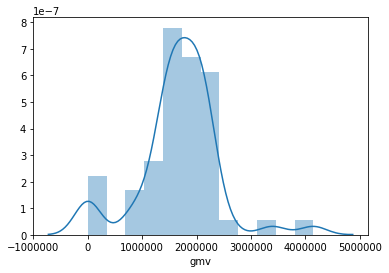

In [ ]:
sns.distplot(ca_week_viz['gmv'],kde=True)

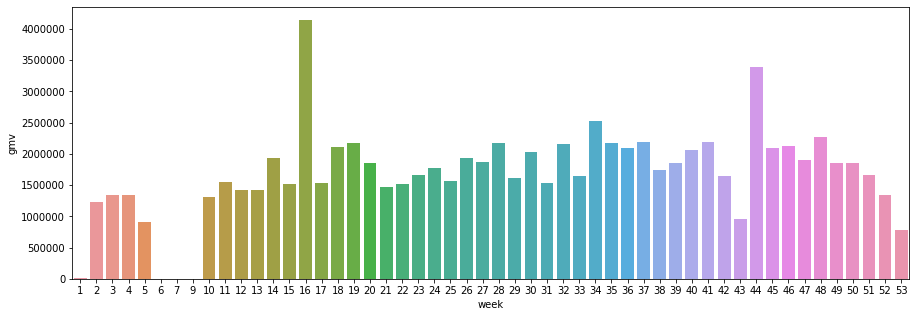

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(ca_week_viz['week'],ca_week_viz['gmv'])

#Marketing KPI


In [ ]:
ca_week_viz.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'order_payment_type', 'premium_product', 'AOV', 'online_order_perc',
       'Date', 'Year', 'Month', 'Total_Investment', 'TV', 'Digital',
       'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'max_temp_C', 'min_temp_C', 'mean_temp_C',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'total_precip_mm', 'snow_on_grnd_cm'],
      dtype='object')

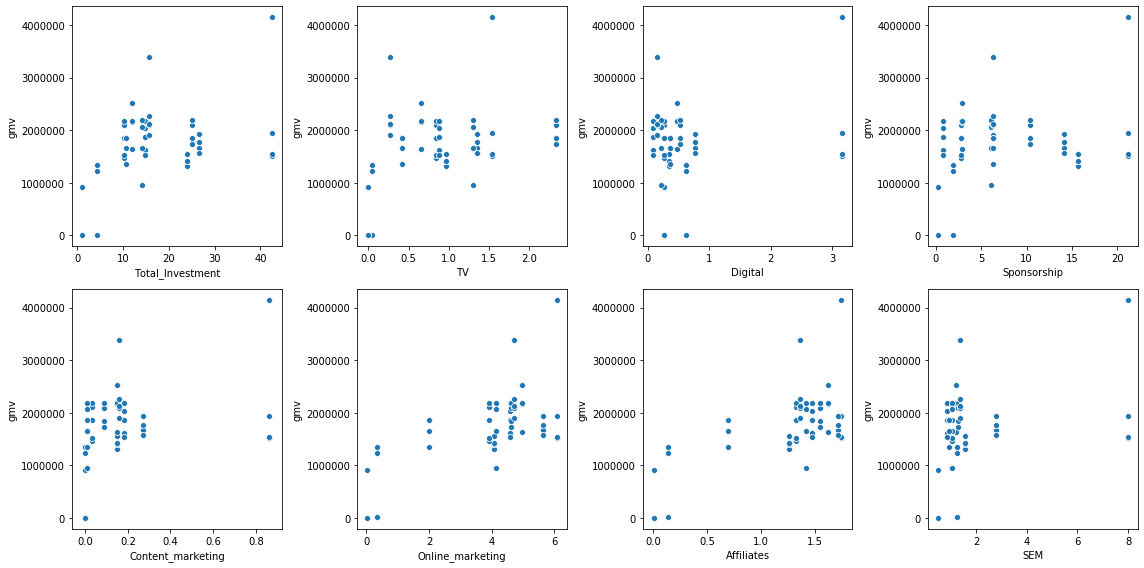

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.scatterplot(x = 'Total_Investment', y = 'gmv', data = ca_week_viz, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'TV', y = 'gmv', data = ca_week_viz, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'Digital', y = 'gmv', data = ca_week_viz, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'Sponsorship', y = 'gmv', data = ca_week_viz, ax = axs[0,3])

plt5 = sns.scatterplot(x = 'Content_marketing', y = 'gmv', data = ca_week_viz, ax = axs[1,0])

plt6 = sns.scatterplot(x = 'Online_marketing', y = 'gmv', data = ca_week_viz, ax = axs[1,1])

plt7 = sns.scatterplot(x = 'Affiliates', y = 'gmv', data = ca_week_viz, ax = axs[1,2])

plt8 = sns.scatterplot(x = 'SEM', y = 'gmv', data = ca_week_viz, ax = axs[1,3])

plt.tight_layout()

#Bivariate Analysis

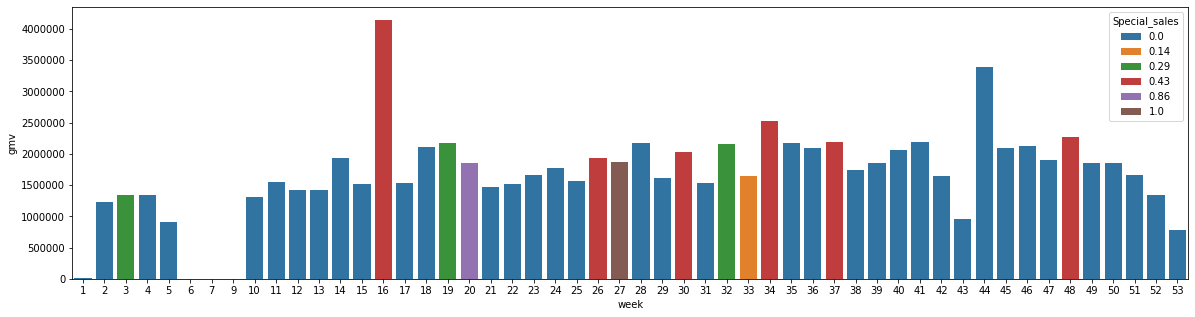

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ca_week_viz['week'], y =ca_week_viz['gmv'], hue = ca_week_viz['Special_sales'], dodge = False)
plt.show()

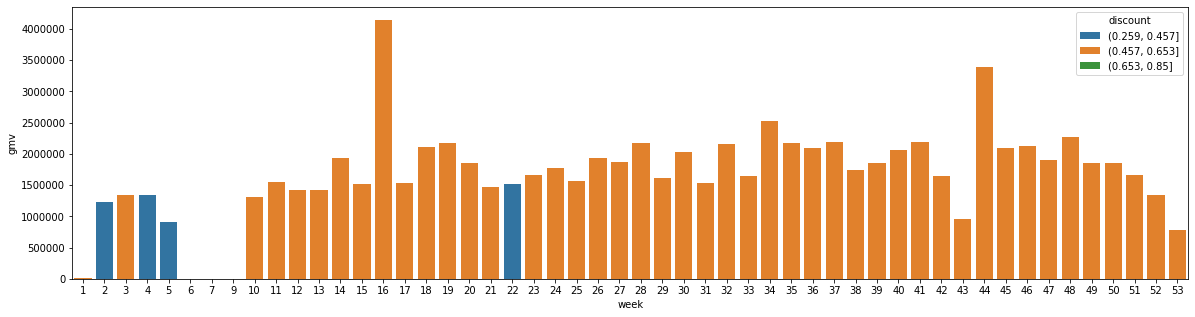

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ca_week_viz['week'], y =ca_week_viz['gmv'], hue = pd.cut(ca_week_viz['discount'],3), dodge = False)
plt.show()

Camera Accessory - Moving Average

In [ ]:
### ca_week

### Moving Average for listing_price and discount

### ca_week = ca_week.sort_values('order_date')

ca_week[['MA2_LP','MA2_Discount']] = ca_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ca_week[['MA3_LP','MA3_Discount']] = ca_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ca_week[['MA4_LP','MA4_Discount']] = ca_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

### Reference listed price Inflation 

ca_week['MA2_listed_price'] = (ca_week['listing_price']-ca_week['MA2_LP'])/ca_week['MA2_LP']
ca_week['MA3_listed_price'] = (ca_week['listing_price']-ca_week['MA3_LP'])/ca_week['MA3_LP']
ca_week['MA4_listed_price'] = (ca_week['listing_price']-ca_week['MA4_LP'])/ca_week['MA4_LP']

### Reference discount Inflation

ca_week['MA2_discount_offer'] = (ca_week['discount']-ca_week['MA2_Discount'])/ca_week['MA2_Discount']
ca_week['MA3_discount_offer'] = (ca_week['discount']-ca_week['MA3_Discount'])/ca_week['MA3_Discount']
ca_week['MA4_discount_offer'] = (ca_week['discount']-ca_week['MA4_Discount'])/ca_week['MA4_Discount']


ca_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
ca_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    11,151.00         428.88     1,121.04      0.49 3.08   
1     2 1,228,580.00         501.23     1,013.38      0.45 7.05   
2     3 1,344,416.00         512.76     1,096.77      0.46 6.51   
3     4 1,346,986.00         511.97     1,086.32      0.45 6.55   
4     5   913,445.00         522.84     1,085.85      0.44 6.50   

   product_procurement_sla  fsn_id  order_item_id  order_id  ...  \
0                     2.73      20          26.00     26.00  ...   
1                     2.57     540       2,390.00  2,345.00  ...   
2                     2.57     538       2,570.00  2,539.00  ...   
3                     2.61     529       2,571.00  2,534.00  ...   
4                     2.61     442       1,703.00  1,675.00  ...   

   total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  \
0           0.00           0.00             0.00             0.00   
1           4.15           0.03             4.18             0.04   
2           1.57           0.03             1.60             0.04   
3           1.14           0.03             1.17             0.04   
4           4.34           0.03             4.37             0.04   

  MA2_listed_price  MA3_listed_price  MA4_listed_price  MA2_discount_offer  \
0             0.00              0.00              0.00                0.00   
1             0.08              0.08              0.08               -0.05   
2             0.01              0.07              0.07                0.01   
3            -0.00              0.01              0.05               -0.01   
4             0.01              0.01              0.02               -0.00   

   MA3_discount_offer  MA4_discount_offer  
0                0.00                0.00  
1               -0.05               -0.05  
2               -0.02               -0.02  
3               -0.01               -0.03  
4               -0.01               -0.01  

[5 rows x 55 columns]

#Camera Accessory - Data Profiling to see multicollinearity and variable distributions

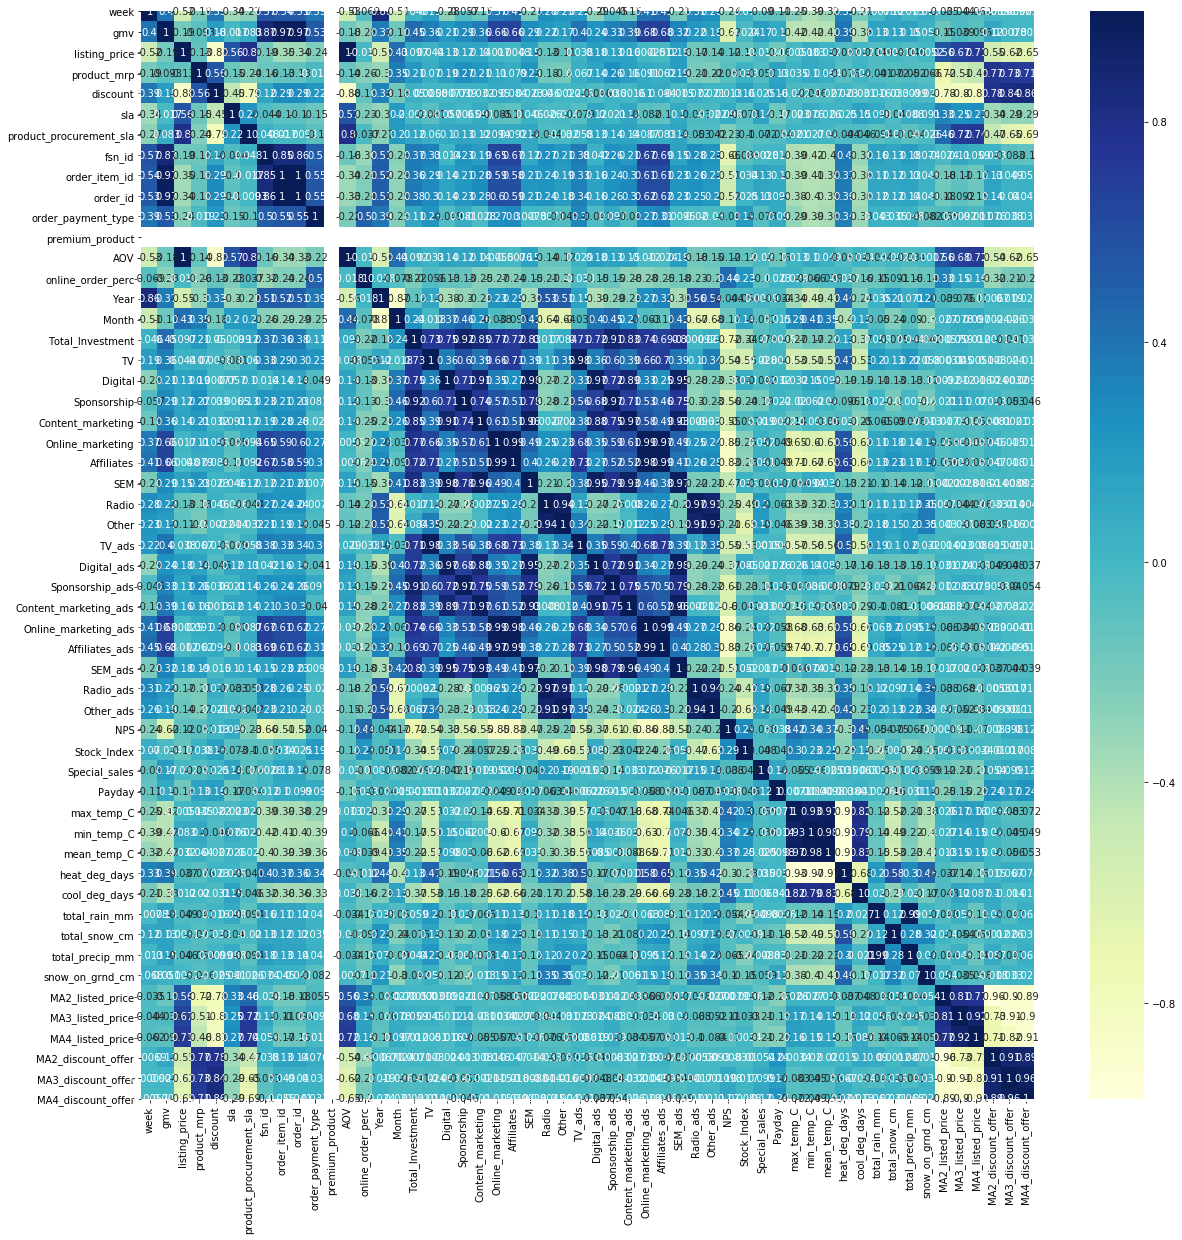

In [ ]:
# ### To identify multicollinearity between variable
plt.figure(figsize=(20,20))
sns.heatmap(ca_week.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [ ]:

## Highly Correlated Columns should be dropped

ca_week.drop(['TV', 'Digital', 'Sponsorship', 'Content_marketing','Online_marketing', 'Affiliates', 'SEM','Radio',
              'Other'], axis = 1, inplace = True)



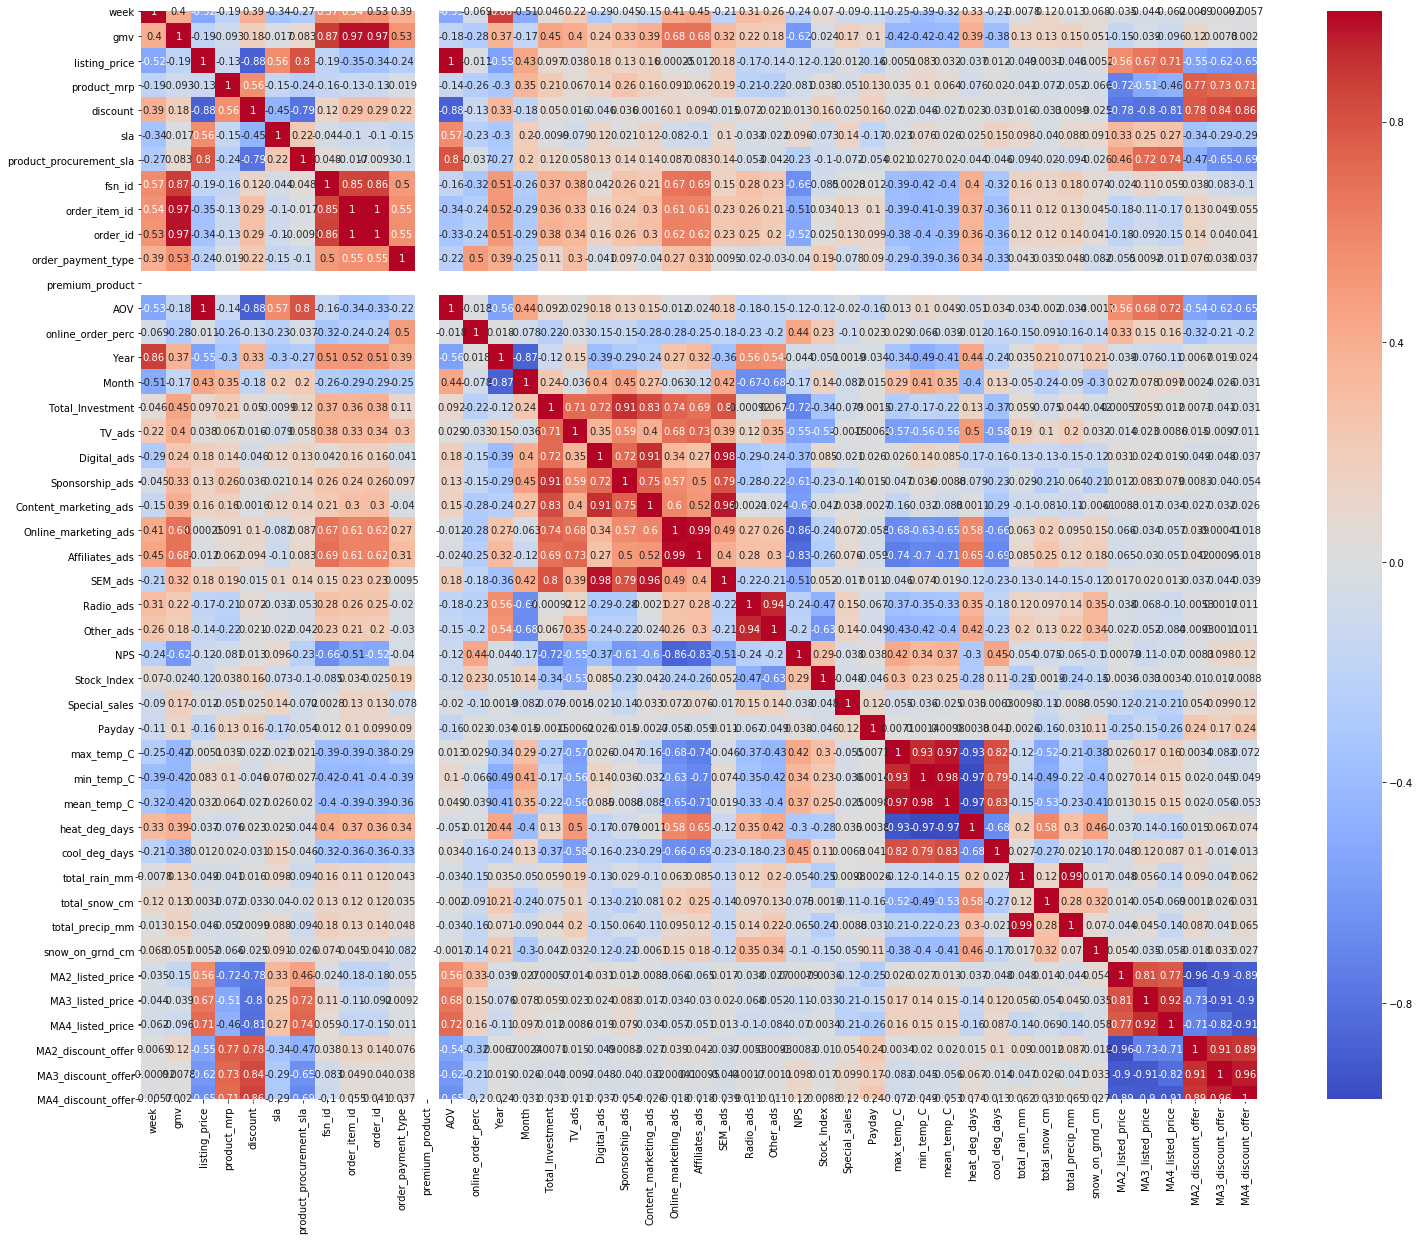

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(ca_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [ ]:
ca_week.drop(['Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','mean_temp_C','min_temp_C',
              'order_id','order_item_id','total_precip_mm','Total_Investment','MA3_discount_offer',
               'MA3_listed_price','AOV','max_temp_C','MA2_listed_price','MA4_discount_offer'],1,inplace=True)



In [ ]:
#Successfully removed more than 90% correlation

    Camera Accessory - Lag Variable Functions

In [ ]:
### Lag of listed_price, discount_offer, NPS, Special_sales

ca_week['lag_1_listed_price'] = ca_week['listing_price'].shift(-1).fillna(0)
ca_week['lag_2_listed_price'] = ca_week['listing_price'].shift(-2).fillna(0)
ca_week['lag_3_listed_price'] = ca_week['listing_price'].shift(-3).fillna(0)

ca_week['lag_1_discount'] = ca_week['discount'].shift(-1).fillna(0)
ca_week['lag_2_discount'] = ca_week['discount'].shift(-2).fillna(0)
ca_week['lag_3_discount'] = ca_week['discount'].shift(-3).fillna(0)

ca_week['lag_1_Stock_Index'] = ca_week['Stock_Index'].shift(-1).fillna(0)
ca_week['lag_2_Stock_Index'] = ca_week['Stock_Index'].shift(-2).fillna(0)
ca_week['lag_3_Stock_Index'] = ca_week['Stock_Index'].shift(-3).fillna(0)

ca_week['lag_1_Special_sales'] = ca_week['Special_sales'].shift(-1).fillna(0)
ca_week['lag_2_Special_sales'] = ca_week['Special_sales'].shift(-2).fillna(0)
ca_week['lag_3_Special_sales'] = ca_week['Special_sales'].shift(-3).fillna(0)

ca_week['lag_1_Payday'] = ca_week['Payday'].shift(-1).fillna(0)
ca_week['lag_2_Payday'] = ca_week['Payday'].shift(-2).fillna(0)
ca_week['lag_3_Payday'] = ca_week['Payday'].shift(-3).fillna(0)

ca_week['lag_1_NPS'] = ca_week['NPS'].shift(-1).fillna(0)
ca_week['lag_2_NPS'] = ca_week['NPS'].shift(-2).fillna(0)
ca_week['lag_3_NPS'] = ca_week['NPS'].shift(-3).fillna(0)

In [ ]:
ca_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    11,151.00         428.88     1,121.04      0.49 3.08   
1     2 1,228,580.00         501.23     1,013.38      0.45 7.05   
2     3 1,344,416.00         512.76     1,096.77      0.46 6.51   
3     4 1,346,986.00         511.97     1,086.32      0.45 6.55   
4     5   913,445.00         522.84     1,085.85      0.44 6.50   

   product_procurement_sla  fsn_id  order_payment_type  premium_product  ...  \
0                     2.73      20                  26                0  ...   
1                     2.57     540                 753                0  ...   
2                     2.57     538                 823                0  ...   
3                     2.61     529                 781                0  ...   
4                     2.61     442                 470                0  ...   

   lag_3_Stock_Index lag_1_Special_sales  lag_2_Special_sales  \
0           1,177.00                0.00                 0.29   
1           1,185.29                0.29                 0.00   
2           1,206.00                0.00                 0.00   
3           1,206.00                0.00                 0.00   
4           1,206.00                0.00                 0.29   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_NPS  \
0                 0.00          0.00          0.14          0.00      54.60   
1                 0.00          0.14          0.00          0.14      54.60   
2                 0.00          0.00          0.14          0.00      54.60   
3                 0.29          0.14          0.00          0.14      56.14   
4                 0.43          0.00          0.14          0.00      59.99   

   lag_2_NPS  lag_3_NPS  
0      54.60      54.60  
1      54.60      56.14  
2      56.14      59.99  
3      59.99      59.99  
4      59.99      59.99  

[5 rows x 47 columns]

## Gaming Sub Category

In [ ]:
gaming_accessory = df[df['product_analytic_sub_category'] == 'GamingAccessory']

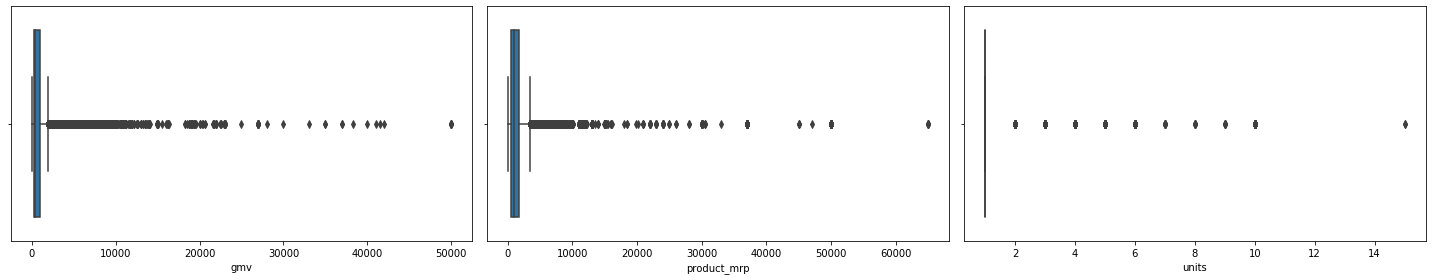

In [ ]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()

In [ ]:
### Outlier treatment for gmv & product_mrp
Q1 = gaming_accessory.gmv.quantile(0.25)
Q3 = gaming_accessory.gmv.quantile(0.75)
IQR = Q3 - Q1
gaming_accessory = gaming_accessory[(gaming_accessory.gmv >= Q1 - 1.5*IQR) & (gaming_accessory.gmv <= Q3 + 1.5*IQR)]
Q1 = gaming_accessory.product_mrp.quantile(0.25)
Q3 = gaming_accessory.product_mrp.quantile(0.75)
IQR = Q3 - Q1
gaming_accessory = gaming_accessory[(gaming_accessory.product_mrp >= Q1 - 1.5*IQR) & (gaming_accessory.product_mrp <= Q3 + 1.5*IQR)]

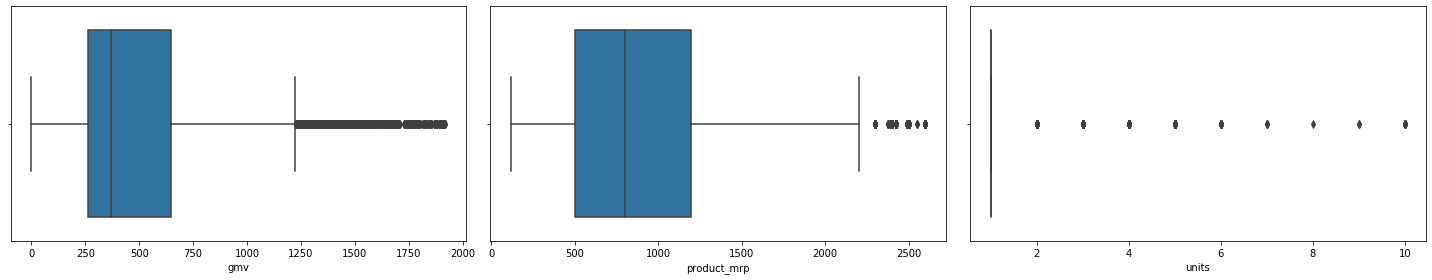

In [ ]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(gaming_accessory['gmv'], ax = axs[0])
plt2 = sns.boxplot(gaming_accessory['units'], ax = axs[2])
plt4 = sns.boxplot(gaming_accessory['product_mrp'], ax = axs[1])
plt.tight_layout()

In [ ]:
gaming_accessory.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [ ]:
### Aggregating dataset on weekly level

ga_week = pd.DataFrame(gaming_accessory.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ga_week.reset_index( inplace = True)

In [ ]:
ga_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    17,466.00         681.08       898.44      0.22 3.64   
1     2 1,435,300.00         528.93       963.91      0.41 5.21   
2     3 1,097,388.36         449.83       759.69      0.43 5.17   
3     4 1,158,166.00         559.13       889.06      0.35 5.23   
4     5   742,062.00         554.21       886.08      0.36 5.58   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                     2.64      19          25.00     25.00   
1                     3.07     211       2,629.00  2,494.00   
2                     2.59     216       2,382.00  2,356.00   
3                     2.45     232       2,023.00  1,990.00   
4                     2.42     224       1,303.00  1,287.00   

   order_payment_type  
0                  25  
1                 689  
2                 534  
3                 425  
4                 246

In [ ]:
### Sum of GMV / No of unique Orders

ga_week['AOV'] = ga_week['gmv']/ga_week['order_id']

In [ ]:
ga_week['online_order_perc'] = ga_week['order_payment_type']*100/ga_week['order_item_id']

In [ ]:
ga_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    17,466.00         681.08       898.44      0.22 3.64   
1     2 1,435,300.00         528.93       963.91      0.41 5.21   
2     3 1,097,388.36         449.83       759.69      0.43 5.17   
3     4 1,158,166.00         559.13       889.06      0.35 5.23   
4     5   742,062.00         554.21       886.08      0.36 5.58   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                     2.64      19          25.00     25.00   
1                     3.07     211       2,629.00  2,494.00   
2                     2.59     216       2,382.00  2,356.00   
3                     2.45     232       2,023.00  1,990.00   
4                     2.42     224       1,303.00  1,287.00   

   order_payment_type    AOV  online_order_perc  
0                  25 698.64             100.00  
1                 689 575.50              26.21  
2                 534 465.78              22.42  
3                 425 581.99              21.01  
4                 246 576.58              18.88

In [ ]:
ga_week = ga_week.merge(marketing, how = 'left', on = 'week')

In [ ]:
ga_week = ga_week.merge(calendar, how = 'left', on = 'week')

In [ ]:
ga_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    17,466.00         681.08       898.44      0.22 3.64   
1     2 1,435,300.00         528.93       963.91      0.41 5.21   
2     3 1,097,388.36         449.83       759.69      0.43 5.17   
3     4 1,158,166.00         559.13       889.06      0.35 5.23   
4     5   742,062.00         554.21       886.08      0.36 5.58   

   product_procurement_sla  fsn_id  order_item_id  order_id  ...  Payday  \
0                     2.64      19          25.00     25.00  ...    0.20   
1                     3.07     211       2,629.00  2,494.00  ...    0.00   
2                     2.59     216       2,382.00  2,356.00  ...    0.14   
3                     2.45     232       2,023.00  1,990.00  ...    0.00   
4                     2.42     224       1,303.00  1,287.00  ...    0.14   

   max_temp_C  min_temp_C mean_temp_C  heat_deg_days  cool_deg_days  \
0       25.50       13.20       19.36           0.10           1.46   
1       24.03       14.39       19.26           1.06           2.32   
2       27.38       16.31       21.91           0.82           4.72   
3       28.24       14.34       20.54           1.63           4.17   
4       29.81       16.24       23.09           0.82           5.91   

   total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  
0           0.00           0.00             0.00             0.00  
1           4.15           0.03             4.18             0.04  
2           1.57           0.03             1.60             0.04  
3           1.14           0.03             1.17             0.04  
4           4.34           0.03             4.37             0.04  

[5 rows x 48 columns]

Exploratory Data Analysis

In [ ]:
ga_week_viz = ga_week.round(2)

Univariate Analysis

Target Variable

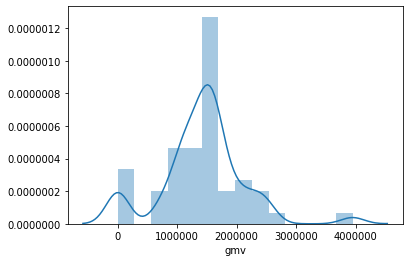

In [ ]:
sns.distplot(ga_week_viz['gmv'],kde=True)

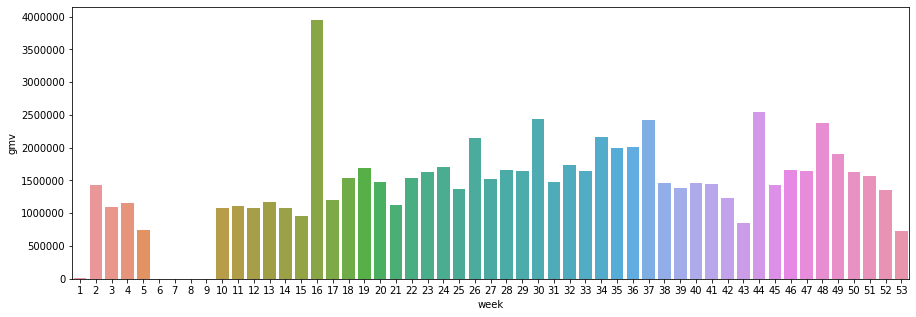

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(ga_week_viz['week'],ga_week_viz['gmv'])

Marketing KPI

In [ ]:
ga_week_viz.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'order_payment_type', 'AOV', 'online_order_perc', 'Date', 'Year',
       'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'max_temp_C', 'min_temp_C', 'mean_temp_C',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'total_precip_mm', 'snow_on_grnd_cm'],
      dtype='object')

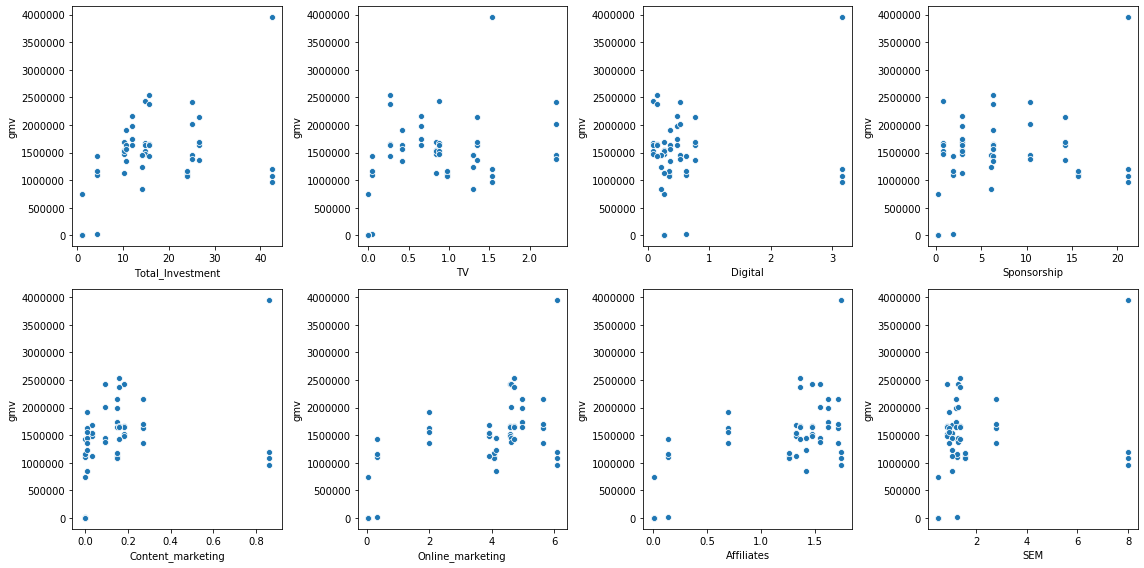

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.scatterplot(x = 'Total_Investment', y = 'gmv', data = ga_week_viz, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'TV', y = 'gmv', data = ga_week_viz, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'Digital', y = 'gmv', data = ga_week_viz, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'Sponsorship', y = 'gmv', data = ga_week_viz, ax = axs[0,3])

plt5 = sns.scatterplot(x = 'Content_marketing', y = 'gmv', data = ga_week_viz, ax = axs[1,0])

plt6 = sns.scatterplot(x = 'Online_marketing', y = 'gmv', data = ga_week_viz, ax = axs[1,1])

plt7 = sns.scatterplot(x = 'Affiliates', y = 'gmv', data = ga_week_viz, ax = axs[1,2])

plt8 = sns.scatterplot(x = 'SEM', y = 'gmv', data = ga_week_viz, ax = axs[1,3])

plt.tight_layout()

Bivariate Analysis

#GMV and Holiday weekly

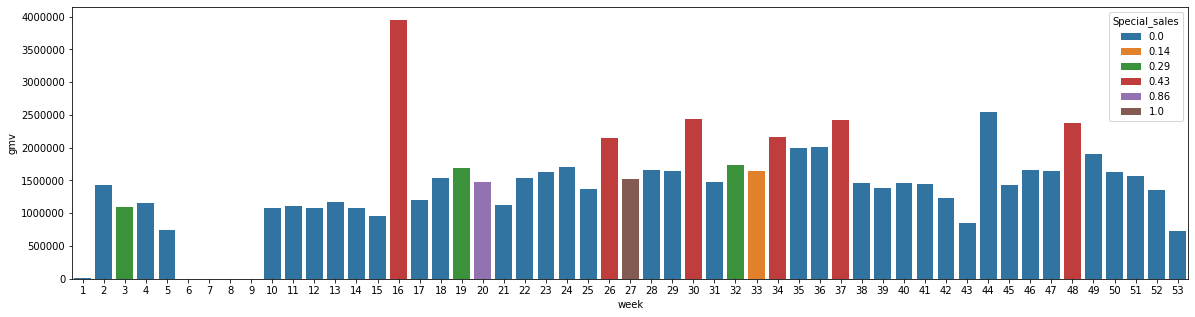

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ga_week_viz['week'], y =ga_week_viz['gmv'], hue = ga_week_viz['Special_sales'], dodge = False)
plt.show()

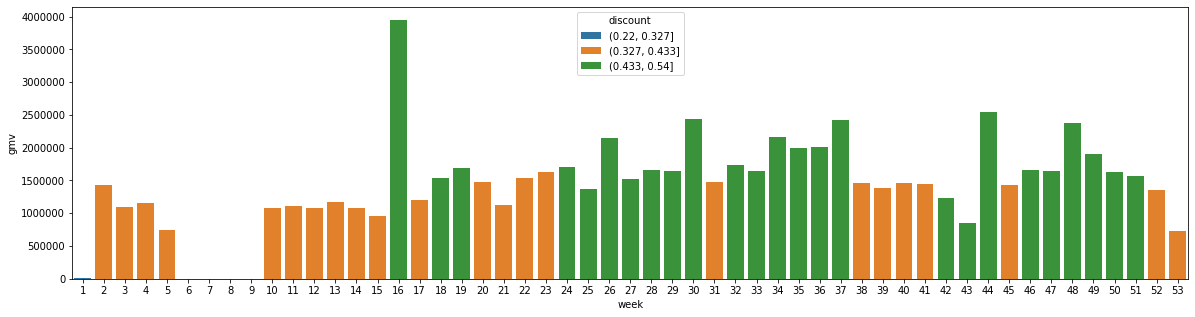

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x= ga_week_viz['week'], y =ga_week_viz['gmv'], hue = pd.cut(ga_week_viz['discount'],3), dodge = False)
plt.show()

#Gaming Accessory - Moving Average

In [ ]:
## ga_week

### Moving Average for listed_price and discount_offer

### ga_week = ga_week.sort_values('order_date')

ga_week[['MA2_LP','MA2_Discount']] = ga_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ga_week[['MA3_LP','MA3_Discount']] = ga_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ga_week[['MA4_LP','MA4_Discount']] = ga_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

### Reference listed price Inflation 

ga_week['MA2_listed_price'] = (ga_week['listing_price']-ga_week['MA2_LP'])/ga_week['MA2_LP']
ga_week['MA3_listed_price'] = (ga_week['listing_price']-ga_week['MA3_LP'])/ga_week['MA3_LP']
ga_week['MA4_listed_price'] = (ga_week['listing_price']-ga_week['MA4_LP'])/ga_week['MA4_LP']

### Reference discount Inflation

ga_week['MA2_discount'] = (ga_week['discount']-ga_week['MA2_Discount'])/ga_week['MA2_Discount']
ga_week['MA3_discount'] = (ga_week['discount']-ga_week['MA3_Discount'])/ga_week['MA3_Discount']
ga_week['MA4_discount'] = (ga_week['discount']-ga_week['MA4_Discount'])/ga_week['MA4_Discount']


ga_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
ga_week

week          gmv  listing_price  product_mrp  discount  sla  \
0      1    17,466.00         681.08       898.44      0.22 3.64   
1      2 1,435,300.00         528.93       963.91      0.41 5.21   
2      3 1,097,388.36         449.83       759.69      0.43 5.17   
3      4 1,158,166.00         559.13       889.06      0.35 5.23   
4      5   742,062.00         554.21       886.08      0.36 5.58   
5      6       391.00         195.50       362.00      0.54 4.50   
6      7     1,611.00         805.50     1,172.00      0.26 4.50   
7      8       359.00         359.00       699.00      0.49 3.00   
8      9     2,303.00         575.75     1,035.75      0.45 6.00   
9     10 1,084,240.50         464.00       746.37      0.38 5.11   
10    11 1,118,085.00         519.64       833.84      0.37 5.53   
11    12 1,080,541.25         514.87       846.02      0.38 5.88   
12    13 1,169,077.00         524.57       935.66      0.40 6.01   
13    14 1,079,536.00         511.79       869.86      0.39 5.85   
14    15   960,789.00         503.44       799.56      0.36 5.37   
15    16 3,949,922.38         425.89       857.21      0.49 5.29   
16    17 1,197,307.00         520.85       877.53      0.39 6.05   
17    18 1,544,330.50         468.72       852.42      0.44 5.80   
18    19 1,688,852.71         430.06       799.66      0.47 5.22   
19    20 1,481,034.00         477.78       837.98      0.42 6.09   
20    21 1,124,109.00         514.08       878.83      0.41 5.76   
21    22 1,535,170.00         476.33       854.82      0.43 5.86   
22    23 1,628,667.00         507.68       877.49      0.41 6.12   
23    24 1,698,717.25         469.35       894.70      0.46 5.76   
24    25 1,362,933.00         435.57       931.69      0.47 6.63   
25    26 2,147,340.00         457.55     1,097.24      0.51 5.90   
26    27 1,527,510.00         457.37     1,036.95      0.47 6.09   
27    28 1,665,891.00         447.72     1,015.42      0.47 6.03   
28    29 1,640,618.00         485.84       979.84      0.44 5.99   
29    30 2,432,792.04         535.98     1,017.08      0.45 6.05   
30    31 1,480,041.00         497.60       918.57      0.43 6.16   
31    32 1,739,754.50         478.74       903.73      0.45 5.96   
32    33 1,644,979.25         455.99       900.59      0.47 5.71   
33    34 2,160,427.58         427.20       879.70      0.50 5.53   
34    35 1,989,635.60         440.09       910.46      0.50 6.04   
35    36 2,013,127.75         449.22       910.21      0.49 5.83   
36    37 2,418,902.15         499.84     1,007.43      0.48 5.40   
37    38 1,458,031.50         506.39       904.74      0.41 5.85   
38    39 1,379,205.00         516.33       926.70      0.41 5.99   
39    40 1,455,026.50         518.13       942.84      0.42 5.88   
40    41 1,450,803.25         534.63       950.36      0.41 6.13   
41    42 1,237,020.00         512.63       948.60      0.44 5.92   
42    43   845,130.00         515.50       975.17      0.45 4.62   
43    44 2,540,675.00         488.76       943.02      0.45 6.37   
44    45 1,433,023.00         499.65       913.99      0.43 5.89   
45    46 1,659,558.00         459.01       899.33      0.48 5.75   
46    47 1,642,812.25         458.20       917.37      0.49 5.76   
47    48 2,377,061.33         533.67     1,086.19      0.48 5.46   
48    49 1,911,911.91         518.19     1,029.44      0.46 5.61   
49    50 1,632,179.00         506.61       997.58      0.46 5.73   
50    51 1,564,994.00         512.78       980.67      0.45 5.93   
51    52 1,351,971.25         524.18       959.32      0.42 5.90   
52    53   734,419.25         525.94       933.61      0.41 5.15   

    product_procurement_sla  fsn_id  order_item_id  order_id  ...  \
0                      2.64      19          25.00     25.00  ...   
1                      3.07     211       2,629.00  2,494.00  ...   
2                      2.59     216       2,382.00  2,356.00  ...   
3                      2.45     232       2,023.00  1,9

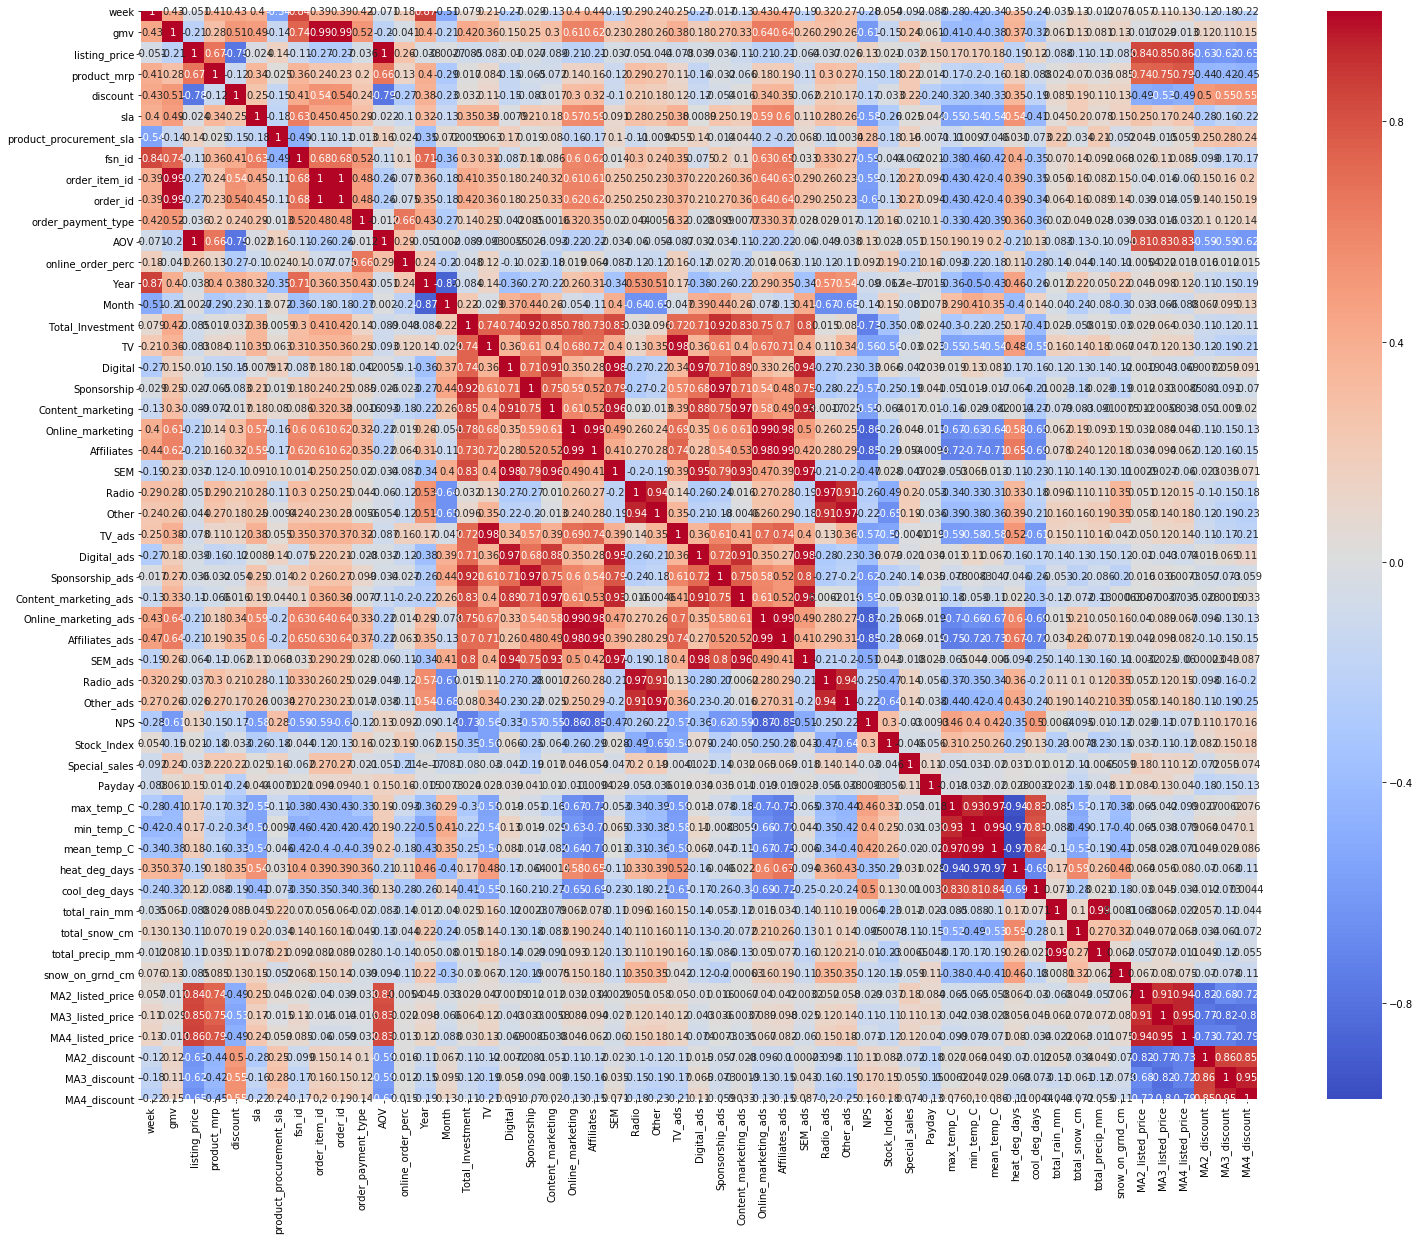

In [ ]:
#Heatmap to see multicollinearity
plt.figure(figsize=(25,20))

### Heatmap
sns.heatmap(ga_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [ ]:
ga_week.drop(['TV', 'Digital', 'Sponsorship', 'Content_marketing','Online_marketing', 'Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','mean_temp_C','min_temp_C',
              'order_id','order_item_id','total_precip_mm','Total_Investment','MA3_discount',
              'MA3_listed_price','AOV','MA4_listed_price'], axis = 1, inplace = True)

In [ ]:
ga_week.drop(['max_temp_C'], axis = 1, inplace = True)

In [ ]:

###  Successfully removed more than 90% highly correlated variables from dataset.

Gaming Accessory - Lag Variable Functions

In [ ]:
### Lag of listed_price, discount_offer, NPS, Special_sales

ga_week['lag_1_listed_price'] = ga_week['listing_price'].shift(-1).fillna(0)
ga_week['lag_2_listed_price'] = ga_week['listing_price'].shift(-2).fillna(0)
ga_week['lag_3_listed_price'] = ga_week['listing_price'].shift(-3).fillna(0)

ga_week['lag_1_discount_offer'] = ga_week['discount'].shift(-1).fillna(0)
ga_week['lag_2_discount_offer'] = ga_week['discount'].shift(-2).fillna(0)
ga_week['lag_3_discount_offer'] = ga_week['discount'].shift(-3).fillna(0)

ga_week['lag_1_NPS'] = ga_week['NPS'].shift(-1).fillna(0)
ga_week['lag_2_NPS'] = ga_week['NPS'].shift(-2).fillna(0)
ga_week['lag_3_NPS'] = ga_week['NPS'].shift(-3).fillna(0)

ga_week['lag_1_Stock_Index'] = ga_week['Stock_Index'].shift(-1).fillna(0)
ga_week['lag_2_Stock_Index'] = ga_week['Stock_Index'].shift(-2).fillna(0)
ga_week['lag_3_Stock_Index'] = ga_week['Stock_Index'].shift(-3).fillna(0)

ga_week['lag_1_Special_sales'] = ga_week['Special_sales'].shift(-1).fillna(0)
ga_week['lag_2_Special_sales'] = ga_week['Special_sales'].shift(-2).fillna(0)
ga_week['lag_3_Special_sales'] = ga_week['Special_sales'].shift(-3).fillna(0)

ga_week['lag_1_Payday'] = ga_week['Payday'].shift(-1).fillna(0)
ga_week['lag_2_Payday'] = ga_week['Payday'].shift(-2).fillna(0)
ga_week['lag_3_Payday'] = ga_week['Payday'].shift(-3).fillna(0)

In [ ]:
ga_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    17,466.00         681.08       898.44      0.22 3.64   
1     2 1,435,300.00         528.93       963.91      0.41 5.21   
2     3 1,097,388.36         449.83       759.69      0.43 5.17   
3     4 1,158,166.00         559.13       889.06      0.35 5.23   
4     5   742,062.00         554.21       886.08      0.36 5.58   

   product_procurement_sla  fsn_id  order_payment_type  online_order_perc  \
0                     2.64      19                  25             100.00   
1                     3.07     211                 689              26.21   
2                     2.59     216                 534              22.42   
3                     2.45     232                 425              21.01   
4                     2.42     224                 246              18.88   

   ... lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0  ...     54.60           1,177.00           1,177.00           1,177.00   
1  ...     56.14           1,177.00           1,177.00           1,185.29   
2  ...     59.99           1,177.00           1,185.29           1,206.00   
3  ...     59.99           1,185.29           1,206.00           1,206.00   
4  ...     59.99           1,206.00           1,206.00           1,206.00   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                 0.00                 0.29                 0.00   
1                 0.29                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.29   
4                 0.00                 0.29                 0.14   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  
0          0.00          0.14          0.00  
1          0.14          0.00          0.14  
2          0.00          0.14          0.00  
3          0.14          0.00          0.14  
4          0.00          0.14          0.00  

[5 rows x 47 columns]

## Home Audio Sub Category

In [ ]:
home_audio = df[df['product_analytic_sub_category'] == 'HomeAudio']

In [ ]:
###  Removing outliers is important as
###  1. There may be some garbage value.
###  2. Bulk orders can skew the analysis

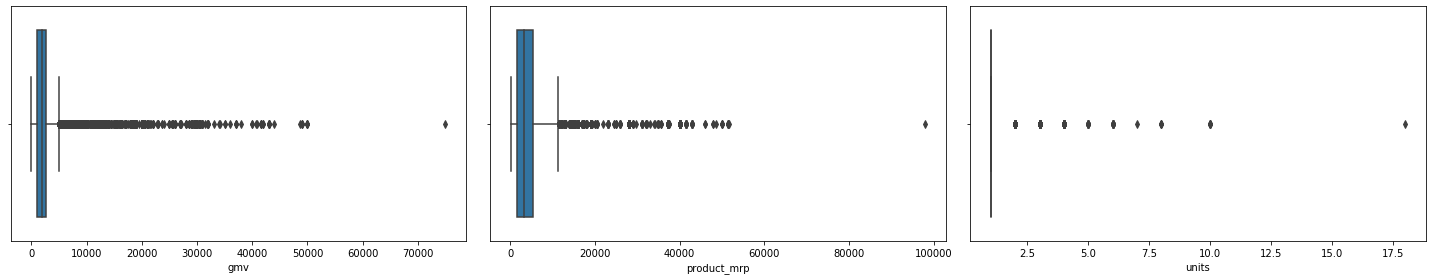

In [ ]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(home_audio['gmv'], ax = axs[0])
plt2 = sns.boxplot(home_audio['units'], ax = axs[2])
plt4 = sns.boxplot(home_audio['product_mrp'], ax = axs[1])
plt.tight_layout()

In [ ]:
### Treating outliers
### Outlier treatment for gmv & product_mrp
Q1 = home_audio.gmv.quantile(0.25)
Q3 = home_audio.gmv.quantile(0.75)
IQR = Q3 - Q1
home_audio = home_audio[(home_audio.gmv >= Q1 - 1.5*IQR) & (home_audio.gmv <= Q3 + 1.5*IQR)]
Q1 = home_audio.product_mrp.quantile(0.25)
Q3 = home_audio.product_mrp.quantile(0.75)
IQR = Q3 - Q1
home_audio = home_audio[(home_audio.product_mrp >= Q1 - 1.5*IQR) & (home_audio.product_mrp <= Q3 + 1.5*IQR)]

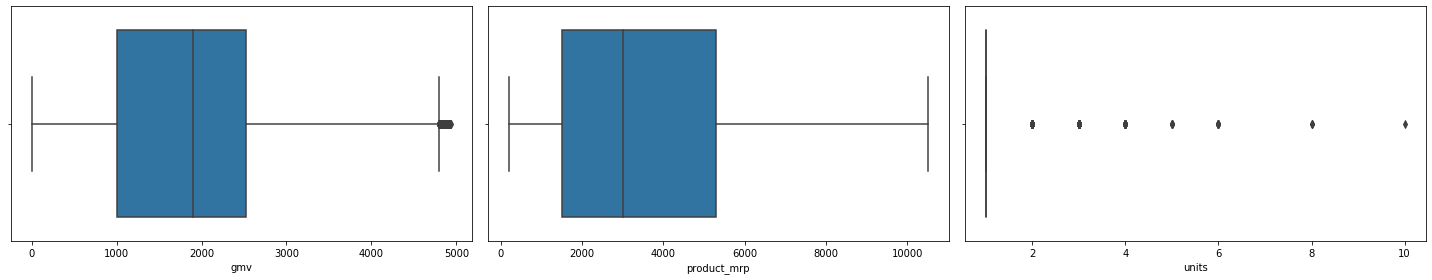

In [ ]:
### Outlier Analysis
fig, axs = plt.subplots(1,3, figsize = (20,4))
plt1 = sns.boxplot(home_audio['gmv'], ax = axs[0])
plt2 = sns.boxplot(home_audio['units'], ax = axs[2])
plt4 = sns.boxplot(home_audio['product_mrp'], ax = axs[1])
plt.tight_layout()

In [ ]:
home_audio.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_mrp', 'product_procurement_sla', 'listing_price', 'discount',
       'Order_Item_Value', 'week', 'premium_product'],
      dtype='object')

In [ ]:
### Aggregating dataset on weekly level

ha_week = pd.DataFrame(home_audio.groupby('week').agg({'gmv':'sum','listing_price':'mean',
                                                             'product_mrp':'mean','discount':'mean',
                                                             'sla':'mean','product_procurement_sla':'mean',
                                                             'fsn_id':pd.Series.nunique,'order_item_id':pd.Series.nunique,
                                                             'order_id': pd.Series.nunique,
                                                             'order_payment_type':'sum'}))

ha_week.reset_index( inplace = True)

In [ ]:
ha_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    83,742.00       2,392.63     4,369.06      0.40 3.60   
1     2 3,725,167.13       1,845.87     2,971.50      0.33 7.14   
2     3 4,344,419.00       1,855.96     3,121.88      0.34 6.91   
3     4 3,917,329.00       1,798.50     3,008.84      0.33 6.99   
4     5 2,812,144.00       1,853.24     3,094.75      0.33 7.09   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                     3.49      19          35.00     35.00   
1                     2.76     202       2,012.00  2,011.00   
2                     2.68     227       2,335.00  2,330.00   
3                     2.77     227       2,167.00  2,160.00   
4                     2.68     200       1,513.00  1,511.00   

   order_payment_type  
0                  34  
1                 464  
2                 527  
3                 450  
4                 327

In [ ]:
### Sum of GMV / No of unique Orders

ha_week['AOV'] = ha_week['gmv']/ha_week['order_id']

In [ ]:
ha_week['online_order_perc'] = ha_week['order_payment_type']*100/ha_week['order_item_id']

In [ ]:
ha_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    83,742.00       2,392.63     4,369.06      0.40 3.60   
1     2 3,725,167.13       1,845.87     2,971.50      0.33 7.14   
2     3 4,344,419.00       1,855.96     3,121.88      0.34 6.91   
3     4 3,917,329.00       1,798.50     3,008.84      0.33 6.99   
4     5 2,812,144.00       1,853.24     3,094.75      0.33 7.09   

   product_procurement_sla  fsn_id  order_item_id  order_id  \
0                     3.49      19          35.00     35.00   
1                     2.76     202       2,012.00  2,011.00   
2                     2.68     227       2,335.00  2,330.00   
3                     2.77     227       2,167.00  2,160.00   
4                     2.68     200       1,513.00  1,511.00   

   order_payment_type      AOV  online_order_perc  
0                  34 2,392.63              97.14  
1                 464 1,852.40              23.06  
2                 527 1,864.56              22.57  
3                 450 1,813.58              20.77  
4                 327 1,861.11              21.61

In [ ]:
ha_week = ha_week.merge(marketing, how = 'left', on = 'week')

In [ ]:
ha_week = ha_week.merge(calendar, how = 'left', on = 'week')

In [ ]:
ha_week.head()

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    83,742.00       2,392.63     4,369.06      0.40 3.60   
1     2 3,725,167.13       1,845.87     2,971.50      0.33 7.14   
2     3 4,344,419.00       1,855.96     3,121.88      0.34 6.91   
3     4 3,917,329.00       1,798.50     3,008.84      0.33 6.99   
4     5 2,812,144.00       1,853.24     3,094.75      0.33 7.09   

   product_procurement_sla  fsn_id  order_item_id  order_id  ...  Payday  \
0                     3.49      19          35.00     35.00  ...    0.20   
1                     2.76     202       2,012.00  2,011.00  ...    0.00   
2                     2.68     227       2,335.00  2,330.00  ...    0.14   
3                     2.77     227       2,167.00  2,160.00  ...    0.00   
4                     2.68     200       1,513.00  1,511.00  ...    0.14   

   max_temp_C  min_temp_C mean_temp_C  heat_deg_days  cool_deg_days  \
0       25.50       13.20       19.36           0.10           1.46   
1       24.03       14.39       19.26           1.06           2.32   
2       27.38       16.31       21.91           0.82           4.72   
3       28.24       14.34       20.54           1.63           4.17   
4       29.81       16.24       23.09           0.82           5.91   

   total_rain_mm  total_snow_cm  total_precip_mm  snow_on_grnd_cm  
0           0.00           0.00             0.00             0.00  
1           4.15           0.03             4.18             0.04  
2           1.57           0.03             1.60             0.04  
3           1.14           0.03             1.17             0.04  
4           4.34           0.03             4.37             0.04  

[5 rows x 48 columns]

Exploratory Data Analysi

In [ ]:
ha_week_viz = ha_week.round(2)

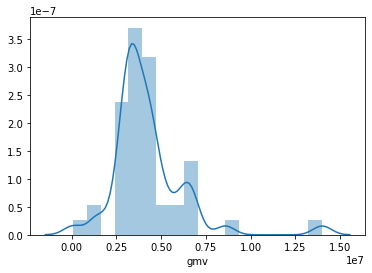

In [ ]:
#Univariate Analysis

sns.distplot(ha_week_viz['gmv'],kde=True)

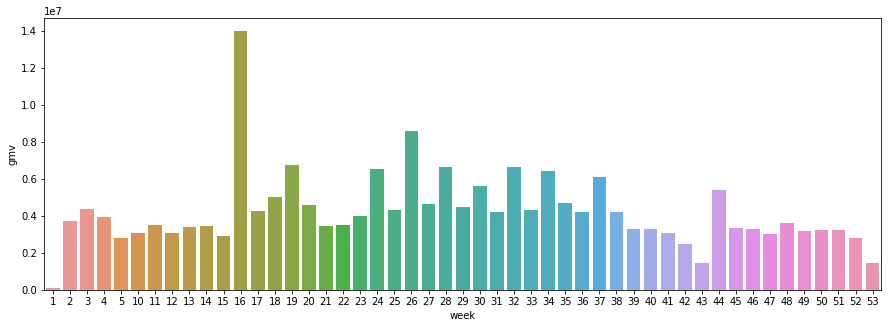

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(ha_week_viz['week'],ha_week_viz['gmv'])

In [ ]:
ha_week_viz.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_item_id', 'order_id',
       'order_payment_type', 'AOV', 'online_order_perc', 'Date', 'Year',
       'Month', 'Total_Investment', 'TV', 'Digital', 'Sponsorship',
       'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'TV_ads', 'Digital_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'Affiliates_ads',
       'SEM_ads', 'Radio_ads', 'Other_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'max_temp_C', 'min_temp_C', 'mean_temp_C',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'total_precip_mm', 'snow_on_grnd_cm'],
      dtype='object')

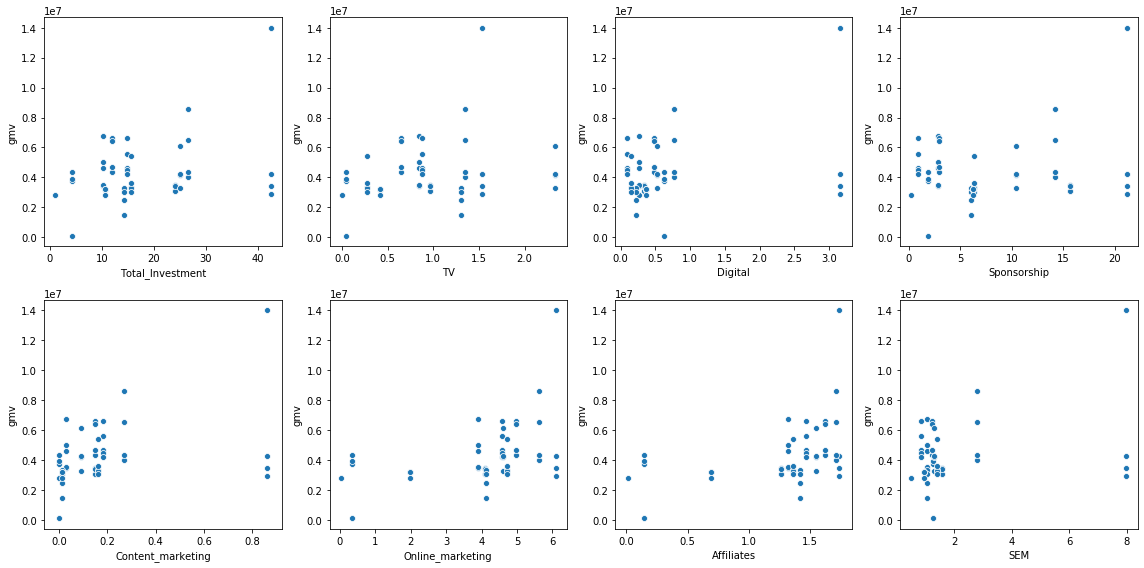

In [ ]:
fig, axs = plt.subplots(2,4,figsize=(16,8))

plt1 = sns.scatterplot(x = 'Total_Investment', y = 'gmv', data = ha_week_viz, ax = axs[0,0])

plt2 = sns.scatterplot(x = 'TV', y = 'gmv', data = ha_week_viz, ax = axs[0,1])

plt3 = sns.scatterplot(x = 'Digital', y = 'gmv', data = ha_week_viz, ax = axs[0,2])

plt4 = sns.scatterplot(x = 'Sponsorship', y = 'gmv', data = ha_week_viz, ax = axs[0,3])

plt5 = sns.scatterplot(x = 'Content_marketing', y = 'gmv', data = ha_week_viz, ax = axs[1,0])

plt6 = sns.scatterplot(x = 'Online_marketing', y = 'gmv', data = ha_week_viz, ax = axs[1,1])

plt7 = sns.scatterplot(x = 'Affiliates', y = 'gmv', data = ha_week_viz, ax = axs[1,2])

plt8 = sns.scatterplot(x = 'SEM', y = 'gmv', data = ha_week_viz, ax = axs[1,3])

plt.tight_layout()

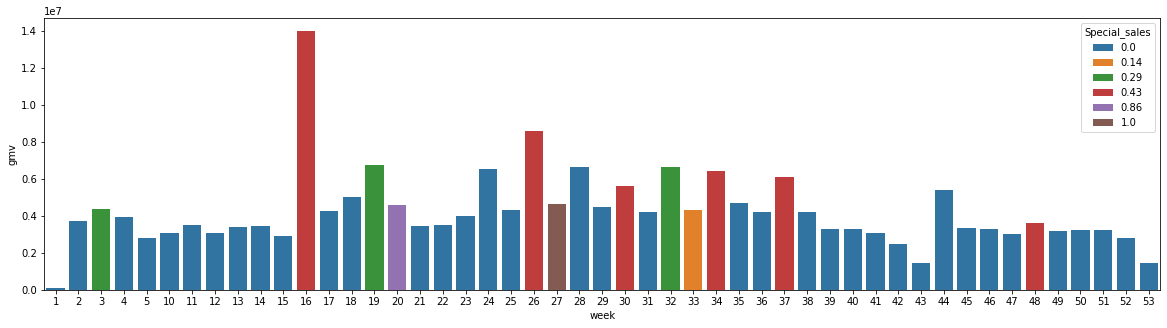

In [ ]:
#Bivariate Analysis

#GMV and Holiday weekly

plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = ha_week_viz['Special_sales'], dodge = False)
plt.show()

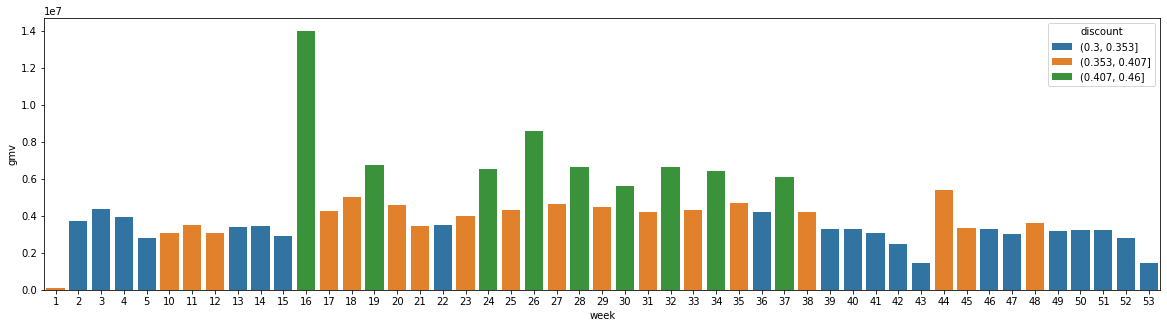

In [ ]:
#GMV and discount weekly
plt.figure(figsize=(20, 5))
sns.barplot(x= ha_week_viz['week'], y =ha_week_viz['gmv'], hue = pd.cut(ha_week_viz['discount'],3), dodge = False)
plt.show()

In [ ]:
#Home Audio - Moving Average

### ha_week

### Moving Average for listed_price and discount_offer

### ha_week = ha_week.sort_values('order_date')

ha_week[['MA2_LP','MA2_Discount']] = ha_week[['listing_price','discount']].rolling(window=2,min_periods=1).mean()
ha_week[['MA3_LP','MA3_Discount']] = ha_week[['listing_price','discount']].rolling(window=3,min_periods=1).mean()
ha_week[['MA4_LP','MA4_Discount']] = ha_week[['listing_price','discount']].rolling(window=4,min_periods=1).mean()

### Reference listed price Inflation 

ha_week['MA2_listed_price'] = (ha_week['listing_price']-ha_week['MA2_LP'])/ha_week['MA2_LP']
ha_week['MA3_listed_price'] = (ha_week['listing_price']-ha_week['MA3_LP'])/ha_week['MA3_LP']
ha_week['MA4_listed_price'] = (ha_week['listing_price']-ha_week['MA4_LP'])/ha_week['MA4_LP']

### Reference discount Inflation

ha_week['MA2_discount'] = (ha_week['discount']-ha_week['MA2_Discount'])/ha_week['MA2_Discount']
ha_week['MA3_discount'] = (ha_week['discount']-ha_week['MA3_Discount'])/ha_week['MA3_Discount']
ha_week['MA4_discount'] = (ha_week['discount']-ha_week['MA4_Discount'])/ha_week['MA4_Discount']


ha_week.drop(['MA2_LP','MA3_LP','MA4_LP','MA2_Discount','MA3_Discount','MA4_Discount'], axis = 1, inplace = True)  
ha_week

week           gmv  listing_price  product_mrp  discount  sla  \
0      1     83,742.00       2,392.63     4,369.06      0.40 3.60   
1      2  3,725,167.13       1,845.87     2,971.50      0.33 7.14   
2      3  4,344,419.00       1,855.96     3,121.88      0.34 6.91   
3      4  3,917,329.00       1,798.50     3,008.84      0.33 6.99   
4      5  2,812,144.00       1,853.24     3,094.75      0.33 7.09   
5     10  3,091,251.00       1,768.03     3,146.00      0.36 5.66   
6     11  3,489,765.00       1,742.46     3,146.83      0.37 5.60   
7     12  3,091,999.00       1,708.96     2,986.98      0.36 6.26   
8     13  3,405,749.00       1,591.26     2,734.43      0.35 6.34   
9     14  3,434,064.00       1,688.94     2,875.30      0.34 6.38   
10    15  2,914,570.00       1,643.23     2,824.92      0.35 5.93   
11    16 13,999,216.00       1,838.34     3,517.36      0.42 5.93   
12    17  4,242,332.00       1,775.82     3,036.94      0.36 6.60   
13    18  5,023,090.00       1,807.47     3,055.02      0.36 6.50   
14    19  6,743,389.25       1,967.39     4,165.56      0.44 5.02   
15    20  4,599,812.56       1,874.10     3,414.45      0.37 6.27   
16    21  3,428,301.50       1,909.62     3,412.22      0.36 5.84   
17    22  3,518,352.50       1,848.38     3,111.28      0.34 6.37   
18    23  3,995,708.00       1,890.32     3,657.41      0.40 5.72   
19    24  6,523,147.99       2,066.66     4,550.48      0.46 4.93   
20    25  4,328,292.00       1,931.91     3,701.78      0.39 5.90   
21    26  8,590,006.25       2,161.17     4,354.82      0.45 4.89   
22    27  4,640,222.00       1,945.44     3,309.43      0.36 5.97   
23    28  6,628,003.00       2,005.69     4,258.10      0.45 4.95   
24    29  4,492,835.00       1,995.05     3,855.08      0.39 5.55   
25    30  5,589,734.50       1,936.37     3,823.92      0.42 5.55   
26    31  4,200,190.00       1,923.48     3,585.78      0.38 5.72   
27    32  6,627,568.00       2,028.85     4,084.83      0.43 5.02   
28    33  4,334,972.00       1,890.28     3,526.04      0.39 5.44   
29    34  6,429,120.24       1,984.33     3,954.73      0.43 5.11   
30    35  4,687,026.00       1,901.38     3,370.11      0.37 5.77   
31    36  4,181,944.00       1,807.47     3,075.97      0.35 5.83   
32    37  6,120,643.00       1,978.74     3,735.60      0.41 5.34   
33    38  4,232,360.00       1,898.34     3,248.32      0.36 5.46   
34    39  3,263,433.00       1,718.25     2,842.83      0.35 5.71   
35    40  3,303,263.00       1,829.33     3,115.54      0.35 5.52   
36    41  3,049,300.00       1,822.18     2,969.26      0.34 5.97   
37    42  2,487,778.00       1,825.86     3,045.86      0.35 5.76   
38    43  1,455,916.00       2,081.16     3,377.96      0.34 4.77   
39    44  5,414,557.00       1,814.79     3,077.53      0.37 6.05   
40    45  3,347,099.00       1,824.55     3,095.35      0.37 5.30   
41    46  3,287,068.00       1,815.41     3,043.43      0.35 5.31   
42    47  3,037,070.00       1,852.07     3,024.18      0.34 5.14   
43    48  3,605,013.00       2,054.77     3,500.73      0.37 4.45   
44    49  3,176,031.00       1,982.04     3,281.87      0.34 5.16   
45    50  3,214,266.00       1,869.16     3,014.10      0.32 5.75   
46    51  3,220,357.00       1,947.99     3,051.25      0.30 5.19   
47    52  2,807,030.00       2,074.62     3,348.65      0.32 4.51   
48    53  1,471,519.00       2,060.57     3,288.13      0.31 4.16   

    product_procurement_sla  fsn_id  order_item_id  order_id  ...  \
0                      3.49      19          35.00     35.00  ...   
1                      2.76     202       2,012.00  2,011.00  ...   
2                      2.68     227       2,335.00  2,330.00  ...   
3                      2.77     227       2,167.00  2,160.00  ...   
4                      2.68     200       1,513.00  1,511.00  ...   
5                      2.74     227       1,581.00  1,743.00  ...   
6                      2.84     241       1,628.00  1,997.00  ...   
7

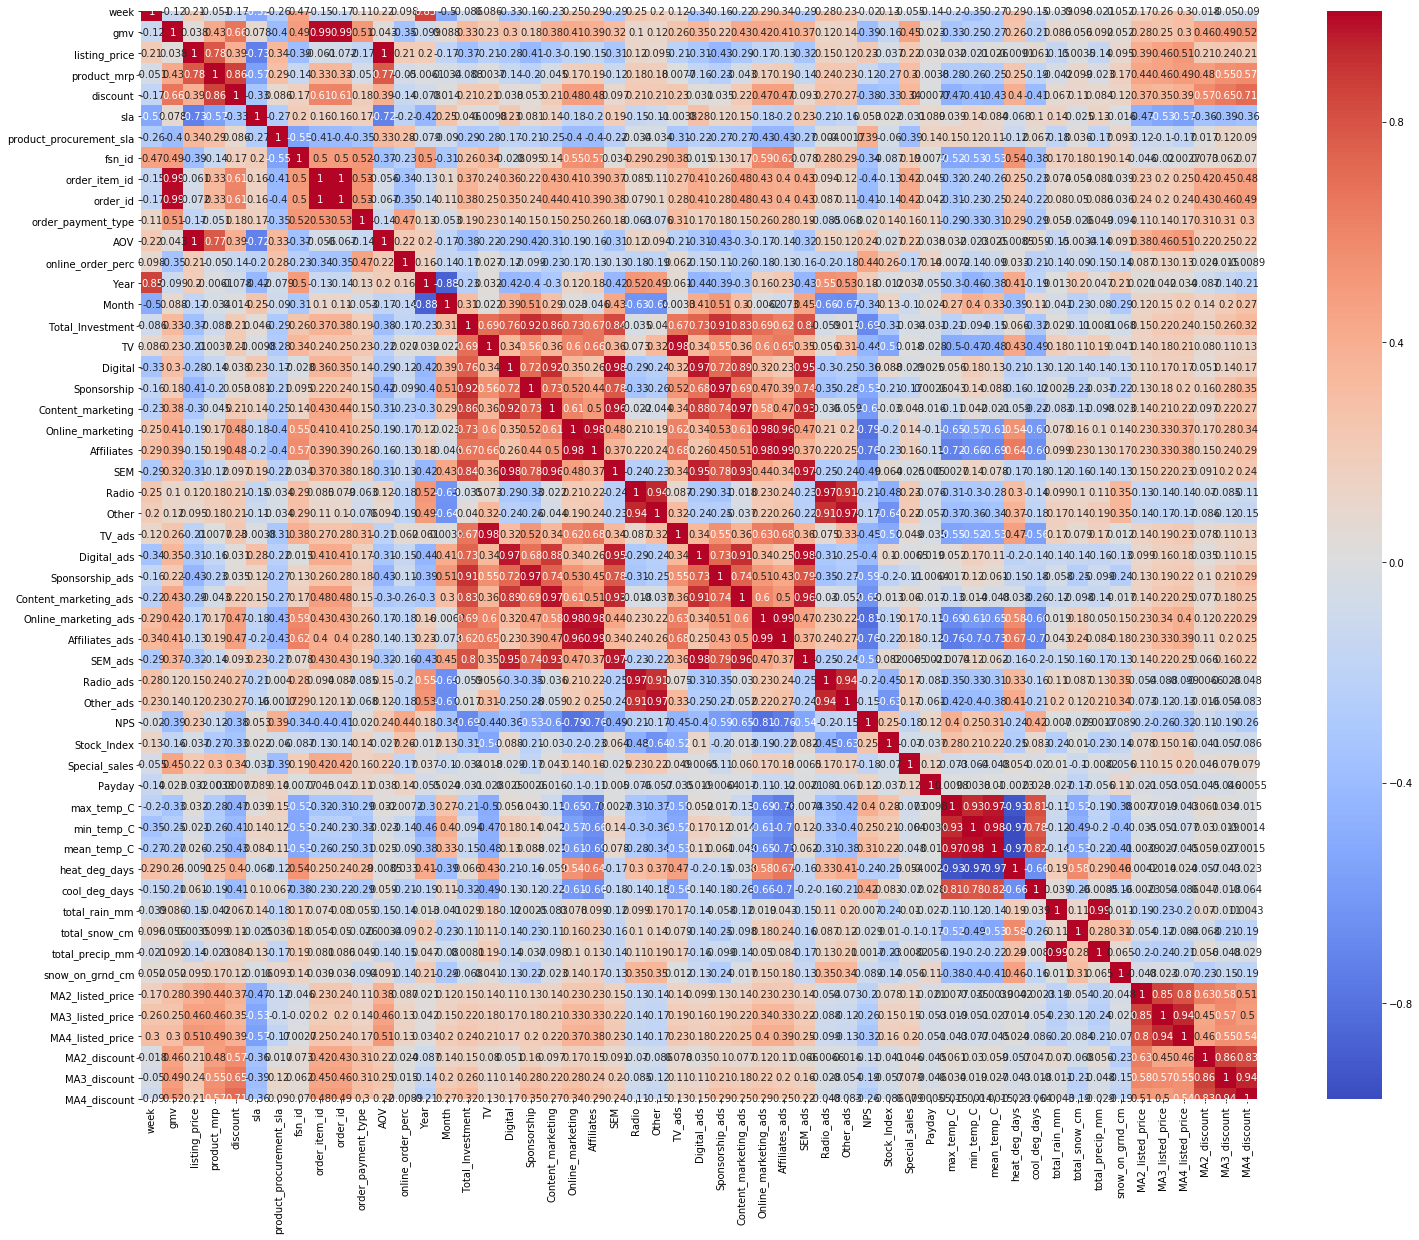

In [ ]:
#Heatmap to see multicollinearity

plt.figure(figsize=(25,20))

### Heatmap
sns.heatmap(ha_week.corr(), cmap="coolwarm", annot=True)
plt.show()

In [ ]:
ha_week.drop(['TV', 'Digital', 'Sponsorship', 'Content_marketing','Online_marketing', 'Affiliates', 'SEM','Radio',
              'Other','Affiliates_ads','SEM_ads','Digital_ads','Radio_ads','Other_ads','mean_temp_C','min_temp_C',
              'order_id','order_item_id','total_precip_mm','Total_Investment','MA3_discount',
              'MA3_listed_price','AOV'], axis = 1, inplace = True)

In [ ]:
ha_week.drop(['max_temp_C'], axis = 1, inplace = True)

In [ ]:

###  Successfully removed more than 90% highly correlated variables from dataset.



In [ ]:
#Home Audio - Lag Variable Functions
### Lag of listed_price, discount_offer, NPS, Special_sales

ha_week['lag_1_listed_price'] = ha_week['listing_price'].shift(-1).fillna(0)
ha_week['lag_2_listed_price'] = ha_week['listing_price'].shift(-2).fillna(0)
ha_week['lag_3_listed_price'] = ha_week['listing_price'].shift(-3).fillna(0)

ha_week['lag_1_discount_offer'] = ha_week['discount'].shift(-1).fillna(0)
ha_week['lag_2_discount_offer'] = ha_week['discount'].shift(-2).fillna(0)
ha_week['lag_3_discount_offer'] = ha_week['discount'].shift(-3).fillna(0)

ha_week['lag_1_NPS'] = ha_week['NPS'].shift(-1).fillna(0)
ha_week['lag_2_NPS'] = ha_week['NPS'].shift(-2).fillna(0)
ha_week['lag_3_NPS'] = ha_week['NPS'].shift(-3).fillna(0)

ha_week['lag_1_Stock_Index'] = ha_week['Stock_Index'].shift(-1).fillna(0)
ha_week['lag_2_Stock_Index'] = ha_week['Stock_Index'].shift(-2).fillna(0)
ha_week['lag_3_Stock_Index'] = ha_week['Stock_Index'].shift(-3).fillna(0)

ha_week['lag_1_Special_sales'] = ha_week['Special_sales'].shift(-1).fillna(0)
ha_week['lag_2_Special_sales'] = ha_week['Special_sales'].shift(-2).fillna(0)
ha_week['lag_3_Special_sales'] = ha_week['Special_sales'].shift(-3).fillna(0)

ha_week['lag_1_Payday'] = ha_week['Payday'].shift(-1).fillna(0)
ha_week['lag_2_Payday'] = ha_week['Payday'].shift(-2).fillna(0)
ha_week['lag_3_Payday'] = ha_week['Payday'].shift(-3).fillna(0)

In [ ]:
ha_week.head(10)

week          gmv  listing_price  product_mrp  discount  sla  \
0     1    83,742.00       2,392.63     4,369.06      0.40 3.60   
1     2 3,725,167.13       1,845.87     2,971.50      0.33 7.14   
2     3 4,344,419.00       1,855.96     3,121.88      0.34 6.91   
3     4 3,917,329.00       1,798.50     3,008.84      0.33 6.99   
4     5 2,812,144.00       1,853.24     3,094.75      0.33 7.09   
5    10 3,091,251.00       1,768.03     3,146.00      0.36 5.66   
6    11 3,489,765.00       1,742.46     3,146.83      0.37 5.60   
7    12 3,091,999.00       1,708.96     2,986.98      0.36 6.26   
8    13 3,405,749.00       1,591.26     2,734.43      0.35 6.34   
9    14 3,434,064.00       1,688.94     2,875.30      0.34 6.38   

   product_procurement_sla  fsn_id  order_payment_type  online_order_perc  \
0                     3.49      19                  34              97.14   
1                     2.76     202                 464              23.06   
2                     2.68     227                 527              22.57   
3                     2.77     227                 450              20.77   
4                     2.68     200                 327              21.61   
5                     2.74     227                 394              24.92   
6                     2.84     241                 393              24.14   
7                     2.64     241                 387              21.52   
8                     2.60     248                 448              20.99   
9                     2.46     247                 433              21.37   

   ... lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0  ...     54.60           1,177.00           1,177.00           1,177.00   
1  ...     56.14           1,177.00           1,177.00           1,185.29   
2  ...     48.79           1,177.00           1,185.29           1,116.00   
3  ...     46.93           1,185.29           1,116.00           1,101.00   
4  ...     46.93           1,116.00           1,101.00           1,101.00   
5  ...     46.93           1,101.00           1,101.00           1,101.00   
6  ...     45.48           1,101.00           1,101.00           1,163.29   
7  ...     44.40           1,101.00           1,163.29           1,210.00   
8  ...     44.40           1,163.29           1,210.00           1,210.00   
9  ...     44.40           1,210.00           1,210.00           1,210.00   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                 0.00                 0.29                 0.00   
1                 0.29                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   
5                 0.00                 0.00                 0.00   
6                 0.00                 0.00                 0.00   
7                 0.00                 0.00                 0.00   
8                 0.00                 0.00                 0.43   
9                 0.00                 0.43                 0.00   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  
0          0.00          0.14          0.00  
1          0.14          0.00          0.14  
2          0.00          0.14          0.14  
3          0.14          0.14          0.00  
4          0.14          0.00          0.14  
5          0.00          0.14          0.00  
6          0.14          0.00          0.14  
7          0.00          0.14          0.00  
8          0.14          0.00          0.14  
9          0.00          0.14          0.00  

[10 rows x 48 columns]

In [ ]:
#Modeling - Camera Accessory
#Linear Model

###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [ ]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']]
                            
    
camera_lm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads  ...  Special_sales  Payday  heat_deg_days  \
0                  0.33  ...           0.00    0.20           0.10   
1                  0.50  ...           0.00    0.00           1.06   
2                  0.50  ...           0.29    0.14           0.82   
3                  0.50  ...           0.00    0.00           1.63   
4                  0.19  ...           0.00    0.14           0.82   

   cool_deg_days  total_rain_mm  total_snow_cm  snow_on_grnd_cm  \
0           1.46           0.00           0.00             0.00   
1           2.32           4.15           0.03             0.04   
2           4.72           1.57           0.03             0.04   
3           4.17           1.14           0.03             0.04   
4           5.91           4.34           0.03             0.04   

   MA4_listed_price  MA2_discount_offer  premium_product  
0              0.00                0.00                0  
1              0.08               -0.05                0  
2              0.07                0.01                0  
3              0.05               -0.01                0  
4              0.02               -0.00                0  

[5 rows x 22 columns]

In [ ]:
### Checking NaN

camera_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
premium_product            0
dtype: int64

In [ ]:
camera_lm.fillna(0, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(camera_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
                                      

### Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [ ]:
df_train.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
40 0.40      0.69 0.35                     0.61                0.80   
44 0.51      0.89 0.34                     0.55                0.21   
37 0.45      0.45 0.34                     0.61                0.28   
17 0.53      0.37 0.46                     0.89                0.17   
7  0.00      0.20 1.00                     0.00                0.00   

    online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
40               0.98    0.56             0.28                   0.01   
44               0.02    0.12             0.29                   0.18   
37               0.17    1.00             0.49                   0.11   
17               0.01    0.36             0.13                   0.04   
7                1.00    0.00             0.00                   0.00   

    Online_marketing_ads  ...  Special_sales  Payday  heat_deg_days  \
40                  0.68  ...           0.00    1.00           0.56   
44                  0.78  ...           0.00    1.00           0.39   
37                  0.76  ...           0.00    0.00           0.82   
17                  0.64  ...           0.67    0.00           0.32   
7                   0.00  ...           1.00    0.00           0.30   

    cool_deg_days  total_rain_mm  total_snow_cm  snow_on_grnd_cm  \
40           0.00           0.01           0.02             0.01   
44           0.06           0.31           0.04             0.02   
37           0.00           1.00           0.02             0.01   
17           0.00           0.14           0.02             0.01   
7            0.32           0.13           0.08             0.04   

    MA4_listed_price  MA2_discount_offer  premium_product  
40              0.29                0.76             0.00  
44              0.27                0.73             0.00  
37              0.34                0.65             0.00  
17              0.38                0.83             0.00  
7               0.00                0.00             0.00  

[5 rows x 22 columns]

In [ ]:
## Split the train dataset into X and y
from sklearn.model_selection import train_test_split
X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']



In [ ]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('order_payment_type', True, 1),
 ('online_order_perc', True, 1),
 ('TV_ads', False, 7),
 ('Sponsorship_ads', False, 6),
 ('Content_marketing_ads', False, 3),
 ('Online_marketing_ads', False, 4),
 ('NPS', False, 8),
 ('Stock_Index', False, 5),
 ('Special_sales', True, 1),
 ('Payday', False, 10),
 ('heat_deg_days', False, 2),
 ('cool_deg_days', False, 9),
 ('total_rain_mm', False, 11),
 ('total_snow_cm', True, 1),
 ('snow_on_grnd_cm', True, 1),
 ('MA4_listed_price', True, 1),
 ('MA2_discount_offer', True, 1),
 ('premium_product', False, 12)]

In [ ]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'Special_sales', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer'],
      dtype='object')

#Building model using statsmodel, for the detailed statistics

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

discount  sla  product_procurement_sla  order_payment_type  \
40      0.69 0.35                     0.61                0.80   
44      0.89 0.34                     0.55                0.21   
37      0.45 0.34                     0.61                0.28   
17      0.37 0.46                     0.89                0.17   
7       0.20 1.00                     0.00                0.00   

    online_order_perc  Special_sales  total_snow_cm  snow_on_grnd_cm  \
40               0.98           0.00           0.02             0.01   
44               0.02           0.00           0.04             0.02   
37               0.17           0.00           0.02             0.01   
17               0.01           0.67           0.02             0.01   
7                1.00           1.00           0.08             0.04   

    MA4_listed_price  MA2_discount_offer  
40              0.29                0.76  
44              0.27                0.73  
37              0.34                0.65  
17              0.38                0.83  
7               0.00                0.00

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

MODEL 1

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     26.49
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.43e-11
Time:                        12:38:42   Log-Likelihood:                 59.145
No. Observations:                  36   AIC:                            -96.29
Df Residuals:                      25   BIC:                            -78.87
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
checkVIF(X_train_new)

Features    VIF
0                     const 236.32
1                  discount   8.12
3   product_procurement_sla   6.26
10       MA2_discount_offer   4.77
5         online_order_perc   4.44
4        order_payment_type   4.25
2                       sla   3.81
9          MA4_listed_price   2.11
6             Special_sales   1.37
7             total_snow_cm   1.31
8           snow_on_grnd_cm   1.20

In [ ]:
X_train_new = X_train_rfe.drop(["discount"], axis = 1)

Model 2

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     18.98
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.80e-09
Time:                        12:38:42   Log-Likelihood:                 51.464
No. Observations:                  36   AIC:                            -82.93
Df Residuals:                      26   BIC:                            -67.09
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
checkVIF(X_train_new)

Features   VIF
0                    const 85.08
9       MA2_discount_offer  4.39
2  product_procurement_sla  3.50
4        online_order_perc  2.99
3       order_payment_type  2.75
1                      sla  2.05
8         MA4_listed_price  1.93
5            Special_sales  1.32
7          snow_on_grnd_cm  1.19
6            total_snow_cm  1.17

In [ ]:
X_train_new = X_train_new.drop(["sla"], axis = 1)

#MODEL 3

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     21.78
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.94e-10
Time:                        12:38:42   Log-Likelihood:                 51.186
No. Observations:                  36   AIC:                            -84.37
Df Residuals:                      27   BIC:                            -70.12
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
checkVIF(X_train_new)

Features   VIF
0                    const 44.89
3        online_order_perc  2.97
1  product_procurement_sla  2.90
8       MA2_discount_offer  2.83
2       order_payment_type  2.74
7         MA4_listed_price  1.92
4            Special_sales  1.23
6          snow_on_grnd_cm  1.15
5            total_snow_cm  1.11

In [ ]:
X_train_new = X_train_new.drop(["snow_on_grnd_cm"], axis = 1)

MODEL 4

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     25.74
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.34e-10
Time:                        12:38:42   Log-Likelihood:                 51.145
No. Observations:                  36   AIC:                            -86.29
Df Residuals:                      28   BIC:                            -73.62
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
checkVIF(X_train_new)

Features   VIF
0                    const 44.09
3        online_order_perc  2.96
1  product_procurement_sla  2.89
7       MA2_discount_offer  2.82
2       order_payment_type  2.74
6         MA4_listed_price  1.88
4            Special_sales  1.20
5            total_snow_cm  1.03

In [ ]:
X_train_new = X_train_new.drop(["MA2_discount_offer"], axis = 1)

MODEL 5

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     29.70
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.00e-11
Time:                        12:38:42   Log-Likelihood:                 50.427
No. Observations:                  36   AIC:                            -86.85
Df Residuals:                      29   BIC:                            -75.77
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
checkVIF(X_train_new)

Features   VIF
0                    const 29.99
3        online_order_perc  2.56
1  product_procurement_sla  1.91
2       order_payment_type  1.91
6         MA4_listed_price  1.50
4            Special_sales  1.20
5            total_snow_cm  1.02

In [ ]:
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)

Model 6

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     35.11
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.15e-11
Time:                        12:38:43   Log-Likelihood:                 49.672
No. Observations:                  36   AIC:                            -87.34
Df Residuals:                      30   BIC:                            -77.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3414      0

In [ ]:
checkVIF(X_train_new)

Features  VIF
0               const 8.31
1  order_payment_type 1.66
2   online_order_perc 1.64
3       Special_sales 1.18
5    MA4_listed_price 1.15
4       total_snow_cm 1.02

Model 7 #after removing "MA4_listed_price"

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     35.11
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.15e-11
Time:                        12:38:43   Log-Likelihood:                 49.672
No. Observations:                  36   AIC:                            -87.34
Df Residuals:                      30   BIC:                            -77.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3414      0

In [ ]:
X_train_new = X_train_new.drop(["total_snow_cm"], axis = 1)

Model 8 

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     45.23
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.63e-12
Time:                        12:38:43   Log-Likelihood:                 49.632
No. Observations:                  36   AIC:                            -89.26
Df Residuals:                      31   BIC:                            -81.35
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3431      0

In [ ]:
checkVIF(X_train_new)

Features  VIF
0               const 7.97
1  order_payment_type 1.66
2   online_order_perc 1.64
3       Special_sales 1.16
4    MA4_listed_price 1.15

Residual Analysis of Model

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

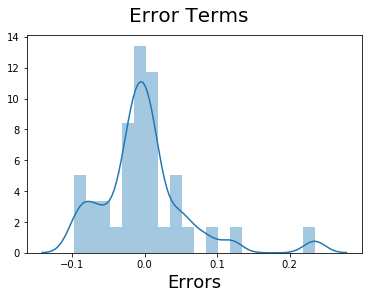

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be justified and fullfilled

Prediction and Evaluation

In [ ]:
#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.26797967046832705

Text(0, 0.5, 'y_pred')

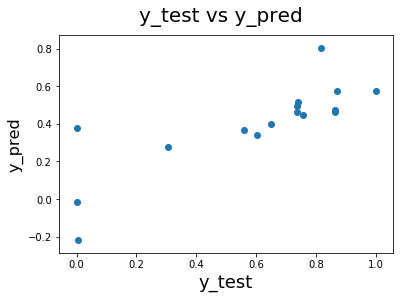

In [ ]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Evaluation of the model using Statistics

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     45.23
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.63e-12
Time:                        12:38:44   Log-Likelihood:                 49.632
No. Observations:                  36   AIC:                            -89.26
Df Residuals:                      31   BIC:                            -81.35
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3431      0

Linear Model - Stepwise Selection for feature selection

In [ ]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [ ]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]
                            
    
camera_lm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads  ...  Stock_Index  Special_sales  Payday  \
0                  0.33  ...     1,177.00           0.00    0.20   
1                  0.50  ...     1,177.00           0.00    0.00   
2                  0.50  ...     1,177.00           0.29    0.14   
3                  0.50  ...     1,177.00           0.00    0.00   
4                  0.19  ...     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0             0.00              0.00                0.00  
1             0.04              0.08               -0.05  
2             0.04              0.07                0.01  
3             0.04              0.05               -0.01  
4             0.04              0.02               -0.00  

[5 rows x 21 columns]

In [ ]:
### Checking NaN
camera_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
dtype: int64

In [ ]:
camera_lm.fillna(0, inplace = True)

In [ ]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']
                                      

### Scale these variables using 'fit_transform'
camera_lm[varlist] = scaler.fit_transform(camera_lm[varlist])

In [ ]:
camera_lm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.00      0.39 0.00                     0.58                0.01   
1 0.30      0.32 0.81                     0.52                0.16   
2 0.32      0.33 0.70                     0.52                0.18   
3 0.32      0.31 0.71                     0.54                0.17   
4 0.22      0.31 0.69                     0.54                0.10   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.02             0.06                   0.00   
1               0.32    0.02             0.09                   0.00   
2               0.32    0.02             0.09                   0.00   
3               0.30    0.02             0.09                   0.00   
4               0.28    0.01             0.04                   0.00   

   Online_marketing_ads  ...  Stock_Index  Special_sales  Payday  \
0                  0.04  ...         0.71           0.00    1.00   
1                  0.05  ...         0.71           0.00    0.00   
2                  0.05  ...         0.71           0.29    0.71   
3                  0.05  ...         0.71           0.00    0.00   
4                  0.02  ...         0.75           0.00    0.71   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.25           0.00           0.00   
1           0.07           0.39           0.42           0.02   
2           0.05           0.80           0.16           0.02   
3           0.11           0.71           0.12           0.02   
4           0.05           1.00           0.44           0.02   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0             0.00              0.58                0.35  
1             0.01              0.69                0.29  
2             0.01              0.67                0.36  
3             0.01              0.65                0.33  
4             0.01              0.61                0.35  

[5 rows x 21 columns]

In [ ]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_lm.drop('gmv',axis=1)
y = camera_lm['gmv']

camera_train_lm = camera_lm

In [ ]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (52, 20)
y dataset:  (52,)


In [ ]:


###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  discount        -0.03
1                       sla        -0.17
2   product_procurement_sla         0.28
3        order_payment_type         0.82
4         online_order_perc        -0.51
5                    TV_ads        -0.03
6           Sponsorship_ads        -0.01
7     Content_marketing_ads         0.02
8      Online_marketing_ads         0.13
9                       NPS        -0.06
10              Stock_Index        -0.01
11            Special_sales         0.11
12                   Payday         0.02
13            heat_deg_days        -0.15
14            cool_deg_days        -0.03
15            total_rain_mm         0.02
16            total_snow_cm         0.06
17          snow_on_grnd_cm         0.05
18         MA4_listed_price        -0.44
19       MA2_discount_offer        -0.51

In [ ]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
      dtype='object')

Model Building - Stepwise selection for feature selection

In [ ]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
def stepwise_selection(x, y,
                       initial_list=[ 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ads                with p-value 0.963139
Drop discount                       with p-value 0.920725
Drop Stock_Index                    with p-value 0.886039
Drop Content_marketing_ads          with p-value 0.825655
Drop cool_deg_days                  with p-value 0.722413
Drop total_rain_mm                  with p-value 0.763053
Drop TV_ads                         with p-value 0.775553
Drop Payday                         with p-value 0.664976
Drop NPS                            with p-value 0.560207
Drop snow_on_grnd_cm                with p-value 0.419371
Drop total_snow_cm                  with p-value 0.358055
Drop heat_deg_days                  with p-value 0.103072

 final_selected_features: ['sla', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'Online_marketing_ads', 'Special_sales', 'MA4_listed_price', 'MA2_discount_offer']


In [ ]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                      0.73
sla                       -0.22
product_procurement_sla    0.31
order_payment_type         0.78
online_order_perc         -0.55
Online_marketing_ads       0.12
Special_sales              0.11
MA4_listed_price          -0.42
MA2_discount_offer        -0.53
dtype: float64


In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     30.36
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.78e-15
Time:                        12:38:45   Log-Likelihood:                 66.372
No. Observations:                  52   AIC:                            -114.7
Df Residuals:                      43   BIC:                            -97.18
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 236.44
7         MA4_listed_price   4.33
8       MA2_discount_offer   3.36
4        online_order_perc   2.84
2  product_procurement_sla   2.51
3       order_payment_type   2.30
5     Online_marketing_ads   1.76
1                      sla   1.47
6            Special_sales   1.13

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features

['sla',
 'product_procurement_sla',
 'order_payment_type',
 'online_order_perc',
 'Online_marketing_ads',
 'Special_sales',
 'MA4_listed_price',
 'MA2_discount_offer']

In [ ]:
###  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [ ]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.004558954047334109

In [ ]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                    const        -0.03
1                      sla        -0.17
2  product_procurement_sla         0.28
3       order_payment_type         0.82
4        online_order_perc        -0.51
5     Online_marketing_ads        -0.03
6            Special_sales        -0.01
7         MA4_listed_price         0.02
8       MA2_discount_offer         0.13

In [ ]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.052128   0.01753343 0.01107959 0.11254678 0.00280735 0.00172053
 0.0154728  0.02399609 0.00156721 0.00350724] 

Mean of 5 KFold CV - MSE: 0.02423590191871442


In [ ]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

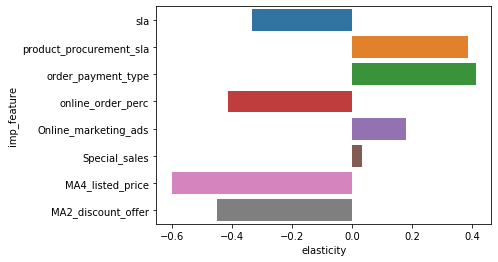

imp_feature  coef  elasticity
0                      sla -0.22       -0.34
1  product_procurement_sla  0.31        0.39
2       order_payment_type  0.78        0.41
3        online_order_perc -0.55       -0.41
4     Online_marketing_ads  0.12        0.18
5            Special_sales  0.11        0.03
6         MA4_listed_price -0.42       -0.60
7       MA2_discount_offer -0.53       -0.45

In [ ]:
elasticity(lm1,camera_train_lm)

Text(0, 0.5, 'y_pred')

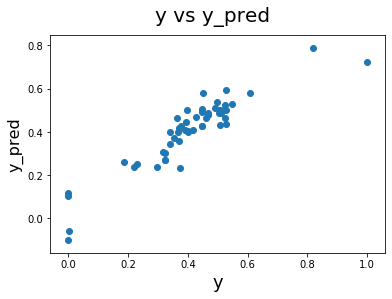

In [ ]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

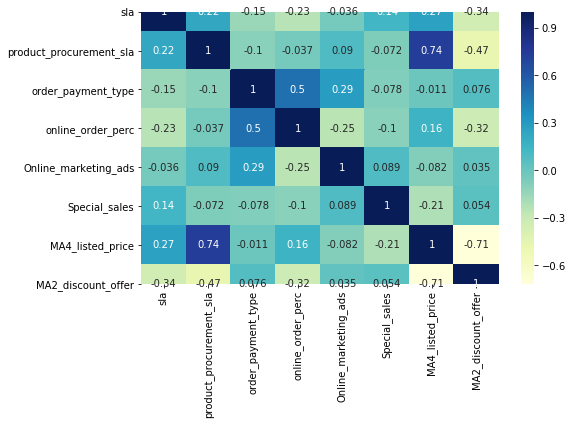

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

Multiplicative Model

In [ ]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [ ]:
camera_mm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]         

camera_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads  ...  Stock_Index  Special_sales  Payday  \
0                  0.33  ...     1,177.00           0.00    0.20   
1                  0.50  ...     1,177.00           0.00    0.00   
2                  0.50  ...     1,177.00           0.29    0.14   
3                  0.50  ...     1,177.00           0.00    0.00   
4                  0.19  ...     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0             0.00              0.00                0.00  
1             0.04              0.08               -0.05  
2             0.04              0.07                0.01  
3             0.04              0.05               -0.01  
4             0.04              0.02               -0.00  

[5 rows x 21 columns]

In [ ]:
### Applying Log 
camera_mm=np.log(camera_mm)

camera_mm = camera_mm.fillna(0)
camera_mm = camera_mm.replace([np.inf, -np.inf], 0)

In [ ]:
camera_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0  9.32     -0.71 1.12                     1.00                3.26   
1 14.02     -0.80 1.95                     0.94                6.62   
2 14.11     -0.78 1.87                     0.95                6.71   
3 14.11     -0.81 1.88                     0.96                6.66   
4 13.72     -0.81 1.87                     0.96                6.15   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               4.61   -2.92             0.62                  -8.36   
1               3.45   -2.52             1.02                  -7.96   
2               3.47   -2.52             1.02                  -7.96   
3               3.41   -2.52             1.02                  -7.96   
4               3.32   -3.57             0.13                  -9.05   

   Online_marketing_ads  ...  Stock_Index  Special_sales  Payday  \
0                 -1.10  ...         7.07           0.00   -1.61   
1                 -0.70  ...         7.07           0.00    0.00   
2                 -0.70  ...         7.07          -1.25   -1.95   
3                 -0.70  ...         7.07           0.00    0.00   
4                 -1.65  ...         7.08           0.00   -1.95   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          -2.30           0.38           0.00           0.00   
1           0.06           0.84           1.42          -3.53   
2          -0.20           1.55           0.45          -3.53   
3           0.49           1.43           0.13          -3.53   
4          -0.20           1.78           1.47          -3.53   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0             0.00              0.00                0.00  
1            -3.19             -2.55                0.00  
2            -3.19             -2.72               -4.55  
3            -3.19             -3.05                0.00  
4            -3.19             -3.87                0.00  

[5 rows x 21 columns]

In [ ]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']      



### Scale these variables using 'fit_transform'
camera_mm[varlist] = scaler.fit_transform(camera_mm[varlist])

In [ ]:
camera_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.38      0.54 0.00                     0.72                0.39   
1 0.87      0.46 0.87                     0.68                0.79   
2 0.88      0.48 0.78                     0.68                0.80   
3 0.88      0.45 0.79                     0.69                0.79   
4 0.84      0.45 0.78                     0.69                0.73   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.44             0.38                   0.36   
1               0.75    0.50             0.47                   0.39   
2               0.75    0.50             0.47                   0.39   
3               0.74    0.50             0.47                   0.39   
4               0.72    0.36             0.28                   0.31   

   Online_marketing_ads  ...  Stock_Index  Special_sales  Payday  \
0                  0.39  ...         0.73           1.00    0.17   
1                  0.47  ...         0.73           1.00    1.00   
2                  0.47  ...         0.73           0.36    0.00   
3                  0.47  ...         0.73           1.00    1.00   
4                  0.29  ...         0.77           1.00    0.00   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.41           0.30           0.89   
1           0.48           0.60           0.74           0.00   
2           0.42           0.91           0.44           0.00   
3           0.56           0.85           0.34           0.00   
4           0.42           1.00           0.75           0.00   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  
0             0.68              1.00                1.00  
1             0.00              0.57                1.00  
2             0.00              0.55                0.16  
3             0.00              0.49                1.00  
4             0.00              0.35                1.00  

[5 rows x 21 columns]

In [ ]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = camera_mm.drop('gmv',axis=1)
y = camera_mm['gmv']

camera_train_mm = camera_mm

In [ ]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 20) (52,)


In [ ]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount        -0.25
1                       sla         0.01
2   product_procurement_sla         0.06
3        order_payment_type         1.00
4         online_order_perc        -0.23
5                    TV_ads        -0.10
6           Sponsorship_ads        -0.02
7     Content_marketing_ads         0.13
8      Online_marketing_ads         0.01
9                       NPS        -0.06
10              Stock_Index        -0.00
11            Special_sales         0.00
12                   Payday         0.01
13            heat_deg_days        -0.01
14            cool_deg_days         0.02
15            total_rain_mm        -0.00
16            total_snow_cm        -0.01
17          snow_on_grnd_cm         0.01
18         MA4_listed_price         0.01
19       MA2_discount_offer         0.00

In [ ]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
      dtype='object')

Model Building - Stepwise selection for feature selection

In [ ]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Stock_Index                    with p-value 0.995212
Drop MA2_discount_offer             with p-value 0.974683
Drop total_rain_mm                  with p-value 0.960636
Drop Online_marketing_ads           with p-value 0.905362
Drop sla                            with p-value 0.857135
Drop heat_deg_days                  with p-value 0.9394
Drop Special_sales                  with p-value 0.822129
Drop snow_on_grnd_cm                with p-value 0.685158
Drop total_snow_cm                  with p-value 0.738928
Drop Sponsorship_ads                with p-value 0.570614
Drop MA4_listed_price               with p-value 0.522494
Drop product_procurement_sla        with p-value 0.397981
Drop Payday                         with p-value 0.24236
Drop cool_deg_days                  with p-value 0.245149
Drop NPS                            with p-value 0.254469

 final_selected_features: ['discount', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Content_marketing_ads']


In [ ]:
## Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.41
discount                -0.34
order_payment_type       1.01
online_order_perc       -0.25
TV_ads                  -0.12
Content_marketing_ads    0.20
dtype: float64


In [ ]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     638.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.78e-41
Time:                        12:38:47   Log-Likelihood:                 119.55
No. Observations:                  52   AIC:                            -227.1
Df Residuals:                      46   BIC:                            -215.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

In [ ]:
x_rfe1.drop('TV_ads',1,inplace=True)

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.42
discount                -0.34
order_payment_type       0.97
online_order_perc       -0.27
Content_marketing_ads    0.12
dtype: float64


In [ ]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     705.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.66e-41
Time:                        12:38:47   Log-Likelihood:                 115.82
No. Observations:                  52   AIC:                            -221.6
Df Residuals:                      47   BIC:                            -211.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

In [ ]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 85.67
2     order_payment_type  2.97
4  Content_marketing_ads  2.63
3      online_order_perc  1.65
1               discount  1.40

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads']

In [ ]:
## Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [ ]:
## Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0006807224912887586

In [ ]:
## Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  const        -0.25
1               discount         0.01
2     order_payment_type         0.06
3      online_order_perc         1.00
4  Content_marketing_ads        -0.23

In [ ]:
## Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02968043 0.00160479 0.00067579 0.00324607 0.00035557 0.00081764
 0.00017848 0.00077301 0.00037081 0.00065533] 

Mean of 5 KFold CV - MSE: 0.0038357917945654914


In [ ]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

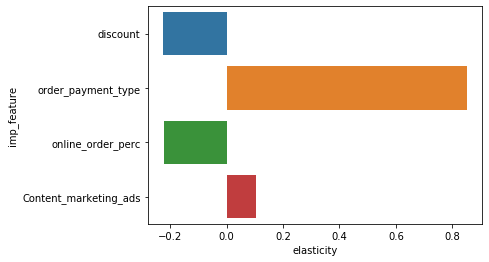

imp_feature  coef  elasticity
0               discount -0.34       -0.23
1     order_payment_type  0.97        0.85
2      online_order_perc -0.27       -0.22
3  Content_marketing_ads  0.12        0.10

In [ ]:
elasticity(mm1,camera_train_mm)

Text(0, 0.5, 'y_pred')

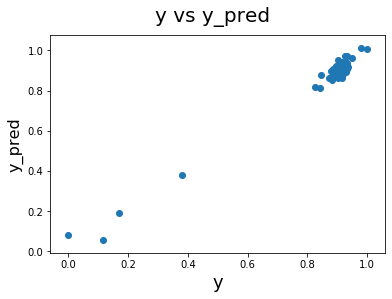

In [ ]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Distributed Lag Model

In [ ]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [ ]:
camera_dlm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']] 

In [ ]:
camera_dlm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads  ...  lag_3_NPS  lag_1_Stock_Index  lag_2_Stock_Index  \
0                  0.33  ...      54.60           1,177.00           1,177.00   
1                  0.50  ...      56.14           1,177.00           1,177.00   
2                  0.50  ...      59.99           1,177.00           1,185.29   
3                  0.50  ...      59.99           1,185.29           1,206.00   
4                  0.19  ...      59.99           1,206.00           1,206.00   

   lag_3_Stock_Index  lag_1_Special_sales  lag_2_Special_sales  \
0           1,177.00                 0.00                 0.29   
1           1,185.29                 0.29                 0.00   
2           1,206.00                 0.00                 0.00   
3           1,206.00                 0.00                 0.00   
4           1,206.00                 0.00                 0.29   

   lag_3_Special_sales  lag_1_Payday  lag_2_Payday  lag_3_Payday  
0                 0.00          0.00          0.14          0.00  
1                 0.00          0.14          0.00          0.14  
2                 0.00          0.00          0.14          0.00  
3                 0.29          0.14          0.00          0.14  
4                 0.43          0.00          0.14          0.00  

[5 rows x 36 columns]

In [ ]:
### Checking NaN
camera_dlm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_listed_price         0
lag_1_discount             0
lag_2_discount             0
lag_3_discount             0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_Special_sales        0
lag_2_Special_sales        0
lag_3_Special_sales        0
lag_1_Payday               0
lag_2_Payday  

In [ ]:
camera_dlm['lag_1_gmv'] = camera_dlm['gmv'].shift(-1)
camera_dlm['lag_2_gmv'] = camera_dlm['gmv'].shift(-2)
camera_dlm['lag_3_gmv'] = camera_dlm['gmv'].shift(-3)

In [ ]:
camera_dlm.head(5)

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads  ...  lag_3_Stock_Index  lag_1_Special_sales  \
0                  0.33  ...           1,177.00                 0.00   
1                  0.50  ...           1,185.29                 0.29   
2                  0.50  ...           1,206.00                 0.00   
3                  0.50  ...           1,206.00                 0.00   
4                  0.19  ...           1,206.00                 0.00   

   lag_2_Special_sales  lag_3_Special_sales  lag_1_Payday  lag_2_Payday  \
0                 0.29                 0.00          0.00          0.14   
1                 0.00                 0.00          0.14          0.00   
2                 0.00                 0.00          0.00          0.14   
3                 0.00                 0.29          0.14          0.00   
4                 0.29                 0.43          0.00          0.14   

   lag_3_Payday    lag_1_gmv    lag_2_gmv    lag_3_gmv  
0          0.00 1,228,580.00 1,344,416.00 1,346,986.00  
1          0.14 1,344,416.00 1,346,986.00   913,445.00  
2          0.00 1,346,986.00   913,445.00     1,498.00  
3          0.14   913,445.00     1,498.00       299.00  
4          0.00     1,498.00       299.00       905.00  

[5 rows x 39 columns]

In [ ]:
camera_dlm = camera_dlm.fillna(0)

In [ ]:
camera_dlm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads  ...  lag_3_Stock_Index  lag_1_Special_sales  \
0                  0.33  ...           1,177.00                 0.00   
1                  0.50  ...           1,185.29                 0.29   
2                  0.50  ...           1,206.00                 0.00   
3                  0.50  ...           1,206.00                 0.00   
4                  0.19  ...           1,206.00                 0.00   

   lag_2_Special_sales  lag_3_Special_sales  lag_1_Payday  lag_2_Payday  \
0                 0.29                 0.00          0.00          0.14   
1                 0.00                 0.00          0.14          0.00   
2                 0.00                 0.00          0.00          0.14   
3                 0.00                 0.29          0.14          0.00   
4                 0.29                 0.43          0.00          0.14   

   lag_3_Payday    lag_1_gmv    lag_2_gmv    lag_3_gmv  
0          0.00 1,228,580.00 1,344,416.00 1,346,986.00  
1          0.14 1,344,416.00 1,346,986.00   913,445.00  
2          0.00 1,346,986.00   913,445.00     1,498.00  
3          0.14   913,445.00     1,498.00       299.00  
4          0.00     1,498.00       299.00       905.00  

[5 rows x 39 columns]

In [ ]:
camera_dlm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
##  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

In [ ]:
##  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']

In [ ]:
##  Scale these variables using 'fit_transform'
camera_dlm[varlist] = scaler.fit_transform(camera_dlm[varlist])

In [ ]:
camera_dlm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.00      0.39 0.00                     0.58                0.01   
1 0.30      0.32 0.81                     0.52                0.16   
2 0.32      0.33 0.70                     0.52                0.18   
3 0.32      0.31 0.71                     0.54                0.17   
4 0.22      0.31 0.69                     0.54                0.10   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.02             0.06                   0.00   
1               0.32    0.02             0.09                   0.00   
2               0.32    0.02             0.09                   0.00   
3               0.30    0.02             0.09                   0.00   
4               0.28    0.01             0.04                   0.00   

   Online_marketing_ads  ...  lag_3_Stock_Index  lag_1_Special_sales  \
0                  0.04  ...               0.95                 0.00   
1                  0.05  ...               0.95                 0.29   
2                  0.05  ...               0.97                 0.00   
3                  0.05  ...               0.97                 0.00   
4                  0.02  ...               0.97                 0.00   

   lag_2_Special_sales  lag_3_Special_sales  lag_1_Payday  lag_2_Payday  \
0                 0.29                 0.00          0.00          1.00   
1                 0.00                 0.00          1.00          0.00   
2                 0.00                 0.00          0.00          1.00   
3                 0.00                 0.29          1.00          0.00   
4                 0.29                 0.43          0.00          1.00   

   lag_3_Payday    lag_1_gmv    lag_2_gmv    lag_3_gmv  
0          0.00 1,228,580.00 1,344,416.00 1,346,986.00  
1          1.00 1,344,416.00 1,346,986.00   913,445.00  
2          0.00 1,346,986.00   913,445.00     1,498.00  
3          1.00   913,445.00     1,498.00       299.00  
4          0.00     1,498.00       299.00       905.00  

[5 rows x 39 columns]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
camera_dlm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.00      0.39 0.00                     0.58                0.01   
1 0.30      0.32 0.81                     0.52                0.16   
2 0.32      0.33 0.70                     0.52                0.18   
3 0.32      0.31 0.71                     0.54                0.17   
4 0.22      0.31 0.69                     0.54                0.10   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.02             0.06                   0.00   
1               0.32    0.02             0.09                   0.00   
2               0.32    0.02             0.09                   0.00   
3               0.30    0.02             0.09                   0.00   
4               0.28    0.01             0.04                   0.00   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                  0.04 0.65         0.71           0.00    1.00   
1                  0.05 0.65         0.71           0.00    0.00   
2                  0.05 0.65         0.71           0.29    0.71   
3                  0.05 0.65         0.71           0.00    0.00   
4                  0.02 0.75         0.75           0.00    0.71   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.25           0.00           0.00   
1           0.07           0.39           0.42           0.02   
2           0.05           0.80           0.16           0.02   
3           0.11           0.71           0.12           0.02   
4           0.05           1.00           0.44           0.02   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0             0.00              0.58                0.35                0.67   
1             0.01              0.69                0.29                0.68   
2             0.01              0.67                0.36                0.68   
3             0.01              0.65                0.33                0.70   
4             0.01              0.61                0.35                1.00   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0            0.53            0.54            0.52       0.91       0.91   
1            0.54            0.52            0.52       0.91       0.94   
2            0.52            0.52            0.31       0.94       1.00   
3            0.52            0.31            1.00       1.00       1.00   
4            0.31            1.00            0.56       1.00       1.00   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0               0.95               0.95               0.95   
1               0.95               0.95               0.95   
2               0.95               0.95               0.97   
3               0.95               0.97               0.97   
4               0.97               0.97               0.97   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                 0.00                 0.29                 0.00   
1                 0.29                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.29   
4                 0.00                 0.29                 0.43   

   lag_1_Payday  lag_2_Payday  lag_3_Payday    lag_1_gmv    lag_2_gmv  \
0          0.00          1.00          0.00 1,228,580.00 1,344,416.00   
1          1.00          0.00          1.00 1,344,416.00 1,346,986.00   
2          0.00          1.00          0.00 1,346,986.00   913,445.00   
3          1.00          0.00          1.00   913,445.00     1,498.00   
4          0.00          1.00          0.00     1,498.00       299.00   

     lag_3_gmv  
0 1,346,986.00  
1   913,445.00  
2     1,498.00  
3       299.00  
4       905.00

In [ ]:
camera_dlm[varlist]

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0  0.00      0.39 0.00                     0.58                0.01   
1  0.30      0.32 0.81                     0.52                0.16   
2  0.32      0.33 0.70                     0.52                0.18   
3  0.32      0.31 0.71                     0.54                0.17   
4  0.22      0.31 0.69                     0.54                0.10   
5  0.00      0.00 1.00                     1.00                0.00   
6  0.00      1.00 0.59                     0.00                0.00   
7  0.00      0.36 0.90                     0.17                0.00   
8  0.32      0.33 0.68                     0.56                0.15   
9  0.38      0.35 0.67                     0.59                0.17   
10 0.34      0.35 0.74                     0.57                0.15   
11 0.34      0.42 0.65                     0.64                0.15   
12 0.47      0.58 0.51                     0.47                0.17   
13 0.37      0.37 0.65                     0.52                0.13   
14 1.00      0.50 0.67                     0.62                0.46   
15 0.37      0.34 0.79                     0.52                0.12   
16 0.51      0.37 0.69                     0.59                0.16   
17 0.53      0.41 0.60                     0.57                0.17   
18 0.45      0.36 0.71                     0.56                0.16   
19 0.35      0.38 0.58                     0.54                0.12   
20 0.37      0.31 0.66                     0.56                0.12   
21 0.40      0.36 0.63                     0.55                0.14   
22 0.43      0.43 0.58                     0.51                0.16   
23 0.38      0.33 0.75                     0.54                0.13   
24 0.47      0.42 0.67                     0.54                0.20   
25 0.45      0.35 0.62                     0.54                0.15   
26 0.53      0.43 0.57                     0.58                0.17   
27 0.39      0.42 0.70                     0.49                0.14   
28 0.49      0.42 0.66                     0.52                0.20   
29 0.37      0.34 0.71                     0.49                0.12   
30 0.52      0.46 0.65                     0.53                0.20   
31 0.40      0.37 0.65                     0.50                0.14   
32 0.61      0.39 0.61                     0.53                0.23   
33 0.53      0.49 0.63                     0.40                0.19   
34 0.51      0.41 0.60                     0.48                0.21   
35 0.53      0.46 0.60                     0.46                0.25   
36 0.42      0.51 0.59                     0.43                0.18   
37 0.45      0.43 0.54                     0.44                0.28   
38 0.50      0.45 0.52                     0.44                0.55   
39 0.53      0.50 0.58                     0.43                1.00   
40 0.40      0.50 0.54                     0.44                0.80   
41 0.23      0.51 0.35                     0.47                0.43   
42 0.82      0.52 0.65                     0.45                0.90   
43 0.50      0.58 0.55                     0.41                0.20   
44 0.51      0.56 0.54                     0.41                0.21   
45 0.46      0.53 0.50                     0.44                0.19   
46 0.55      0.54 0.52                     0.42                0.24   
47 0.45      0.53 0.58                     0.43                0.18   
48 0.45      0.57 0.53                     0.42                0.18   
49 0.40      0.50 0.53                     0.47                0.16   
50 0.33      0.43 0.61                     0.48                0.12   
51 0.19      0.44 0.48                     0.48                0.06   

    online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0                1.00    0.02             0.06                   0.00   
1                0.32    0.02             0.09                   0.00   
2                0.32

In [ ]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_dlm.drop('gmv',axis=1)
y = camera_dlm['gmv']

camera_train_dlm = camera_dlm

In [ ]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 38) (52,)


In [ ]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount         2.28
1                       sla         0.74
2   product_procurement_sla         1.68
3        order_payment_type         0.37
4         online_order_perc        -0.08
5                    TV_ads        -0.06
6           Sponsorship_ads        -0.18
7     Content_marketing_ads        -0.24
8      Online_marketing_ads         1.14
9                       NPS         0.05
10              Stock_Index        -0.21
11            Special_sales        -0.07
12                   Payday         0.23
13            heat_deg_days        -0.63
14            cool_deg_days        -0.45
15            total_rain_mm         0.07
16            total_snow_cm        -0.08
17          snow_on_grnd_cm         0.54
18         MA4_listed_price        -0.58
19       MA2_discount_offer        -1.30
20       lag_1_listed_price        -0.58
21           lag_1_discount        -1.39
22           lag_2_discount        -0.27
23           lag_3_discount        -0.14
24                lag_2_NPS        -1.63
25                lag_3_NPS         2.12
26        lag_1_Stock_Index         1.04
27        lag_2_Stock_Index         1.36
28        lag_3_Stock_Index        -1.93
29      lag_1_Special_sales        -0.24
30      lag_2_Special_sales        -0.07
31      lag_3_Special_sales        -0.29
32             lag_1_Payday         0.49
33             lag_2_Payday         0.40
34             lag_3_Payday         0.06
35                lag_1_gmv        -0.00
36                lag_2_gmv        -0.00
37                lag_3_gmv        -0.00

In [ ]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

Model Building - Stepwise selection for feature selection

In [ ]:
#importing all relevant libraries

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop lag_2_Stock_Index              with p-value 0.973948
Drop lag_3_discount                 with p-value 0.944353
Drop lag_1_listed_price             with p-value 0.933997
Drop lag_3_Payday                   with p-value 0.86122
Drop total_snow_cm                  with p-value 0.81274
Drop NPS                            with p-value 0.774323
Drop lag_2_NPS                      with p-value 0.613166
Drop lag_2_Special_sales            with p-value 0.607625
Drop Sponsorship_ads                with p-value 0.690819
Drop total_rain_mm                  with p-value 0.554125
Drop MA4_listed_price               with p-value 0.350428
Drop Content_marketing_ads          with p-value 0.256841
Drop sla                            with p-value 0.273242
Drop heat_deg_days                  with p-value 0.351357
Drop cool_deg_days                  with p-value 0.331872
Drop TV_ads                         with p-value 0.207509
Drop Stock_Index                    with p-value 0.404813
Drop lag_3_Speci

In [ ]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                     -0.06
discount                   0.68
product_procurement_sla    0.52
order_payment_type         0.65
online_order_perc         -0.44
Online_marketing_ads       0.17
Special_sales              0.13
MA2_discount_offer        -0.57
lag_1_discount            -0.37
lag_1_Stock_Index          0.23
dtype: float64


In [ ]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     26.74
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.24e-14
Time:                        12:38:52   Log-Likelihood:                 66.692
No. Observations:                  52   AIC:                            -113.4
Df Residuals:                      42   BIC:                            -93.87
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 225.76
1                 discount   8.79
2  product_procurement_sla   4.37
7       MA2_discount_offer   4.16
8           lag_1_discount   2.45
4        online_order_perc   2.28
3       order_payment_type   2.10
9        lag_1_Stock_Index   2.02
5     Online_marketing_ads   1.61
6            Special_sales   1.05

In [ ]:
##2

In [ ]:
x_rfe1.drop('discount', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     25.22
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.20e-14
Time:                        12:38:52   Log-Likelihood:                 62.333
No. Observations:                  52   AIC:                            -106.7
Df Residuals:                      43   BIC:                            -89.10
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                    const 101.10
3        online_order_perc   2.27
7           lag_1_discount   2.14
2       order_payment_type   2.02
8        lag_1_Stock_Index   1.95
6       MA2_discount_offer   1.72
4     Online_marketing_ads   1.58
1  product_procurement_sla   1.40
5            Special_sales   1.04

In [ ]:
x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)

In [ ]:
##3

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     28.49
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.33e-14
Time:                        12:38:52   Log-Likelihood:                 61.594
No. Observations:                  52   AIC:                            -107.2
Df Residuals:                      44   BIC:                            -91.58
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3354 

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                 const 60.93
2     online_order_perc  2.20
6        lag_1_discount  2.09
1    order_payment_type  2.02
7     lag_1_Stock_Index  1.94
3  Online_marketing_ads  1.58
5    MA2_discount_offer  1.37
4         Special_sales  1.03

In [ ]:
## 4

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     28.49
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.33e-14
Time:                        12:38:52   Log-Likelihood:                 61.594
No. Observations:                  52   AIC:                            -107.2
Df Residuals:                      44   BIC:                            -91.58
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3354 

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                 const 60.93
2     online_order_perc  2.20
6        lag_1_discount  2.09
1    order_payment_type  2.02
7     lag_1_Stock_Index  1.94
3  Online_marketing_ads  1.58
5    MA2_discount_offer  1.37
4         Special_sales  1.03

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features


['order_payment_type',
 'online_order_perc',
 'Online_marketing_ads',
 'Special_sales',
 'MA2_discount_offer',
 'lag_1_discount',
 'lag_1_Stock_Index']

In [ ]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [ ]:
##  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.005478729042062301

In [ ]:
##  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                 const         2.28
1    order_payment_type         0.74
2     online_order_perc         1.68
3  Online_marketing_ads         0.37
4         Special_sales        -0.08
5    MA2_discount_offer        -0.06
6        lag_1_discount        -0.18
7     lag_1_Stock_Index        -0.24

In [ ]:
##  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.05227808 0.01010431 0.0192584  0.00234272 0.00531585 0.0034996
 0.00167402 0.024605   0.00500097 0.00622862] 

Mean of 5 KFold CV - MSE: 0.0130307571224611


In [ ]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

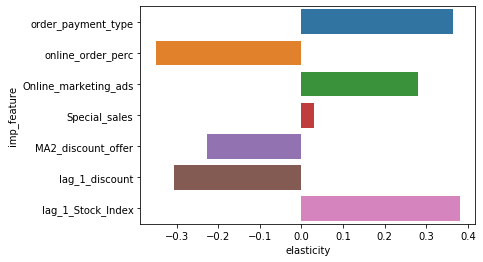

imp_feature  coef  elasticity
0    order_payment_type  0.69        0.36
1     online_order_perc -0.46       -0.35
2  Online_marketing_ads  0.19        0.28
3         Special_sales  0.11        0.03
4    MA2_discount_offer -0.27       -0.23
5        lag_1_discount -0.21       -0.31
6     lag_1_Stock_Index  0.17        0.38

In [ ]:
elasticity(dlm1,camera_train_dlm)

Text(0, 0.5, 'y_pred')

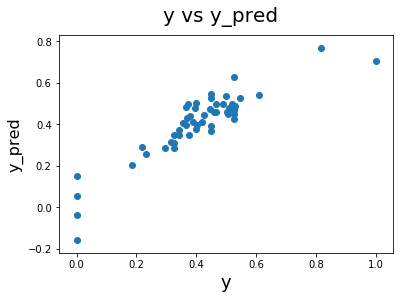

In [ ]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

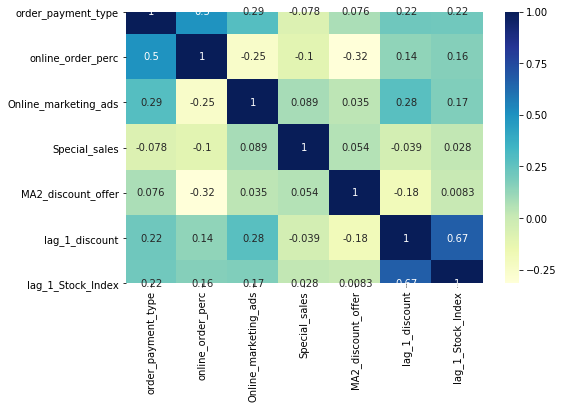

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

Distributed Lag + Multiplicative Model

In [ ]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [ ]:
camera_dlmm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


camera_dlmm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                  0.33 54.60     1,177.00           0.00    0.20   
1                  0.50 54.60     1,177.00           0.00    0.00   
2                  0.50 54.60     1,177.00           0.29    0.14   
3                  0.50 54.60     1,177.00           0.00    0.00   
4                  0.19 56.14     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0             0.00              0.00                0.00              501.23   
1             0.04              0.08               -0.05              512.76   
2             0.04              0.07                0.01              511.97   
3             0.04              0.05               -0.01              522.84   
4             0.04              0.02               -0.00              749.00   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0            0.45            0.46            0.45      54.60      54.60   
1            0.46            0.45            0.44      54.60      56.14   
2            0.45            0.44            0.26      56.14      59.99   
3            0.44            0.26            0.85      59.99      59.99   
4            0.26            0.85            0.47      59.99      59.99   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0           1,177.00           1,177.00           1,177.00   
1           1,177.00           1,177.00           1,185.29   
2           1,177.00           1,185.29           1,206.00   
3           1,185.29           1,206.00           1,206.00   
4           1,206.00           1,206.00           1,206.00   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                 0.00                 0.29                 0.00   
1                 0.29                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.29   
4                 0.00                 0.29                 0.43   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  
0          0.00          0.14          0.00  
1          0.14          0.00          0.14  
2          0.00          0.14          0.00  
3          0.14          0.00          0.14  
4          0.00          0.14          0.00

In [ ]:
camera_dlmm['lag_1_gmv'] = camera_dlmm['gmv'].shift(-1)
camera_dlmm['lag_2_gmv'] = camera_dlmm['gmv'].shift(-2)
camera_dlmm['lag_3_gmv'] = camera_dlmm['gmv'].shift(-3)

In [ ]:
camera_dlmm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    11,151.00      0.49 3.08                     2.73                  26   
1 1,228,580.00      0.45 7.05                     2.57                 753   
2 1,344,416.00      0.46 6.51                     2.57                 823   
3 1,346,986.00      0.45 6.55                     2.61                 781   
4   913,445.00      0.44 6.50                     2.61                 470   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              31.51    0.08             2.78                   0.00   
2              32.02    0.08             2.78                   0.00   
3              30.38    0.08             2.78                   0.00   
4              27.60    0.03             1.14                   0.00   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                  0.33 54.60     1,177.00           0.00    0.20   
1                  0.50 54.60     1,177.00           0.00    0.00   
2                  0.50 54.60     1,177.00           0.29    0.14   
3                  0.50 54.60     1,177.00           0.00    0.00   
4                  0.19 56.14     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0             0.00              0.00                0.00              501.23   
1             0.04              0.08               -0.05              512.76   
2             0.04              0.07                0.01              511.97   
3             0.04              0.05               -0.01              522.84   
4             0.04              0.02               -0.00              749.00   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0            0.45            0.46            0.45      54.60      54.60   
1            0.46            0.45            0.44      54.60      56.14   
2            0.45            0.44            0.26      56.14      59.99   
3            0.44            0.26            0.85      59.99      59.99   
4            0.26            0.85            0.47      59.99      59.99   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0           1,177.00           1,177.00           1,177.00   
1           1,177.00           1,177.00           1,185.29   
2           1,177.00           1,185.29           1,206.00   
3           1,185.29           1,206.00           1,206.00   
4           1,206.00           1,206.00           1,206.00   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                 0.00                 0.29                 0.00   
1                 0.29                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.29   
4                 0.00                 0.29                 0.43   

   lag_1_Payday  lag_2_Payday  lag_3_Payday    lag_1_gmv    lag_2_gmv  \
0          0.00          0.14          0.00 1,228,580.00 1,344,416.00   
1          0.14          0.00          0.14 1,344,416.00 1,346,986.00   
2          0.00          0.14          0.00 1,346,986.00   913,445.00   
3          0.14          0.00          0.14   913,445.00     1,498.00   
4          0.00          0.14          0.00     1,498.00       299.00   

     lag_3_gmv  
0 1,346,986.00  
1   913,445.00  
2     1,498.00  
3       299.00  
4       905.00

In [ ]:
### Checking NaN

camera_dlmm.isnull().sum()


gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA4_listed_price           0
MA2_discount_offer         0
lag_1_listed_price         0
lag_1_discount             0
lag_2_discount             0
lag_3_discount             0
lag_2_NPS                  0
lag_3_NPS                  0
lag_1_Stock_Index          0
lag_2_Stock_Index          0
lag_3_Stock_Index          0
lag_1_Special_sales        0
lag_2_Special_sales        0
lag_3_Special_sales        0
lag_1_Payday               0
lag_2_Payday  

In [ ]:
camera_dlmm = camera_dlmm.fillna(0)

In [ ]:
## Applying Log 
camera_dlmm=np.log(camera_dlmm)

camera_dlmm = camera_dlmm.fillna(0)
camera_dlmm = camera_dlmm.replace([np.inf, -np.inf], 0)

In [ ]:
camera_dlmm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0  9.32     -0.71 1.12                     1.00                3.26   
1 14.02     -0.80 1.95                     0.94                6.62   
2 14.11     -0.78 1.87                     0.95                6.71   
3 14.11     -0.81 1.88                     0.96                6.66   
4 13.72     -0.81 1.87                     0.96                6.15   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               4.61   -2.92             0.62                  -8.36   
1               3.45   -2.52             1.02                  -7.96   
2               3.47   -2.52             1.02                  -7.96   
3               3.41   -2.52             1.02                  -7.96   
4               3.32   -3.57             0.13                  -9.05   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                 -1.10 4.00         7.07           0.00   -1.61   
1                 -0.70 4.00         7.07           0.00    0.00   
2                 -0.70 4.00         7.07          -1.25   -1.95   
3                 -0.70 4.00         7.07           0.00    0.00   
4                 -1.65 4.03         7.08           0.00   -1.95   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          -2.30           0.38           0.00           0.00   
1           0.06           0.84           1.42          -3.53   
2          -0.20           1.55           0.45          -3.53   
3           0.49           1.43           0.13          -3.53   
4          -0.20           1.78           1.47          -3.53   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0             0.00              0.00                0.00                6.22   
1            -3.19             -2.55                0.00                6.24   
2            -3.19             -2.72               -4.55                6.24   
3            -3.19             -3.05                0.00                6.26   
4            -3.19             -3.87                0.00                6.62   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0           -0.80           -0.78           -0.81       4.00       4.00   
1           -0.78           -0.81           -0.81       4.00       4.03   
2           -0.81           -0.81           -1.35       4.03       4.09   
3           -0.81           -1.35           -0.16       4.09       4.09   
4           -1.35           -0.16           -0.74       4.09       4.09   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0               7.07               7.07               7.07   
1               7.07               7.07               7.08   
2               7.07               7.08               7.10   
3               7.08               7.10               7.10   
4               7.10               7.10               7.10   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                 0.00                -1.25                 0.00   
1                -1.25                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                -1.25   
4                 0.00                -1.25                -0.85   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  lag_2_gmv  lag_3_gmv  
0          0.00         -1.95          0.00      14.02      14.11      14.11  
1         -1.95          0.00         -1.95      14.11      14.11      13.72  
2          0.00         -1.95          0.00      14.11      13.72       7.31  
3         -1.95          0.00         -1.95      13.72       7.31       5.70  
4          0.00         -1.95          0.00       7.31       5.70       6.81

In [ ]:
camera_dlmm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [ ]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
camera_dlmm[varlist] = scaler.fit_transform(camera_dlmm[varlist])

In [ ]:
camera_dlmm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.38      0.54 0.00                     0.72                0.39   
1 0.87      0.46 0.87                     0.68                0.79   
2 0.88      0.48 0.78                     0.68                0.80   
3 0.88      0.45 0.79                     0.69                0.79   
4 0.84      0.45 0.78                     0.69                0.73   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.44             0.38                   0.36   
1               0.75    0.50             0.47                   0.39   
2               0.75    0.50             0.47                   0.39   
3               0.74    0.50             0.47                   0.39   
4               0.72    0.36             0.28                   0.31   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                  0.39 0.69         0.73           1.00    0.17   
1                  0.47 0.69         0.73           1.00    1.00   
2                  0.47 0.69         0.73           0.36    0.00   
3                  0.47 0.69         0.73           1.00    1.00   
4                  0.29 0.78         0.77           1.00    0.00   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.41           0.30           0.89   
1           0.48           0.60           0.74           0.00   
2           0.42           0.91           0.44           0.00   
3           0.56           0.85           0.34           0.00   
4           0.42           1.00           0.75           0.00   

   snow_on_grnd_cm  MA4_listed_price  MA2_discount_offer  lag_1_listed_price  \
0             0.68              1.00                1.00                0.94   
1             0.00              0.57                1.00                0.94   
2             0.00              0.55                0.16                0.94   
3             0.00              0.49                1.00                0.95   
4             0.00              0.35                1.00                1.00   

   lag_1_discount  lag_2_discount  lag_3_discount  lag_2_NPS  lag_3_NPS  \
0            0.40            0.42            0.40       0.98       0.98   
1            0.42            0.40            0.40       0.98       0.98   
2            0.40            0.40            0.00       0.98       1.00   
3            0.40            0.00            0.88       1.00       1.00   
4            0.00            0.88            0.45       1.00       1.00   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  \
0               0.99               0.99               0.99   
1               0.99               0.99               0.99   
2               0.99               0.99               1.00   
3               0.99               1.00               1.00   
4               1.00               1.00               1.00   

   lag_1_Special_sales  lag_2_Special_sales  lag_3_Special_sales  \
0                 1.00                 0.36                 1.00   
1                 0.36                 1.00                 1.00   
2                 1.00                 1.00                 1.00   
3                 1.00                 1.00                 0.36   
4                 1.00                 0.36                 0.56   

   lag_1_Payday  lag_2_Payday  lag_3_Payday  lag_1_gmv  lag_2_gmv  lag_3_gmv  
0          1.00          0.00          1.00      14.02      14.11      14.11  
1          0.00          1.00          0.00      14.11      14.11      13.72  
2          1.00          0.00          1.00      14.11      13.72       7.31  
3          0.00          1.00          0.00      13.72       7.31       5.70  
4          1.00          0.00          1.00       7.31       5.70       6.81

In [ ]:
##  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_dlmm.drop('gmv',axis=1)
y = camera_dlmm['gmv']

camera_train_dlmm = camera_dlmm

In [ ]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 38) (52,)


In [ ]:
##  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  discount        -0.05
1                       sla         0.08
2   product_procurement_sla         0.23
3        order_payment_type         0.77
4         online_order_perc        -0.30
5                    TV_ads        -0.02
6           Sponsorship_ads         0.03
7     Content_marketing_ads         0.03
8      Online_marketing_ads         0.02
9                       NPS        -0.04
10              Stock_Index         0.02
11            Special_sales         0.01
12                   Payday         0.02
13            heat_deg_days         0.06
14            cool_deg_days         0.03
15            total_rain_mm         0.01
16            total_snow_cm        -0.04
17          snow_on_grnd_cm         0.00
18         MA4_listed_price         0.01
19       MA2_discount_offer        -0.01
20       lag_1_listed_price        -0.38
21           lag_1_discount        -0.15
22           lag_2_discount         0.12
23           lag_3_discount        -0.07
24                lag_2_NPS         1.03
25                lag_3_NPS        -0.19
26        lag_1_Stock_Index        -0.20
27        lag_2_Stock_Index        -0.66
28        lag_3_Stock_Index         0.10
29      lag_1_Special_sales         0.00
30      lag_2_Special_sales        -0.02
31      lag_3_Special_sales         0.02
32             lag_1_Payday         0.05
33             lag_2_Payday         0.05
34             lag_3_Payday         0.02
35                lag_1_gmv         0.03
36                lag_2_gmv        -0.02
37                lag_3_gmv         0.01

In [ ]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

Model Building - Stepwise selection for feature selection

In [ ]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Add  lag_1_gmv                      with p-value 0.00299572
Drop lag_1_Stock_Index              with p-value 0.991317
Drop snow_on_grnd_cm                with p-value 0.956292
Drop total_rain_mm                  with p-value 0.775619
Drop lag_3_Stock_Index              with p-value 0.721157
Drop lag_3_Special_sales            with p-value 0.746368
Drop MA4_listed_price               with p-value 0.611573
Drop lag_1_Special_sales            with p-value 0.616005
Drop TV_ads                         with p-value 0.51872
Drop lag_3_discount                 with p-value 0.522344
Drop MA2_discount_offer             with p-value 0.441148
Drop sla                            with p-value 0.384655
Drop NPS                            with p-value 0.291114
Drop lag_2_Special_sales            with p-value 0.204166
Drop Special_sales                  with p-value 0.0864548

 final_selected_features: ['discount', 'product_procurement_sla', 'order_payment_type', 'online_order_perc', 'Sponsorship_ads',

In [ ]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                     -0.01
discount                  -0.19
product_procurement_sla    0.21
order_payment_type         0.82
online_order_perc         -0.27
Sponsorship_ads            0.05
Content_marketing_ads      0.21
Online_marketing_ads      -0.16
Stock_Index                0.03
Payday                     0.03
heat_deg_days              0.11
cool_deg_days              0.04
total_snow_cm             -0.04
lag_1_listed_price        -0.27
lag_1_discount            -0.14
lag_2_discount             0.11
lag_2_NPS                  0.95
lag_3_NPS                  0.05
lag_2_Stock_Index         -0.84
lag_1_Payday               0.06
lag_2_Payday               0.08
lag_3_Payday               0.04
lag_1_gmv                  0.02
dtype: float64


In [ ]:
##  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                     const 1,890.46
18        lag_2_Stock_Index   438.74
16                lag_2_NPS   435.71
7      Online_marketing_ads    66.60
6     Content_marketing_ads    47.79
13       lag_1_listed_price    22.19
22                lag_1_gmv    16.93
20             lag_2_Payday    16.07
19             lag_1_Payday    14.49
3        order_payment_type    13.61
2   product_procurement_sla    12.85
1                  discount    10.15
21             lag_3_Payday     6.56
17                lag_3_NPS     6.25
9                    Payday     6.08
5           Sponsorship_ads     5.34
4         online_order_perc     5.11
10            heat_deg_days     4.60
14           lag_1_discount     4.39
15           lag_2_discount     3.94
11            cool_deg_days     3.18
12            total_snow_cm     2.14
8               Stock_Index     1.85

In [ ]:
x_rfe1.drop('lag_1_gmv', axis = 1, inplace = True)

## 2

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.18e-26
Time:                        12:38:56   Log-Likelihood:                 137.51
No. Observations:                  52   AIC:                            -231.0
Df Residuals:                      30   BIC:                            -188.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                     const 1,889.00
18        lag_2_Stock_Index   437.97
16                lag_2_NPS   433.71
7      Online_marketing_ads    65.72
6     Content_marketing_ads    43.78
20             lag_2_Payday    15.35
19             lag_1_Payday    14.38
3        order_payment_type    12.85
13       lag_1_listed_price     9.78
1                  discount     9.39
2   product_procurement_sla     8.40
17                lag_3_NPS     6.25
21             lag_3_Payday     6.12
9                    Payday     6.04
5           Sponsorship_ads     5.26
10            heat_deg_days     3.87
14           lag_1_discount     3.82
4         online_order_perc     3.36
11            cool_deg_days     3.18
15           lag_2_discount     2.15
12            total_snow_cm     1.99
8               Stock_Index     1.84

In [ ]:
x_rfe1.drop('lag_2_discount', axis = 1, inplace = True)

# 3

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.99e-28
Time:                        12:38:56   Log-Likelihood:                 137.49
No. Observations:                  52   AIC:                            -233.0
Df Residuals:                      31   BIC:                            -192.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                     const 1,850.70
15                lag_2_NPS   429.99
17        lag_2_Stock_Index   429.77
7      Online_marketing_ads    65.66
6     Content_marketing_ads    43.67
19             lag_2_Payday    15.34
18             lag_1_Payday    14.35
3        order_payment_type    12.71
13       lag_1_listed_price     9.77
1                  discount     9.21
2   product_procurement_sla     8.40
16                lag_3_NPS     6.24
20             lag_3_Payday     6.09
9                    Payday     6.04
5           Sponsorship_ads     5.26
10            heat_deg_days     3.81
14           lag_1_discount     3.76
11            cool_deg_days     3.17
4         online_order_perc     3.17
12            total_snow_cm     1.97
8               Stock_Index     1.81

In [ ]:
x_rfe1.drop('lag_1_listed_price', axis = 1, inplace = True)

# 4

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.73e-29
Time:                        12:38:56   Log-Likelihood:                 136.81
No. Observations:                  52   AIC:                            -233.6
Df Residuals:                      32   BIC:                            -194.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                     const 1,307.74
14                lag_2_NPS   425.84
16        lag_2_Stock_Index   422.57
7      Online_marketing_ads    28.01
6     Content_marketing_ads    17.92
18             lag_2_Payday    15.24
17             lag_1_Payday    14.34
3        order_payment_type    10.41
1                  discount     9.13
2   product_procurement_sla     8.37
15                lag_3_NPS     6.08
19             lag_3_Payday     6.05
9                    Payday     6.04
5           Sponsorship_ads     4.85
10            heat_deg_days     3.80
4         online_order_perc     3.13
11            cool_deg_days     2.97
12            total_snow_cm     1.96
13           lag_1_discount     1.90
8               Stock_Index     1.80

In [ ]:
x_rfe1.drop('lag_1_discount', axis = 1, inplace = True)

# 6

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.17e-28
Time:                        12:38:56   Log-Likelihood:                 130.78
No. Observations:                  52   AIC:                            -223.6
Df Residuals:                      33   BIC:                            -186.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                     const 1,281.14
13                lag_2_NPS   394.66
15        lag_2_Stock_Index   387.03
7      Online_marketing_ads    27.96
6     Content_marketing_ads    16.47
17             lag_2_Payday    15.19
16             lag_1_Payday    14.31
3        order_payment_type     8.30
1                  discount     8.19
2   product_procurement_sla     7.83
14                lag_3_NPS     6.08
9                    Payday     6.03
18             lag_3_Payday     6.02
5           Sponsorship_ads     4.84
10            heat_deg_days     3.21
11            cool_deg_days     2.97
4         online_order_perc     2.68
12            total_snow_cm     1.84
8               Stock_Index     1.66

In [ ]:
x_rfe1.drop('lag_2_NPS', axis = 1, inplace = True)

# 7

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     201.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.34e-29
Time:                        12:38:57   Log-Likelihood:                 129.09
No. Observations:                  52   AIC:                            -222.2
Df Residuals:                      34   BIC:                            -187.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                     const 1,101.60
7      Online_marketing_ads    27.82
16             lag_2_Payday    14.36
6     Content_marketing_ads    14.26
15             lag_1_Payday    13.77
1                  discount     7.92
2   product_procurement_sla     7.80
13                lag_3_NPS     5.98
9                    Payday     5.96
17             lag_3_Payday     5.79
3        order_payment_type     5.72
5           Sponsorship_ads     4.45
14        lag_2_Stock_Index     4.28
10            heat_deg_days     3.00
11            cool_deg_days     2.96
4         online_order_perc     2.31
12            total_snow_cm     1.68
8               Stock_Index     1.26

In [ ]:
x_rfe1.drop('heat_deg_days', axis = 1, inplace = True)

# 8

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.86e-30
Time:                        12:38:57   Log-Likelihood:                 129.09
No. Observations:                  52   AIC:                            -224.2
Df Residuals:                      35   BIC:                            -191.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                     const 691.99
7      Online_marketing_ads  24.84
6     Content_marketing_ads  14.11
15             lag_2_Payday  14.08
14             lag_1_Payday  13.55
1                  discount   6.91
2   product_procurement_sla   6.79
9                    Payday   5.83
12                lag_3_NPS   5.82
16             lag_3_Payday   5.68
3        order_payment_type   5.65
13        lag_2_Stock_Index   4.27
5           Sponsorship_ads   3.98
10            cool_deg_days   2.47
4         online_order_perc   2.18
11            total_snow_cm   1.66
8               Stock_Index   1.24

In [ ]:
x_rfe1.drop('total_snow_cm', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     241.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.82e-31
Time:                        12:38:57   Log-Likelihood:                 129.08
No. Observations:                  52   AIC:                            -226.2
Df Residuals:                      36   BIC:                            -194.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                     const 678.00
7      Online_marketing_ads  22.55
6     Content_marketing_ads  14.01
13             lag_1_Payday  13.46
14             lag_2_Payday  13.27
1                  discount   6.88
2   product_procurement_sla   6.79
9                    Payday   5.81
11                lag_3_NPS   5.63
15             lag_3_Payday   5.60
3        order_payment_type   5.25
12        lag_2_Stock_Index   4.27
5           Sponsorship_ads   3.18
10            cool_deg_days   2.39
4         online_order_perc   2.12
8               Stock_Index   1.24

In [ ]:
x_rfe1.drop('Stock_Index', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     264.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.18e-32
Time:                        12:38:57   Log-Likelihood:                 128.96
No. Observations:                  52   AIC:                            -227.9
Df Residuals:                      37   BIC:                            -198.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                     const 675.89
7      Online_marketing_ads  22.44
6     Content_marketing_ads  13.83
12             lag_1_Payday  13.36
13             lag_2_Payday  13.26
2   product_procurement_sla   6.62
1                  discount   6.57
8                    Payday   5.75
10                lag_3_NPS   5.62
14             lag_3_Payday   5.60
3        order_payment_type   5.22
11        lag_2_Stock_Index   4.26
5           Sponsorship_ads   3.18
9             cool_deg_days   2.36
4         online_order_perc   2.11

In [ ]:
x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     290.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.01e-34
Time:                        12:38:57   Log-Likelihood:                 128.72
No. Observations:                  52   AIC:                            -229.4
Df Residuals:                      38   BIC:                            -202.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const 573.91
6    Online_marketing_ads  22.42
5   Content_marketing_ads  13.21
11           lag_1_Payday  12.62
12           lag_2_Payday  11.67
7                  Payday   5.64
9               lag_3_NPS   5.50
2      order_payment_type   4.93
13           lag_3_Payday   4.62
10      lag_2_Stock_Index   4.13
4         Sponsorship_ads   3.03
8           cool_deg_days   2.31
3       online_order_perc   2.06
1                discount   1.58

In [ ]:
x_rfe1.drop('Online_marketing_ads', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     316.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.36e-35
Time:                        12:38:57   Log-Likelihood:                 128.21
No. Observations:                  52   AIC:                            -230.4
Df Residuals:                      39   BIC:                            -205.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const 567.15
10           lag_1_Payday  12.31
11           lag_2_Payday  11.61
8               lag_3_NPS   5.49
6                  Payday   5.47
12           lag_3_Payday   4.62
5   Content_marketing_ads   4.38
9       lag_2_Stock_Index   3.73
2      order_payment_type   3.39
4         Sponsorship_ads   2.87
3       online_order_perc   2.05
7           cool_deg_days   1.89
1                discount   1.57

In [ ]:
x_rfe1.drop('Sponsorship_ads', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     346.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.01e-36
Time:                        12:38:57   Log-Likelihood:                 127.66
No. Observations:                  52   AIC:                            -231.3
Df Residuals:                      40   BIC:                            -207.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const 538.81
9            lag_1_Payday  10.24
10           lag_2_Payday   9.96
5                  Payday   4.97
7               lag_3_NPS   4.91
11           lag_3_Payday   4.34
8       lag_2_Stock_Index   3.71
4   Content_marketing_ads   3.54
2      order_payment_type   3.25
3       online_order_perc   2.02
6           cool_deg_days   1.88
1                discount   1.54

In [ ]:
x_rfe1.drop('lag_3_NPS', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     374.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.61e-37
Time:                        12:38:57   Log-Likelihood:                 126.61
No. Observations:                  52   AIC:                            -231.2
Df Residuals:                      41   BIC:                            -209.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                   const 416.11
8            lag_1_Payday   8.81
9            lag_2_Payday   5.97
5                  Payday   4.97
4   Content_marketing_ads   3.48
10           lag_3_Payday   3.42
2      order_payment_type   3.21
7       lag_2_Stock_Index   2.85
3       online_order_perc   1.97
6           cool_deg_days   1.78
1                discount   1.54

In [ ]:
x_rfe1.drop('Payday', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     402.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.69e-38
Time:                        12:38:57   Log-Likelihood:                 125.13
No. Observations:                  52   AIC:                            -230.3
Df Residuals:                      42   BIC:                            -210.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 311.32
8           lag_2_Payday   5.88
7           lag_1_Payday   3.87
4  Content_marketing_ads   3.48
9           lag_3_Payday   3.42
2     order_payment_type   3.21
6      lag_2_Stock_Index   2.06
3      online_order_perc   1.97
5          cool_deg_days   1.76
1               discount   1.53

In [ ]:
x_rfe1.drop('lag_1_Payday', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     445.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.99e-39
Time:                        12:38:57   Log-Likelihood:                 124.11
No. Observations:                  52   AIC:                            -230.2
Df Residuals:                      43   BIC:                            -212.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const 263.68
4  Content_marketing_ads   3.48
8           lag_3_Payday   3.42
7           lag_2_Payday   3.30
2     order_payment_type   3.20
3      online_order_perc   1.96
5          cool_deg_days   1.76
6      lag_2_Stock_Index   1.69
1               discount   1.53

In [ ]:
x_rfe1.drop('lag_2_Stock_Index', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     491.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.34e-39
Time:                        12:38:57   Log-Likelihood:                 122.61
No. Observations:                  52   AIC:                            -229.2
Df Residuals:                      44   BIC:                            -213.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [ ]:
x_rfe1.drop('cool_deg_days', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     549.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.30e-40
Time:                        12:38:57   Log-Likelihood:                 120.91
No. Observations:                  52   AIC:                            -227.8
Df Residuals:                      45   BIC:                            -214.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 98.46
2     order_payment_type  2.99
4  Content_marketing_ads  2.63
6           lag_3_Payday  2.60
5           lag_2_Payday  2.44
3      online_order_perc  1.70
1               discount  1.44

In [ ]:
x_rfe1.drop('lag_3_Payday', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     580.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.47e-40
Time:                        12:38:57   Log-Likelihood:                 117.08
No. Observations:                  52   AIC:                            -222.2
Df Residuals:                      46   BIC:                            -210.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 88.14
2     order_payment_type  2.97
4  Content_marketing_ads  2.63
3      online_order_perc  1.66
1               discount  1.41
5           lag_2_Payday  1.02

In [ ]:
x_rfe1.drop('lag_2_Payday', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     705.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.66e-41
Time:                        12:38:58   Log-Likelihood:                 115.82
No. Observations:                  52   AIC:                            -221.6
Df Residuals:                      47   BIC:                            -211.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 85.67
2     order_payment_type  2.97
4  Content_marketing_ads  2.63
3      online_order_perc  1.65
1               discount  1.40

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads']

In [ ]:
## Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [ ]:
##  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0006807224912887586

In [ ]:
##  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

0  Coefficient
0                  const        -0.05
1               discount         0.08
2     order_payment_type         0.23
3      online_order_perc         0.77
4  Content_marketing_ads        -0.30

In [ ]:
##  Using K-Fold Cross validation evaluating on Entire dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02968043 0.00160479 0.00067579 0.00324607 0.00035557 0.00081764
 0.00017848 0.00077301 0.00037081 0.00065533] 

Mean of 5 KFold CV - MSE: 0.0038357917945654914


In [ ]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

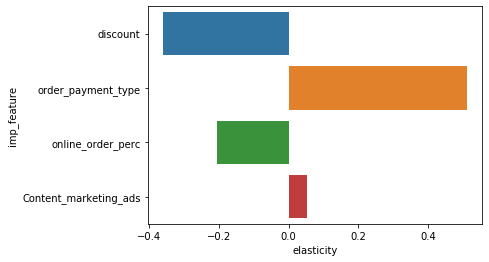

imp_feature  coef  elasticity
0               discount -0.34       -0.36
1     order_payment_type  0.97        0.51
2      online_order_perc -0.27       -0.20
3  Content_marketing_ads  0.12        0.05

In [ ]:
elasticity(dlm1,camera_train_dlm)

Text(0, 0.5, 'y_pred')

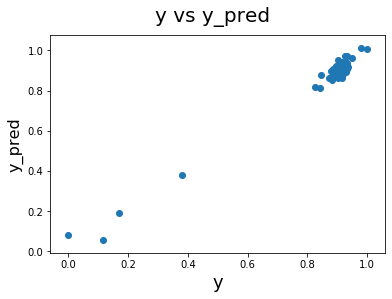

In [ ]:


# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  



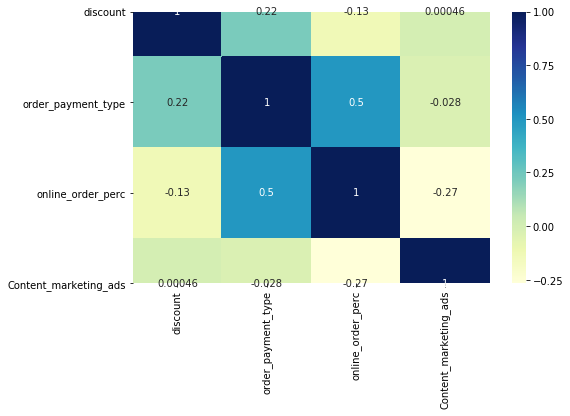

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

# Modeling - Gaming Accessory


Linear Model

In [ ]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [ ]:
gaming_lm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']]
                            
    
gaming_lm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    17,466.00      0.22 3.64                     2.64                  25   
1 1,435,300.00      0.41 5.21                     3.07                 689   
2 1,097,388.36      0.43 5.17                     2.59                 534   
3 1,158,166.00      0.35 5.23                     2.45                 425   
4   742,062.00      0.36 5.58                     2.42                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              26.21    0.08             2.78                   0.00   
2              22.42    0.08             2.78                   0.00   
3              21.01    0.08             2.78                   0.00   
4              18.88    0.03             1.14                   0.00   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                  0.33 54.60     1,177.00           0.00    0.20   
1                  0.50 54.60     1,177.00           0.00    0.00   
2                  0.50 54.60     1,177.00           0.29    0.14   
3                  0.50 54.60     1,177.00           0.00    0.00   
4                  0.19 56.14     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA2_listed_price  
0             0.00              0.00  
1             0.04             -0.13  
2             0.04             -0.08  
3             0.04              0.11  
4             0.04             -0.00

In [ ]:
## Checking NaN
gaming_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
dtype: int64

In [ ]:
gaming_lm.fillna(0, inplace = True)

In [ ]:
## Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']
                                      

### Scale these variables using 'fit_transform'
gaming_lm[varlist] = scaler.fit_transform(gaming_lm[varlist])

In [ ]:
gaming_lm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.00      0.00 0.18                     0.51                0.01   
1 0.36      0.62 0.61                     0.85                0.24   
2 0.28      0.66 0.60                     0.47                0.18   
3 0.29      0.42 0.61                     0.36                0.15   
4 0.19      0.46 0.71                     0.33                0.08   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.02             0.06                   0.00   
1               0.26    0.02             0.09                   0.00   
2               0.22    0.02             0.09                   0.00   
3               0.21    0.02             0.09                   0.00   
4               0.19    0.01             0.04                   0.00   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                  0.04 0.65         0.71           0.00    1.00   
1                  0.05 0.65         0.71           0.00    0.00   
2                  0.05 0.65         0.71           0.29    0.71   
3                  0.05 0.65         0.71           0.00    0.00   
4                  0.02 0.75         0.75           0.00    0.71   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.25           0.00           0.00   
1           0.07           0.39           0.42           0.02   
2           0.05           0.80           0.16           0.02   
3           0.11           0.71           0.12           0.02   
4           0.05           1.00           0.44           0.02   

   snow_on_grnd_cm  MA2_listed_price  
0             0.00              0.44  
1             0.01              0.32  
2             0.01              0.37  
3             0.01              0.54  
4             0.01              0.44

In [ ]:
## Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = gaming_lm.drop('gmv',axis=1)
y = gaming_lm['gmv']

gaming_train_lm = gaming_lm

In [ ]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (53, 19)
y dataset:  (53,)


In [ ]:
##  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
##  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  discount         0.32
1                       sla        -0.16
2   product_procurement_sla         0.08
3        order_payment_type         0.72
4         online_order_perc        -0.29
5                    TV_ads         0.00
6           Sponsorship_ads        -0.17
7     Content_marketing_ads         0.07
8      Online_marketing_ads        -0.00
9                       NPS        -0.48
10              Stock_Index        -0.07
11            Special_sales         0.00
12                   Payday         0.06
13            heat_deg_days        -0.17
14            cool_deg_days         0.04
15            total_rain_mm        -0.03
16            total_snow_cm         0.08
17          snow_on_grnd_cm         0.01
18         MA2_listed_price         0.26

In [ ]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price'],
      dtype='object')

Model Building - Stepwise selection for feature selection

In [ ]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Online_marketing_ads           with p-value 0.989434
Drop TV_ads                         with p-value 0.978206
Drop Special_sales                  with p-value 0.94837
Drop snow_on_grnd_cm                with p-value 0.9475
Drop cool_deg_days                  with p-value 0.644889
Drop total_rain_mm                  with p-value 0.692339
Drop Content_marketing_ads          with p-value 0.434424
Drop total_snow_cm                  with p-value 0.26319
Drop product_procurement_sla        with p-value 0.30025
Drop Stock_Index                    with p-value 0.135014
Drop heat_deg_days                  with p-value 0.228046
Drop Payday                         with p-value 0.138488
Drop MA2_listed_price               with p-value 0.155231
Drop discount                       with p-value 0.360645
Drop sla                            with p-value 0.0901426
Drop Sponsorship_ads                with p-value 0.0879064

 final_selected_features: ['order_payment_type', 'online_order_perc', 'NPS

In [ ]:
##  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                 0.40
order_payment_type    0.74
online_order_perc    -0.42
NPS                  -0.31
dtype: float64


In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     44.68
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.65e-14
Time:                        12:38:59   Log-Likelihood:                 51.794
No. Observations:                  53   AIC:                            -95.59
Df Residuals:                      49   BIC:                            -87.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3980      0

In [ ]:
##  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0               const 4.31
1  order_payment_type 1.89
2   online_order_perc 1.88
3                 NPS 1.07

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type', 'online_order_perc', 'NPS']

In [ ]:
##  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [ ]:
##  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.008292880715894254

In [ ]:
##  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0               const         0.32
1  order_payment_type        -0.16
2   online_order_perc         0.08
3                 NPS         0.72

In [ ]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00549588 0.00642711 0.04440018 0.00358344 0.00856591 0.01019123
 0.01268927 0.00959734 0.02303458 0.00523865] 

Mean of 5 KFold CV - MSE: 0.012922357809211351


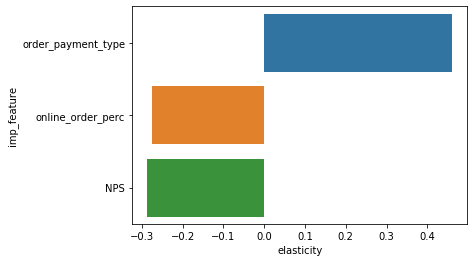

imp_feature  coef  elasticity
0  order_payment_type  0.74        0.46
1   online_order_perc -0.42       -0.28
2                 NPS -0.31       -0.29

In [ ]:
elasticity(lm1,gaming_train_lm)

Text(0, 0.5, 'y_pred')

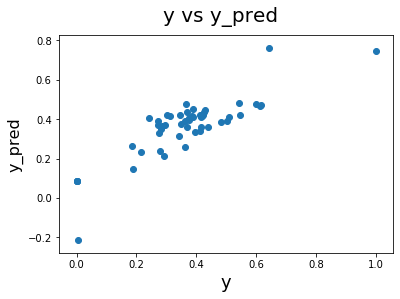

In [ ]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

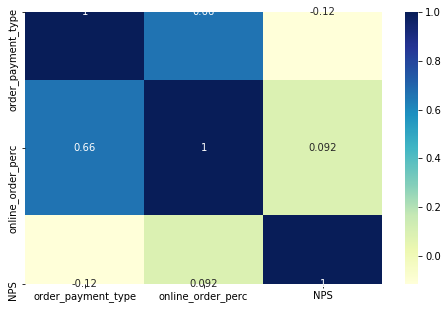

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

Multiplicative Model

In [ ]:
ga_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [ ]:
gaming_mm = ga_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']]         

gaming_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    17,466.00      0.22 3.64                     2.64                  25   
1 1,435,300.00      0.41 5.21                     3.07                 689   
2 1,097,388.36      0.43 5.17                     2.59                 534   
3 1,158,166.00      0.35 5.23                     2.45                 425   
4   742,062.00      0.36 5.58                     2.42                 246   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0             100.00    0.05             1.85                   0.00   
1              26.21    0.08             2.78                   0.00   
2              22.42    0.08             2.78                   0.00   
3              21.01    0.08             2.78                   0.00   
4              18.88    0.03             1.14                   0.00   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                  0.33 54.60     1,177.00           0.00    0.20   
1                  0.50 54.60     1,177.00           0.00    0.00   
2                  0.50 54.60     1,177.00           0.29    0.14   
3                  0.50 54.60     1,177.00           0.00    0.00   
4                  0.19 56.14     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA2_listed_price  
0             0.00              0.00  
1             0.04             -0.13  
2             0.04             -0.08  
3             0.04              0.11  
4             0.04             -0.00

In [ ]:
## Applying Log 
gaming_mm=np.log(gaming_mm)

gaming_mm = gaming_mm.fillna(0)
gaming_mm = gaming_mm.replace([np.inf, -np.inf], 0)

In [ ]:
gaming_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0  9.77     -1.52 1.29                     0.97                3.22   
1 14.18     -0.88 1.65                     1.12                6.54   
2 13.91     -0.85 1.64                     0.95                6.28   
3 13.96     -1.04 1.65                     0.90                6.05   
4 13.52     -1.01 1.72                     0.88                5.51   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               4.61   -2.92             0.62                  -8.36   
1               3.27   -2.52             1.02                  -7.96   
2               3.11   -2.52             1.02                  -7.96   
3               3.04   -2.52             1.02                  -7.96   
4               2.94   -3.57             0.13                  -9.05   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                 -1.10 4.00         7.07           0.00   -1.61   
1                 -0.70 4.00         7.07           0.00    0.00   
2                 -0.70 4.00         7.07          -1.25   -1.95   
3                 -0.70 4.00         7.07           0.00    0.00   
4                 -1.65 4.03         7.08           0.00   -1.95   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          -2.30           0.38           0.00           0.00   
1           0.06           0.84           1.42          -3.53   
2          -0.20           1.55           0.45          -3.53   
3           0.49           1.43           0.13          -3.53   
4          -0.20           1.78           1.47          -3.53   

   snow_on_grnd_cm  MA2_listed_price  
0             0.00              0.00  
1            -3.19              0.00  
2            -3.19              0.00  
3            -3.19             -2.22  
4            -3.19              0.00

In [ ]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price']      



### Scale these variables using 'fit_transform'
gaming_mm[varlist] = scaler.fit_transform(gaming_mm[varlist])

In [ ]:
gaming_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.42      0.00 0.24                     0.57                0.40   
1 0.89      0.71 0.70                     0.88                0.82   
2 0.86      0.75 0.69                     0.53                0.79   
3 0.87      0.53 0.70                     0.42                0.76   
4 0.82      0.57 0.78                     0.39                0.69   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.44             0.38                   0.36   
1               0.71    0.50             0.47                   0.39   
2               0.68    0.50             0.47                   0.39   
3               0.66    0.50             0.47                   0.39   
4               0.64    0.36             0.28                   0.31   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                  0.39 0.69         0.73           1.00    0.17   
1                  0.47 0.69         0.73           1.00    1.00   
2                  0.47 0.69         0.73           0.36    0.00   
3                  0.47 0.69         0.73           1.00    1.00   
4                  0.29 0.78         0.77           1.00    0.00   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.41           0.30           0.89   
1           0.48           0.60           0.74           0.00   
2           0.42           0.91           0.44           0.00   
3           0.56           0.85           0.34           0.00   
4           0.42           1.00           0.75           0.00   

   snow_on_grnd_cm  MA2_listed_price  
0             0.68              1.00  
1             0.00              1.00  
2             0.00              1.00  
3             0.00              0.65  
4             0.00              1.00

In [ ]:
## Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = gaming_mm.drop('gmv',axis=1)
y = gaming_mm['gmv']

gaming_train_mm = gaming_mm

In [ ]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(53, 19) (53,)


In [ ]:
## Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  discount        -0.16
1                       sla         0.20
2   product_procurement_sla         0.01
3        order_payment_type         1.27
4         online_order_perc        -0.50
5                    TV_ads         0.06
6           Sponsorship_ads        -0.03
7     Content_marketing_ads         0.10
8      Online_marketing_ads        -0.06
9                       NPS        -0.03
10              Stock_Index        -0.01
11            Special_sales        -0.01
12                   Payday         0.01
13            heat_deg_days        -0.24
14            cool_deg_days        -0.02
15            total_rain_mm         0.00
16            total_snow_cm         0.02
17          snow_on_grnd_cm         0.05
18         MA2_listed_price        -0.01

In [ ]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price'],
      dtype='object')

Model Building - Stepwise selection for feature selection

In [ ]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop total_rain_mm                  with p-value 0.849389
Drop Special_sales                  with p-value 0.834684
Drop NPS                            with p-value 0.683805
Drop MA2_listed_price               with p-value 0.618732
Drop Stock_Index                    with p-value 0.585992
Drop total_snow_cm                  with p-value 0.607061
Drop cool_deg_days                  with p-value 0.500925
Drop Online_marketing_ads           with p-value 0.58423
Drop TV_ads                         with p-value 0.25823
Drop Sponsorship_ads                with p-value 0.31062
Drop product_procurement_sla        with p-value 0.273423
Drop Payday                         with p-value 0.0885223

 final_selected_features: ['discount', 'sla', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'heat_deg_days', 'snow_on_grnd_cm']


In [ ]:
## Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.25
discount                -0.17
sla                      0.18
order_payment_type       1.23
online_order_perc       -0.47
Content_marketing_ads    0.10
heat_deg_days           -0.20
snow_on_grnd_cm          0.06
dtype: float64


In [ ]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     493.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.39e-40
Time:                        12:39:02   Log-Likelihood:                 119.68
No. Observations:                  53   AIC:                            -223.4
Df Residuals:                      45   BIC:                            -207.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [ ]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 67.75
3     order_payment_type 15.87
4      online_order_perc  8.91
5  Content_marketing_ads  3.38
6          heat_deg_days  2.93
2                    sla  2.75
1               discount  2.30
7        snow_on_grnd_cm  1.47

In [ ]:
x_rfe1.drop('order_payment_type', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     61.52
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.54e-20
Time:                        12:39:02   Log-Likelihood:                 62.587
No. Observations:                  53   AIC:                            -111.2
Df Residuals:                      46   BIC:                            -97.38
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 42.93
5          heat_deg_days  2.92
2                    sla  2.27
4  Content_marketing_ads  2.26
3      online_order_perc  1.59
1               discount  1.53
6        snow_on_grnd_cm  1.34

In [ ]:
x_rfe1.drop('snow_on_grnd_cm', axis = 1, inplace = True)

In [ ]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
mm1 = sm.OLS(y, x_rfe1).fit()   
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     74.15
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.93e-21
Time:                        12:39:02   Log-Likelihood:                 62.184
No. Observations:                  53   AIC:                            -112.4
Df Residuals:                      47   BIC:                            -100.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 42.65
5          heat_deg_days  2.29
4  Content_marketing_ads  2.26
2                    sla  2.18
3      online_order_perc  1.59
1               discount  1.45

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'sla',
 'online_order_perc',
 'Content_marketing_ads',
 'heat_deg_days']

In [ ]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [ ]:
## Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.005603043112894557

In [ ]:
## Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  const        -0.16
1               discount         0.20
2                    sla         0.01
3      online_order_perc         1.27
4  Content_marketing_ads        -0.50
5          heat_deg_days         0.06

In [ ]:
## Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.0126942  0.01667981 0.03820605 0.00044221 0.0030495  0.01396825
 0.00305853 0.00057446 0.00514808 0.01945224] 

Mean of 5 KFold CV - MSE: 0.011327332996418702


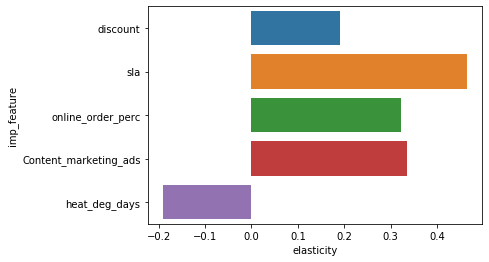

imp_feature  coef  elasticity
0               discount  0.21        0.19
1                    sla  0.49        0.47
2      online_order_perc  0.44        0.32
3  Content_marketing_ads  0.38        0.34
4          heat_deg_days -0.21       -0.19

In [ ]:
elasticity(mm1,gaming_train_mm)

Text(0, 0.5, 'y_pred')

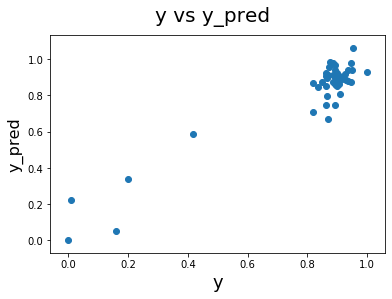

In [ ]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

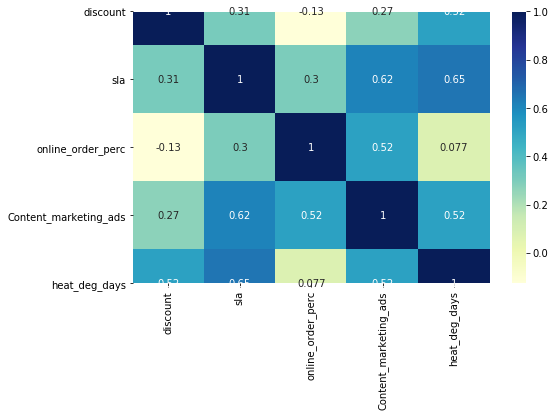

In [ ]:


# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(gaming_train_mm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()



# Modeling - Home Audio

In [ ]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [ ]:
home_lm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]
                            
    
home_lm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    83,742.00      0.40 3.60                     3.49                  34   
1 3,725,167.13      0.33 7.14                     2.76                 464   
2 4,344,419.00      0.34 6.91                     2.68                 527   
3 3,917,329.00      0.33 6.99                     2.77                 450   
4 2,812,144.00      0.33 7.09                     2.68                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              97.14    0.05             1.85                   0.00   
1              23.06    0.08             2.78                   0.00   
2              22.57    0.08             2.78                   0.00   
3              20.77    0.08             2.78                   0.00   
4              21.61    0.03             1.14                   0.00   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                  0.33 54.60     1,177.00           0.00    0.20   
1                  0.50 54.60     1,177.00           0.00    0.00   
2                  0.50 54.60     1,177.00           0.29    0.14   
3                  0.50 54.60     1,177.00           0.00    0.00   
4                  0.19 56.14     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0             0.00              0.00              0.00  
1             0.04             -0.13             -0.13  
2             0.04              0.00             -0.09  
3             0.04             -0.02             -0.09  
4             0.04              0.01              0.01

In [ ]:
### Checking NaN

home_lm.isnull().sum()

gmv                        0
discount                   0
sla                        0
product_procurement_sla    0
order_payment_type         0
online_order_perc          0
TV_ads                     1
Sponsorship_ads            1
Content_marketing_ads      1
Online_marketing_ads       1
NPS                        0
Stock_Index                0
Special_sales              0
Payday                     0
heat_deg_days              0
cool_deg_days              0
total_rain_mm              0
total_snow_cm              0
snow_on_grnd_cm            0
MA2_listed_price           0
MA4_listed_price           0
dtype: int64

In [ ]:
home_lm.fillna(0, inplace = True)

In [ ]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']
                                      

### Scale these variables using 'fit_transform'
home_lm[varlist] = scaler.fit_transform(home_lm[varlist])

In [ ]:
home_lm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.00      0.59 0.00                     1.00                0.00   
1 0.26      0.14 1.00                     0.48                0.25   
2 0.31      0.22 0.94                     0.42                0.28   
3 0.28      0.15 0.96                     0.49                0.24   
4 0.20      0.15 0.99                     0.42                0.17   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               0.99    0.02             0.06                   0.00   
1               0.11    0.02             0.09                   0.00   
2               0.11    0.02             0.09                   0.00   
3               0.09    0.02             0.09                   0.00   
4               0.10    0.01             0.04                   0.00   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                  0.04 0.87         0.71           0.00    1.00   
1                  0.05 0.87         0.71           0.00    0.00   
2                  0.05 0.87         0.71           0.29    0.71   
3                  0.05 0.87         0.71           0.00    0.00   
4                  0.02 1.00         0.75           0.00    0.71   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.25           0.00           0.00   
1           0.07           0.39           0.42           0.02   
2           0.05           0.80           0.16           0.02   
3           0.11           0.71           0.12           0.02   
4           0.05           1.00           0.44           0.02   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0             0.00              0.66              0.56  
1             0.01              0.00              0.00  
2             0.01              0.68              0.18  
3             0.01              0.58              0.18  
4             0.01              0.74              0.60

In [ ]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = home_lm.drop('gmv',axis=1)
y = home_lm['gmv']

home_train_lm = home_lm

In [ ]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (49, 20)
y dataset:  (49,)


In [ ]:
###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef


0  Coefficient
0                  discount         0.25
1                       sla        -0.00
2   product_procurement_sla        -0.02
3        order_payment_type         0.54
4         online_order_perc        -0.38
5                    TV_ads         0.01
6           Sponsorship_ads         0.00
7     Content_marketing_ads         0.11
8      Online_marketing_ads        -0.14
9                       NPS         0.05
10              Stock_Index        -0.02
11            Special_sales         0.07
12                   Payday         0.01
13            heat_deg_days        -0.06
14            cool_deg_days        -0.10
15            total_rain_mm        -0.01
16            total_snow_cm         0.04
17          snow_on_grnd_cm         0.03
18         MA2_listed_price         0.07
19         MA4_listed_price         0.06

Model Building - Stepwise selection for feature selection

In [ ]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Sponsorship_ads                with p-value 0.979513
Drop sla                            with p-value 0.948007
Drop TV_ads                         with p-value 0.876188
Drop product_procurement_sla        with p-value 0.837991
Drop total_rain_mm                  with p-value 0.826555
Drop Payday                         with p-value 0.697732
Drop snow_on_grnd_cm                with p-value 0.552183
Drop heat_deg_days                  with p-value 0.527219
Drop Stock_Index                    with p-value 0.521873
Drop NPS                            with p-value 0.538294
Drop MA4_listed_price               with p-value 0.493756
Drop total_snow_cm                  with p-value 0.406971
Drop cool_deg_days                  with p-value 0.0982741

 final_selected_features: ['discount', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'Online_marketing_ads', 'Special_sales', 'MA2_listed_price']


In [ ]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                    0.08
discount                 0.27
order_payment_type       0.52
online_order_perc       -0.34
Content_marketing_ads    0.11
Online_marketing_ads    -0.11
Special_sales            0.07
MA2_listed_price         0.09
dtype: float64


In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     69.18
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.14e-20
Time:                        13:19:01   Log-Likelihood:                 86.601
No. Observations:                  49   AIC:                            -157.2
Df Residuals:                      41   BIC:                            -142.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [ ]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 18.28
5   Online_marketing_ads  2.10
4  Content_marketing_ads  1.70
3      online_order_perc  1.69
2     order_payment_type  1.66
1               discount  1.65
6          Special_sales  1.21
7       MA2_listed_price  1.20

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'Online_marketing_ads',
 'Special_sales',
 'MA2_listed_price']

In [ ]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [ ]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.001707680772496962

In [ ]:
##  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

0  Coefficient
0                  const         0.25
1               discount        -0.00
2     order_payment_type        -0.02
3      online_order_perc         0.54
4  Content_marketing_ads        -0.38
5   Online_marketing_ads         0.01
6          Special_sales         0.00
7       MA2_listed_price         0.11

In [ ]:
## Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.00060436 0.00295511 0.01854366 0.00243094 0.00082639 0.00272775
 0.00158943 0.00337214 0.00322227 0.00433753] 

Mean of 5 KFold CV - MSE: 0.004060958152337884


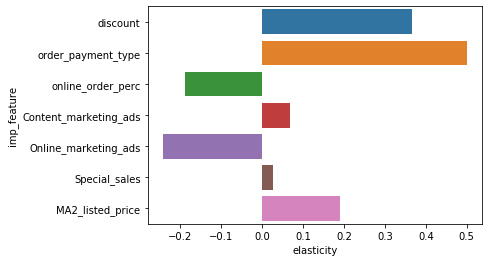

imp_feature  coef  elasticity
0               discount  0.27        0.37
1     order_payment_type  0.52        0.50
2      online_order_perc -0.34       -0.19
3  Content_marketing_ads  0.11        0.07
4   Online_marketing_ads -0.11       -0.24
5          Special_sales  0.07        0.03
6       MA2_listed_price  0.09        0.19

In [ ]:
elasticity(lm1,home_train_lm)

Text(0, 0.5, 'y_pred')

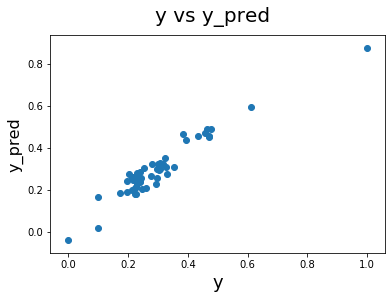

In [ ]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

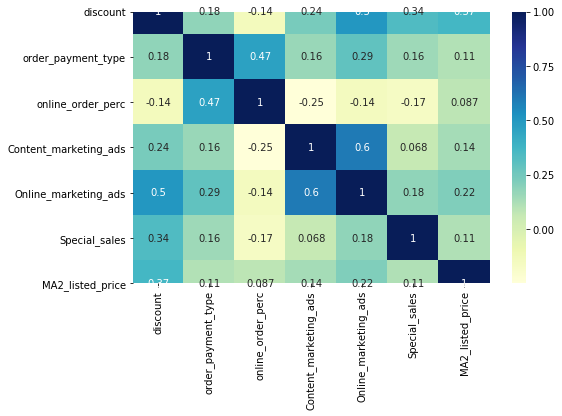

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

Multiplicative Model

In [ ]:
ha_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'online_order_perc', 'Date', 'Year', 'Month', 'TV_ads',
       'Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days',
       'cool_deg_days', 'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm',
       'MA2_listed_price', 'MA4_listed_price', 'MA2_discount', 'MA4_discount',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount_offer', 'lag_2_discount_offer', 'lag_3_discount_offer',
       'lag_1_NPS', 'lag_2_NPS', 'lag_3_NPS', 'lag_1_Stock_Index',
       'lag_2_Stock_Index', 'lag_3_Stock_Index', 'lag_1_Special_sales',
       'lag_2_Special_sales', 'lag_3_Special_sales', 'lag_1_Payday',
       'lag_2_Payday', 'lag_3_Payday'],
      dtype='object')

In [ ]:
home_mm = ha_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']]         

home_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0    83,742.00      0.40 3.60                     3.49                  34   
1 3,725,167.13      0.33 7.14                     2.76                 464   
2 4,344,419.00      0.34 6.91                     2.68                 527   
3 3,917,329.00      0.33 6.99                     2.77                 450   
4 2,812,144.00      0.33 7.09                     2.68                 327   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0              97.14    0.05             1.85                   0.00   
1              23.06    0.08             2.78                   0.00   
2              22.57    0.08             2.78                   0.00   
3              20.77    0.08             2.78                   0.00   
4              21.61    0.03             1.14                   0.00   

   Online_marketing_ads   NPS  Stock_Index  Special_sales  Payday  \
0                  0.33 54.60     1,177.00           0.00    0.20   
1                  0.50 54.60     1,177.00           0.00    0.00   
2                  0.50 54.60     1,177.00           0.29    0.14   
3                  0.50 54.60     1,177.00           0.00    0.00   
4                  0.19 56.14     1,185.29           0.00    0.14   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.10           1.46           0.00           0.00   
1           1.06           2.32           4.15           0.03   
2           0.82           4.72           1.57           0.03   
3           1.63           4.17           1.14           0.03   
4           0.82           5.91           4.34           0.03   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0             0.00              0.00              0.00  
1             0.04             -0.13             -0.13  
2             0.04              0.00             -0.09  
3             0.04             -0.02             -0.09  
4             0.04              0.01              0.01

In [ ]:
## Applying Log 
home_mm = np.log(home_mm)

home_mm = home_mm.fillna(0)
home_mm = home_mm.replace([np.inf, -np.inf], 0)

In [ ]:
home_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 11.34     -0.92 1.28                     1.25                3.53   
1 15.13     -1.12 1.97                     1.01                6.14   
2 15.28     -1.08 1.93                     0.98                6.27   
3 15.18     -1.12 1.94                     1.02                6.11   
4 14.85     -1.11 1.96                     0.98                5.79   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               4.58   -2.92             0.62                  -8.36   
1               3.14   -2.52             1.02                  -7.96   
2               3.12   -2.52             1.02                  -7.96   
3               3.03   -2.52             1.02                  -7.96   
4               3.07   -3.57             0.13                  -9.05   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                 -1.10 4.00         7.07           0.00   -1.61   
1                 -0.70 4.00         7.07           0.00    0.00   
2                 -0.70 4.00         7.07          -1.25   -1.95   
3                 -0.70 4.00         7.07           0.00    0.00   
4                 -1.65 4.03         7.08           0.00   -1.95   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0          -2.30           0.38           0.00           0.00   
1           0.06           0.84           1.42          -3.53   
2          -0.20           1.55           0.45          -3.53   
3           0.49           1.43           0.13          -3.53   
4          -0.20           1.78           1.47          -3.53   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0             0.00              0.00              0.00  
1            -3.19              0.00              0.00  
2            -3.19             -5.91              0.00  
3            -3.19              0.00              0.00  
4            -3.19             -4.20             -4.82

In [ ]:
##  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price']      



### Scale these variables using 'fit_transform'
home_mm[varlist] = scaler.fit_transform(home_mm[varlist])

In [ ]:
home_mm.head()

gmv  discount  sla  product_procurement_sla  order_payment_type  \
0 0.00      0.64 0.00                     1.00                0.00   
1 0.74      0.17 1.00                     0.54                0.66   
2 0.77      0.26 0.95                     0.48                0.69   
3 0.75      0.18 0.97                     0.55                0.65   
4 0.69      0.18 0.99                     0.48                0.57   

   online_order_perc  TV_ads  Sponsorship_ads  Content_marketing_ads  \
0               1.00    0.13             0.18                   0.07   
1               0.27    0.22             0.30                   0.12   
2               0.26    0.22             0.30                   0.12   
3               0.22    0.22             0.30                   0.12   
4               0.24    0.00             0.04                   0.00   

   Online_marketing_ads  NPS  Stock_Index  Special_sales  Payday  \
0                  0.14 0.88         0.73           1.00    0.17   
1                  0.25 0.88         0.73           1.00    1.00   
2                  0.25 0.88         0.73           0.36    0.00   
3                  0.25 0.88         0.73           1.00    1.00   
4                  0.00 1.00         0.77           1.00    0.00   

   heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
0           0.00           0.41           0.30           0.89   
1           0.48           0.60           0.74           0.00   
2           0.42           0.91           0.44           0.00   
3           0.56           0.85           0.34           0.00   
4           0.42           1.00           0.75           0.00   

   snow_on_grnd_cm  MA2_listed_price  MA4_listed_price  
0             0.68              1.00              1.00  
1             0.00              1.00              1.00  
2             0.00              0.14              1.00  
3             0.00              1.00              1.00  
4             0.00              0.39              0.30

In [ ]:
## Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = home_mm.drop('gmv',axis=1)
y = home_mm['gmv']

home_train_mm = home_mm

In [ ]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(49, 20) (49,)


In [ ]:
## Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef


0  Coefficient
0                  discount         0.02
1                       sla        -0.05
2   product_procurement_sla         0.00
3        order_payment_type         0.78
4         online_order_perc        -0.39
5                    TV_ads         0.02
6           Sponsorship_ads        -0.00
7     Content_marketing_ads        -0.03
8      Online_marketing_ads         0.00
9                       NPS        -0.01
10              Stock_Index         0.00
11            Special_sales         0.01
12                   Payday         0.00
13            heat_deg_days        -0.00
14            cool_deg_days         0.02
15            total_rain_mm         0.01
16            total_snow_cm        -0.01
17          snow_on_grnd_cm         0.01
18         MA2_listed_price         0.00
19         MA4_listed_price        -0.00

In [ ]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA2_listed_price',
       'MA4_listed_price'],
      dtype='object')

Model Building - Stepwise selection for feature selection

In [ ]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA2_listed_price', 'MA4_listed_price'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop product_procurement_sla        with p-value 0.901441
Drop heat_deg_days                  with p-value 0.866647
Drop Online_marketing_ads           with p-value 0.880149
Drop Payday                         with p-value 0.752332
Drop Sponsorship_ads                with p-value 0.588379
Drop NPS                            with p-value 0.592379
Drop MA4_listed_price               with p-value 0.555616
Drop MA2_listed_price               with p-value 0.634076
Drop total_snow_cm                  with p-value 0.336743
Drop total_rain_mm                  with p-value 0.432462
Drop Stock_Index                    with p-value 0.384708
Drop Special_sales                  with p-value 0.350219
Drop snow_on_grnd_cm                with p-value 0.287565
Drop TV_ads                         with p-value 0.158032

 final_selected_features: ['discount', 'sla', 'order_payment_type', 'online_order_perc', 'Content_marketing_ads', 'cool_deg_days']


In [ ]:
## Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                    0.37
discount                 0.02
sla                     -0.05
order_payment_type       0.77
online_order_perc       -0.38
Content_marketing_ads   -0.02
cool_deg_days            0.01
dtype: float64


In [ ]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2384.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.58e-51
Time:                        13:24:29   Log-Likelihood:                 173.17
No. Observations:                  49   AIC:                            -332.3
Df Residuals:                      42   BIC:                            -319.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [ ]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const 76.98
4      online_order_perc  2.29
2                    sla  2.23
3     order_payment_type  2.14
5  Content_marketing_ads  2.05
1               discount  1.75
6          cool_deg_days  1.64

In [ ]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount',
 'sla',
 'order_payment_type',
 'online_order_perc',
 'Content_marketing_ads',
 'cool_deg_days']

In [ ]:
## Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [ ]:
## Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

4.986802956003849e-05

In [ ]:
# Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

0  Coefficient
0                  const         0.02
1               discount        -0.05
2                    sla         0.00
3     order_payment_type         0.78
4      online_order_perc        -0.39
5  Content_marketing_ads         0.02
6          cool_deg_days        -0.00

In [ ]:
## Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [1.31435653e-04 1.06555705e-05 1.38398307e-04 4.88521834e-05
 3.46012216e-05 3.92667989e-05 7.01614484e-05 4.29115246e-05
 7.19375419e-05 1.87521356e-04] 

Mean of 5 KFold CV - MSE: 7.757416047549842e-05


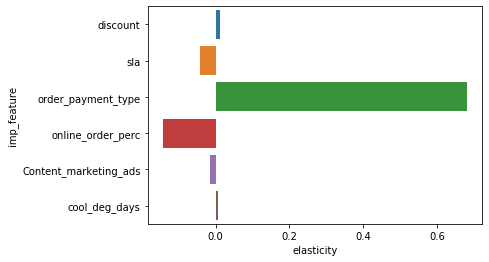

imp_feature  coef  elasticity
0               discount  0.02        0.01
1                    sla -0.05       -0.04
2     order_payment_type  0.77        0.68
3      online_order_perc -0.38       -0.14
4  Content_marketing_ads -0.02       -0.02
5          cool_deg_days  0.01        0.01

In [ ]:
elasticity(mm1,home_train_mm)

Text(0, 0.5, 'y_pred')

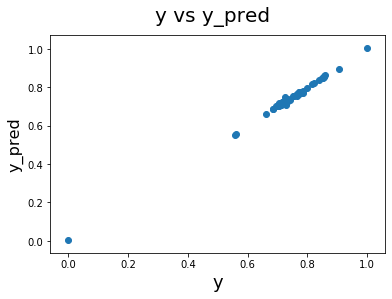

In [ ]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

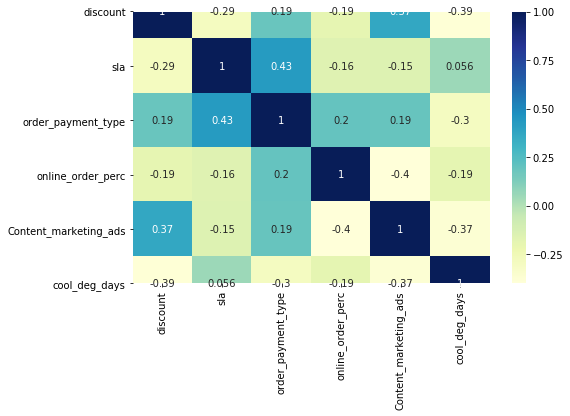

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(home_train_mm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()